<span style='font-size:1.8em;font-weight:bold;color:steelblue;'> Projet-2 Analyse des données ACADEMY</span>

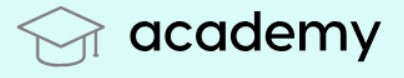

In [1]:
# Imports librairies
import sys
import warnings

import IPython as ip
import matplotlib.pyplot as plt
import missingno as msno
import sklearn as nltk
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
# import mytools as tools
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import geopandas as gpd

warnings.filterwarnings("ignore")

# Versions
print("Les version des librairies : ")
print("Python       : " + sys.version)
print("Numpy        : " + np.version.full_version)
print("Pandas       : " + pd.__version__)
print("Seaborn      : " + sns.__version__)
print("missingno    : " + msno.__version__)
print("scikit-learn : " + nltk.__version__)

Les version des librairies : 
Python       : 3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]
Numpy        : 1.23.4
Pandas       : 1.5.1
Seaborn      : 0.12.1
missingno    : 0.5.1
scikit-learn : 1.1.3


In [2]:
from jyquickhelper import add_notebook_menu

add_notebook_menu()

## Introduction

L'entreprise Academy est une **start-up de la EdTech** qui propose des contenus de formation pour **un public de niveau lycée et universitaire** qui a le projet d'**étendre ses services à l'internationale**.

**Problématiques :**
- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

**Mission :** Réaliser une analyse pré-exploratoire de ce jeu de données.
- Quelles sont les variables permettant de quatifier les potentiel d'un pays en vu d'un développement commercial
- Etablir et proposer une listes des pays qui sont les plus 


**Sources :**
- Banque mondiale : https://datacatalog.worldbank.org/dataset/education-statistics

**Pré-Analyse :**
- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

**Démarches :**
- Stratégie de l'entonnoir pour isoler les données les plus pertinentes
- Chercher une distribution gaussienne 


- Analyse du contexte et définition des objectifs.
- Analyse des données existantes.
- Analyse & hypothèses.

# PARTIE 1 : EDA  - ANALYSE DES DONNES EXISTANTES

## EDA - fonctions 

In [3]:
# On crée une fonction info_data pour les autres df (DRY)
def info_data(df):
    print(
        "------------------------------------------------------------------------------------------------------"
    )
    print(f"LES DONNES \n")
    print("Nombre de lignes :", df.shape[0], "lignes")
    print("Nombre de colonnes :", df.shape[1], "colonnes")
    # Recherche de doublon
    print(
        f"Nombre d'éléments dupliqués dans le dataframe : {country.duplicated().sum()} eléments"
    )
    nb_na = df.isnull().sum().sum()
    if nb_na > 0:
        nb_data_tt = np.product(df.shape)
        pourcent_na_tt = round((nb_na / nb_data_tt) * 100, 2)
        print(
            f"Nombre total de données manquantes dans le dataframe : {nb_na} données manquantes sur {nb_data_tt} ({pourcent_na_tt}%)"
        )
    else:
        print("Aucune valeur manquante")

In [4]:
# On crée une fonction get_na (DRY)
def info_data_na(df):
    nb_na = df.isnull().sum().sum()
    nb_data_tt = np.product(df.shape)
    pourcent_na_tt = round((nb_na / nb_data_tt) * 100, 2)
    print(
        f"Nombre total de données manquantes dans le dataframe : {nb_na} données manquantes sur {nb_data_tt} ({pourcent_na_tt}%)"
    )
    print(
        "------------------------------------------------------------------------------------------------------"
    )
    print("Visualisation des données manquantes")
    if nb_na > 0:
        plt.figure(figsize=(20, 10))
        plt.title("Visualisation des valeurs manquantes")
        sns.heatmap(df.isna(), cbar=False)
        plt.show()

## Analyse du jeu de données EdStatsCountry

In [5]:
# Import données
country = pd.read_csv("assets/data/EdStatsCountry.csv", sep=",")

### Description générale

In [6]:
# afficher les 5 premières et les 5 dernières lignes du dataframe
display(country)

Country Code    Short Name    Table Name                     Long Name  \
0            ABW         Aruba         Aruba                         Aruba   
1            AFG   Afghanistan   Afghanistan  Islamic State of Afghanistan   
2            AGO        Angola        Angola   People's Republic of Angola   
3            ALB       Albania       Albania           Republic of Albania   
4            AND       Andorra       Andorra       Principality of Andorra   
..           ...           ...           ...                           ...   
236          XKX        Kosovo        Kosovo            Republic of Kosovo   
237          YEM         Yemen   Yemen, Rep.             Republic of Yemen   
238          ZAF  South Africa  South Africa      Republic of South Africa   
239          ZMB        Zambia        Zambia            Republic of Zambia   
240          ZWE      Zimbabwe      Zimbabwe          Republic of Zimbabwe   

    2-alpha code       Currency Unit  \
0             AW       Aruban florin   
1             AF      Afghan afghani   
2             AO      Angolan kwanza   
3             AL        Albanian lek   
4             AD                Euro   
..           ...                 ...   
236          NaN                Euro   
237           YE         Yemeni rial   
238           ZA  South African rand   
239           ZM  New Zambian kwacha   
240           ZW         U.S. dollar   

                                         Special Notes  \
0    SNA data for 2000-2011 are updated from offici...   
1    Fiscal year end: March 20; reporting period fo...   
2    April 2013 database update: Based on IMF data,...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
236  Kosovo became a World Bank member on June 29, ...   
237  Based on official government statistics and In...   
238  Fiscal year end: March 31; reporting period fo...   
239  National accounts data have rebased to reflect...   
240  Fiscal year end: June 30; reporting period for...   

                         Region          Income Group WB-2 code  ...  \
0     Latin America & Caribbean  High income: nonOECD        AW  ...   
1                    South Asia            Low income        AF  ...   
2            Sub-Saharan Africa   Upper middle income        AO  ...   
3         Europe & Central Asia   Upper middle income        AL  ...   
4         Europe & Central Asia  High income: nonOECD        AD  ...   
..                          ...                   ...       ...  ...   
236       Europe & Central Asia   Lower middle income        KV  ...   
237  Middle East & North Africa   Lower middle income        RY  ...   
238          Sub-Saharan Africa   Upper middle income        ZA  ...   
239          Sub-Saharan Africa   Lower middle income        ZM  ...   
240          Sub-Saharan Africa            Low income        ZW  ...   

                IMF data dissemination standard  \
0                                           NaN   
1      General Data Dissemination System (GDDS)   
2      General Data Dissemination System (GDDS)   
3      General Data Dissemination System (GDDS)   
4                                           NaN   
..                                          ...   
236    General Data Dissemination System (GDDS)   
237    General Data Dissemination System (GDDS)   
238  Special Data Dissemination Standard (SDDS)   
239    General Data Dissemination System (GDDS)   
240    General Data Dissemination System (GDDS)   

                              Latest population census  \
0                                                 2010   
1                                                 1979   
2                                                 1970   
3                                                 2011   
4    2011. Population figures compiled from adminis...   
..                                                 ...   
236  

In [7]:
# Résumé des variables qualitatives
country.describe(exclude=[np.number])

Country Code Short Name Table Name Long Name 2-alpha code  \
count           241        241        241       241          238   
unique          241        241        241       241          238   
top             ABW      Aruba      Aruba     Aruba           AW   
freq              1          1          1         1            1   

       Currency Unit                                      Special Notes  \
count            215                                                145   
unique           152                                                131   
top             Euro  April 2012 database update: Based on official ...   
freq              23                                                  6   

                       Region         Income Group WB-2 code  ...  \
count                     214                  214       240  ...   
unique                      7                    5       240  ...   
top     Europe & Central Asia  Upper middle income        AW  ...   
freq                       57                   55         1  ...   

       External debt Reporting status       System of trade  \
count                             124                   200   
unique                              3                     2   
top                            Actual  General trade system   
freq                              107                   106   

          Government Accounting concept  \
count                               161   
unique                                2   
top     Consolidated central government   
freq                                 95   

                 IMF data dissemination standard Latest population census  \
count                                        181                      213   
unique                                         2                       27   
top     General Data Dissemination System (GDDS)                     2011   
freq                                         110                       59   

                Latest household survey  \
count                               141   
unique                               60   
top     World Health Survey (WHS), 2003   
freq                                 10   

       Source of most recent Income and expenditure data  \
count                                                160   
unique                                                75   
top              Integrated household survey (IHS), 2012   
freq                                                  15   

       Vital registration complete Latest agricultural census  \
count                          111                        142   
unique                           2                         35   
top                            Yes                       2010   
freq                           110                         36   

       Latest water withdrawal data  
count                           179  
unique                           20  
top                            2000  
freq                             40  

[4 rows x 28 columns]

In [8]:
# Résumé des variables quantitatives
country.describe()

National accounts reference year  Latest industrial data  \
count                          32.00000              107.000000   
mean                         2001.53125             2008.102804   
std                             5.24856                2.616834   
min                          1987.00000             2000.000000   
25%                          1996.75000             2007.500000   
50%                          2002.00000             2009.000000   
75%                          2005.00000             2010.000000   
max                          2012.00000             2010.000000   

       Latest trade data  Unnamed: 31  
count         185.000000          0.0  
mean         2010.994595          NaN  
std             2.569675          NaN  
min          1995.000000          NaN  
25%          2011.000000          NaN  
50%          2012.000000          NaN  
75%          2012.000000          NaN  
max          2012.000000          NaN

In [9]:
# On regarde les types des variables
country.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [10]:
# Premières informations sur les données du dataframe
info_data(country)

------------------------------------------------------------------------------------------------------
LES DONNES 

Nombre de lignes : 241 lignes
Nombre de colonnes : 32 colonnes
Nombre d'éléments dupliqués dans le dataframe : 0 eléments
Nombre total de données manquantes dans le dataframe : 2354 données manquantes sur 7712 (30.52%)


- 241 lignes pour 192 pays officiels. Il faut isoler les pays des zones géographiques pour avoir une meilleure perception des données géographique dont nous disposont

In [11]:
# Lister les noms de colonne
country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

### Données manquantes

In [12]:
# Nombre de valeurs manquantes par variable en %
round(country.isnull().mean() * 100, 2)

Country Code                                           0.00
Short Name                                             0.00
Table Name                                             0.00
Long Name                                              0.00
2-alpha code                                           1.24
Currency Unit                                         10.79
Special Notes                                         39.83
Region                                                11.20
Income Group                                          11.20
WB-2 code                                              0.41
National accounts base year                           14.94
National accounts reference year                      86.72
SNA price valuation                                   18.26
Lending category                                      40.25
Other groups                                          75.93
System of National Accounts                           10.79
Alternative conversion factor           

Nombre total de données manquantes dans le dataframe : 2354 données manquantes sur 7712 (30.52%)
------------------------------------------------------------------------------------------------------
Visualisation des données manquantes


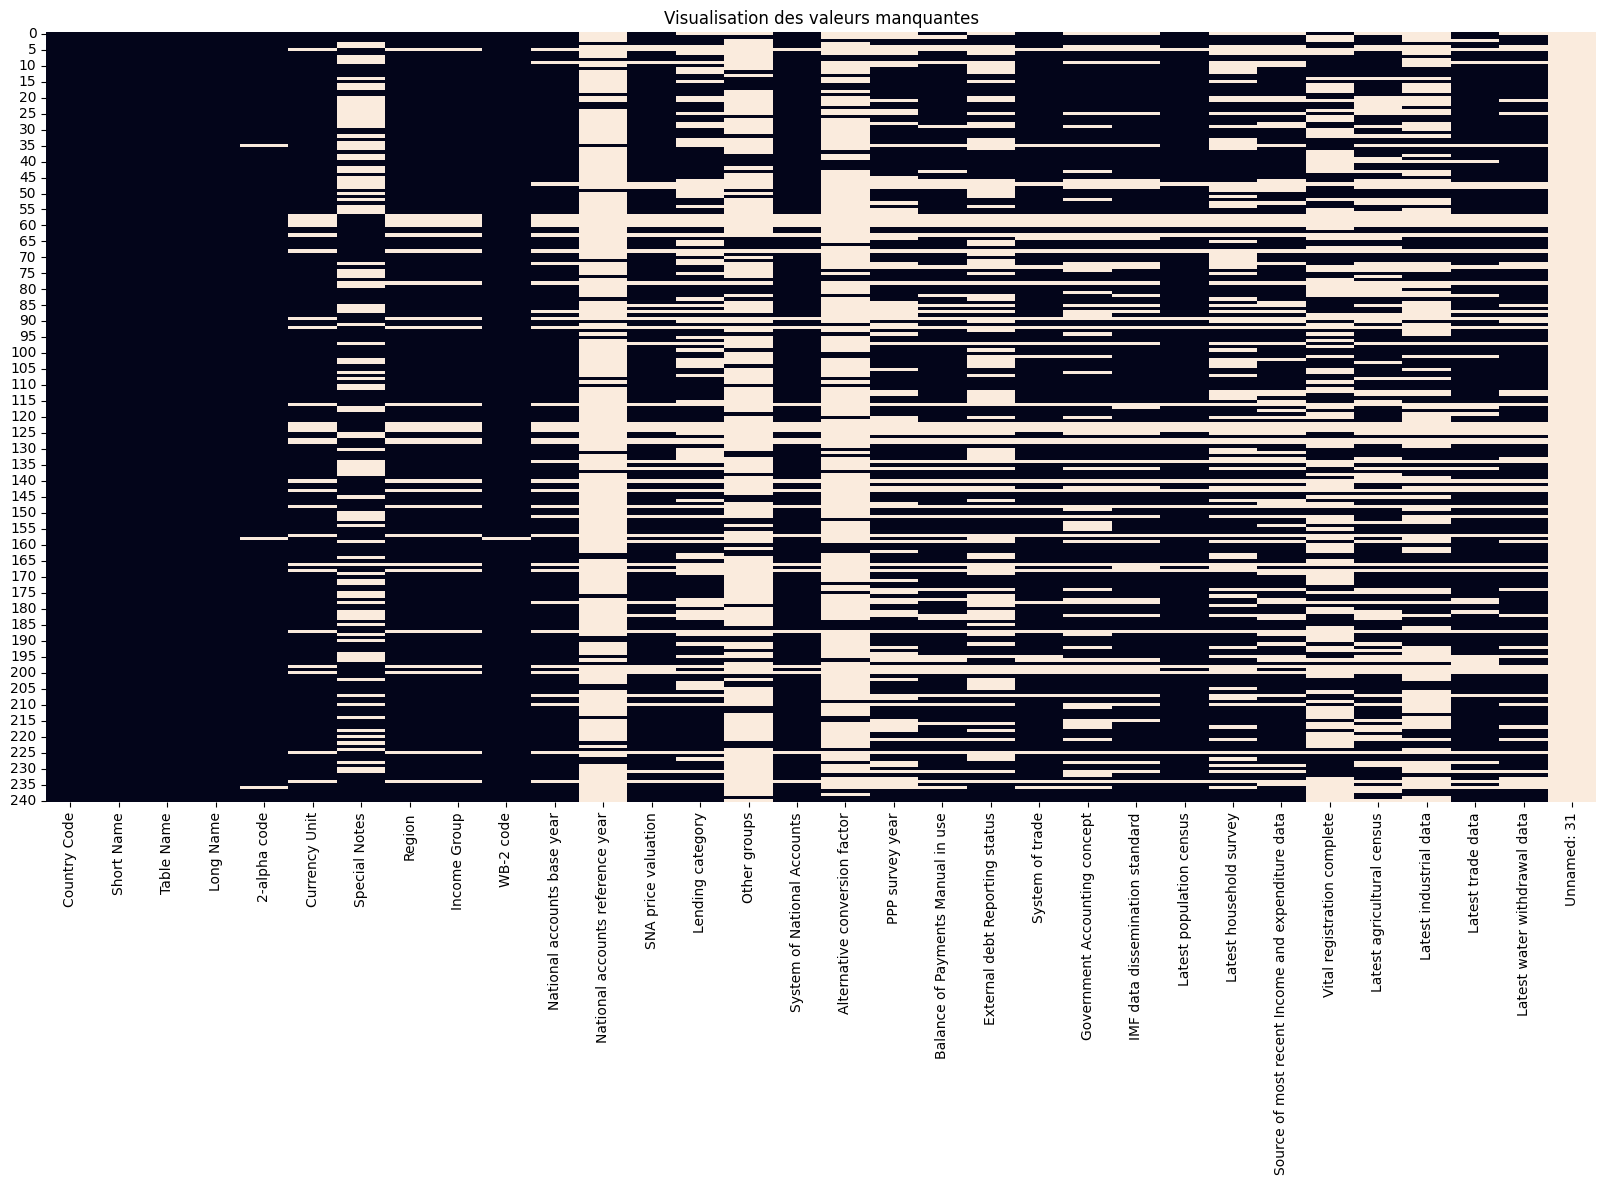

In [13]:
# Information et visualisation des données manquantes
info_data_na(country)

In [14]:
# Identifier les différentes manières de nommer les pays + Regfion et revenu
country[["Country Code", "Short Name","Table Name","Long Name","2-alpha code","WB-2 code" ,"Currency Unit","Region", "Income Group"]]

Country Code    Short Name    Table Name                     Long Name  \
0            ABW         Aruba         Aruba                         Aruba   
1            AFG   Afghanistan   Afghanistan  Islamic State of Afghanistan   
2            AGO        Angola        Angola   People's Republic of Angola   
3            ALB       Albania       Albania           Republic of Albania   
4            AND       Andorra       Andorra       Principality of Andorra   
..           ...           ...           ...                           ...   
236          XKX        Kosovo        Kosovo            Republic of Kosovo   
237          YEM         Yemen   Yemen, Rep.             Republic of Yemen   
238          ZAF  South Africa  South Africa      Republic of South Africa   
239          ZMB        Zambia        Zambia            Republic of Zambia   
240          ZWE      Zimbabwe      Zimbabwe          Republic of Zimbabwe   

    2-alpha code WB-2 code       Currency Unit                      Region  \
0             AW        AW       Aruban florin   Latin America & Caribbean   
1             AF        AF      Afghan afghani                  South Asia   
2             AO        AO      Angolan kwanza          Sub-Saharan Africa   
3             AL        AL        Albanian lek       Europe & Central Asia   
4             AD        AD                Euro       Europe & Central Asia   
..           ...       ...                 ...                         ...   
236          NaN        KV                Euro       Europe & Central Asia   
237           YE        RY         Yemeni rial  Middle East & North Africa   
238           ZA        ZA  South African rand          Sub-Saharan Africa   
239           ZM        ZM  New Zambian kwacha          Sub-Saharan Africa   
240           ZW        ZW         U.S. dollar          Sub-Saharan Africa   

             Income Group  
0    High income: nonOECD  
1              Low income  
2     Upper middle income  
3     Upper middle income  
4    High income: nonOECD  
..                    ...  
236   Lower middle income  
237   Lower middle income  
238   Upper middle income  
239   Lower middle income  
240            Low income  

[241 rows x 9 columns]

- Les colonnes : Country Code, Region, Income Group, Currency Unit

### Les régions

In [15]:
# Lister les regions
print("Régions :\n", country["Region"].unique())

Régions :
 ['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' nan 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']


In [16]:
print(country["Region"].nunique(), "regions")

7 regions


### Les pays et les régions

In [17]:
# compter et Lister les pays
print("Pays :\n", country["Short Name"].nunique(), "pays")
print(
    "Le fichier présente 241 données géographiques comprennant des pays et dses zones géographiques"
)

Pays :
 241 pays
Le fichier présente 241 données géographiques comprennant des pays et dses zones géographiques


In [18]:
# Dénominations pays
country[
    [
        "Country Code",
        "Short Name",
        "Table Name",
        "Long Name",
        "2-alpha code",
        "WB-2 code",
    ]
]

Country Code    Short Name    Table Name                     Long Name  \
0            ABW         Aruba         Aruba                         Aruba   
1            AFG   Afghanistan   Afghanistan  Islamic State of Afghanistan   
2            AGO        Angola        Angola   People's Republic of Angola   
3            ALB       Albania       Albania           Republic of Albania   
4            AND       Andorra       Andorra       Principality of Andorra   
..           ...           ...           ...                           ...   
236          XKX        Kosovo        Kosovo            Republic of Kosovo   
237          YEM         Yemen   Yemen, Rep.             Republic of Yemen   
238          ZAF  South Africa  South Africa      Republic of South Africa   
239          ZMB        Zambia        Zambia            Republic of Zambia   
240          ZWE      Zimbabwe      Zimbabwe          Republic of Zimbabwe   

    2-alpha code WB-2 code  
0             AW        AW  
1             AF        AF  
2             AO        AO  
3             AL        AL  
4             AD        AD  
..           ...       ...  
236          NaN        KV  
237           YE        RY  
238           ZA        ZA  
239           ZM        ZM  
240           ZW        ZW  

[241 rows x 6 columns]

In [19]:
# https://data.worldbank.org/country
# On liste les zones contenu dans le df
areas = [
    "Arab World",
    "East Asia & Pacific",
    "East Asia & Pacific (excluding high income)",
    "East Asia & Pacific (developing only)",
    "East Asia & Pacific (all income levels)",
    "Euro area",
    "European Union",
    "Europe & Centraµl Asia",
    "Europe & Central Asia (excluding high income)",
    "Europe & Central Asia (developing only)",
    "Europe & Central Asia (all income levels)",
    "European Union",
    "Heavily indebted poor countries (HIPC)",
    "High income",
    "Latin America & Caribbean",
    "Latin America & Caribbean (developing only)",
    "Latin America & Caribbean (excluding high income)",
    "Least developed countries: UN classification",
    "Low & middle income",
    "Low income",
    "Lower middle income",
    "Middle East & North Africa",
    "Middle East & North Africa (excluding high income)",
    "Middle East & North Africa (all income levels)",
    "Middle East & North Africa (developing only)",
    "Middle income",
    "North America",
    "OECD members",
    "South Asia",
    "Sub-Saharan Africa",
    "Sub-Saharan Africa (excluding high income)",
    "Upper middle income",
    "Sub-Saharan Africa (developing only)",
    "Sub-Saharan Africa (all income levels)",
    "World",
]

In [20]:
# Compter le nombre de pays qui ne sont pas des zones géographiques
country[~country["Short Name"].isin(areas)]["Short Name"].unique().shape

(217,)

In [21]:
# Créer la liste des pays présent dans country
list_countries = (
    country[~country["Short Name"].isin(areas)]["Short Name"].unique().tolist()
)
print(list_countries)

['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Micronesia', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Gibraltar', 'Guinea', 'The Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greec

In [22]:
# Compter le nombre d'éléments dans la liste pour avoir le nombre de pays
len(list_countries)

217

In [23]:
print(country["Short Name"].unique())

['Aruba' 'Afghanistan' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'The Bahamas' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Switzerland' 'Channel Islands'
 'Chile' 'China' "Côte d'Ivoire" 'Cameroon' 'Dem. Rep. Congo' 'Congo'
 'Colombia' 'Comoros' 'Cabo Verde' 'Costa Rica' 'Cuba' 'Curaçao'
 'Cayman Islands' 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (developing only)'
 'East Asia & Pacific (all income levels)'
 'Europe & Central Asia (developing only)'
 'Europe & Central Asia (all income levels)' 'Ecuador' 'Egypt' 'Euro area'
 'Eritrea' 'Spain' 'Estonia' 'Ethiopia' 'European Union' 'Finland' 'Fiji'
 'France'

In [24]:
# On recherche le nombre de pays par région
nb_pays_par_region = (
    country.groupby("Region")[["Short Name"]]
    .count()
    .reset_index()
    .sort_values(by="Short Name", ascending=False)
)
nb_pays_par_region

Region  Short Name
1       Europe & Central Asia          57
6          Sub-Saharan Africa          48
2   Latin America & Caribbean          41
0         East Asia & Pacific          36
3  Middle East & North Africa          21
5                  South Asia           8
4               North America           3

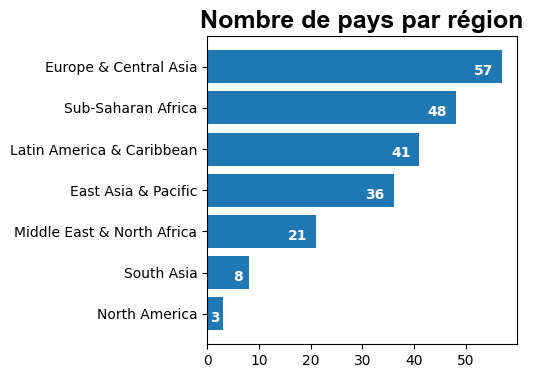

In [25]:
# On visualise le nombre de pays par région
df = (
    country.groupby("Region")[["Short Name"]]
    .count()["Short Name"]
    .sort_values(ascending=True)
)
val = df.tolist()

plt.figure(figsize=(4, 4))
plt.title("Nombre de pays par région", fontname="Arial", fontsize=18, fontweight="bold")
plt.barh(
    y=country.groupby("Region")[["Short Name"]]
    .count()
    .reset_index()
    .sort_values(by="Short Name")["Region"],
    width=country.groupby("Region")[["Short Name"]]
    .count()["Short Name"]
    .sort_values(ascending=True),
)
# plt.grid(axis='x')
# On place les nombre sur le graphe 1 par 1 
plt.text(val[6] - 5.5,  5.8, val[6], color="white", fontweight="bold")
plt.text(val[5] - 5.5,  4.8, val[5], color="white", fontweight="bold")
plt.text(val[4] - 5.5,  3.8, val[4], color="white", fontweight="bold")
plt.text(val[3] - 5.5,  2.8, val[3], color="white", fontweight="bold")
plt.text(val[2] - 5.5,  1.8, val[2], color="white", fontweight="bold")
plt.text(val[1] - 3,  0.8, val[1], color="white", fontweight="bold")
plt.text(val[0] - 2.5, -0.2, val[0], color="white", fontweight="bold")

plt.savefig('assets/graphiques/EDA_1_Nombre de pays par région.jpg', bbox_inches='tight')
plt.show()

### Income Group

In [26]:
# On liste les indicateurs de revenus
country["Income Group"].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

In [27]:
# On compte les types de revenu
country["Income Group"].nunique()

5

In [28]:
# On compte le nombre de nan dans la colonne Income Group
print("Il y a",country["Income Group"].isnull().sum(),"données manquantes dans Income Group qui correspondent aux zones ou groupes géographiques")

Il y a 27 données manquantes dans Income Group qui correspondent aux zones ou groupes géographiques


In [29]:
# Afficher les na de la colonne Income Group
country.loc[country["Income Group"].isna() == True, :]

Country Code                                      Short Name  \
5            ARB                                      Arab World   
57           EAP           East Asia & Pacific (developing only)   
58           EAS         East Asia & Pacific (all income levels)   
59           ECA         Europe & Central Asia (developing only)   
60           ECS       Europe & Central Asia (all income levels)   
63           EMU                                       Euro area   
68           EUU                                  European Union   
78           GIB                                       Gibraltar   
89           HIC                                     High income   
92           HPC          Heavily indebted poor countries (HIPC)   
116          LAC     Latin America & Caribbean (developing only)   
122          LCN   Latin America & Caribbean (all income levels)   
123          LDC    Least developed countries: UN classification   
124          LIC                                      Low income   
127          LMC                             Lower middle income   
128          LMY                             Low & middle income   
140          MEA  Middle East & North Africa (all income levels)   
143          MIC                                   Middle income   
148          MNA    Middle East & North Africa (developing only)   
157          NAC                                   North America   
166          NRU                                           Nauru   
168          OED                                    OECD members   
187          SAS                                      South Asia   
198          SSA            Sub-Saharan Africa (developing only)   
200          SSF          Sub-Saharan Africa (all income levels)   
225          UMC                             Upper middle income   
234          WLD                                           World   

                                         Table Name  \
5                                        Arab World   
57                              East Asia & Pacific   
58          East Asia & Pacific (all income levels)   
59                            Europe & Central Asia   
60        Europe & Central Asia (all income levels)   
63                                        Euro area   
68                                   European Union   
78                                        Gibraltar   
89                                      High income   
92           Heavily indebted poor countries (HIPC)   
116                       Latin America & Caribbean   
122   Latin America & Caribbean (all income levels)   
123    Least developed countries: UN classification   
124                                      Low income   
127                             Lower middle income   
128                             Low & middle income   
140  Middle East & North Africa (all income levels)   
143                                   Middle income   
148                      Middle East & North Africa   
157                                   North America   
166                                           Nauru   
168                                    OECD members   
187                                      South Asia   
198                              Sub-Saharan Africa   
200          Sub-Saharan Africa (all income levels)   
225                             Upper middle income   
234                                           World   

                                          Long Name 2-alpha code  \
5                                        Arab World           1A   
57            East Asia & Pacific (developing only)           4E   
58          East Asia & Pacific (all income levels)           Z4   
59          Europe & Central Asia (developing only)           7E   
60        Europe & Central Asia (all income levels)           Z7   
63                                        Euro area           XC   
68                                   European Union           EU   
78            

- La colonnes Unnamed ne contient que des valeurs manquantes. Elles est a supprimer lors du nettoyage.

In [30]:
# On calcule le nombre de pays par région
nb_pays_par_groupe_revenu = (
    country.groupby("Income Group")[["Short Name"]]
    .count()
    .reset_index()
    .sort_values(by="Short Name", ascending=False)
)
nb_pays_par_groupe_revenu

Income Group  Short Name
4   Upper middle income          55
3   Lower middle income          50
1  High income: nonOECD          44
2            Low income          34
0     High income: OECD          31

In [31]:
# On calcule le nombre de pays par groupe de revenu
nb_pays_par_groupe_revenu = nb_pays_par_groupe_revenu.sort_values(
    by="Short Name", ascending=False
)
nb_pays_par_groupe_revenu

Income Group  Short Name
4   Upper middle income          55
3   Lower middle income          50
1  High income: nonOECD          44
2            Low income          34
0     High income: OECD          31

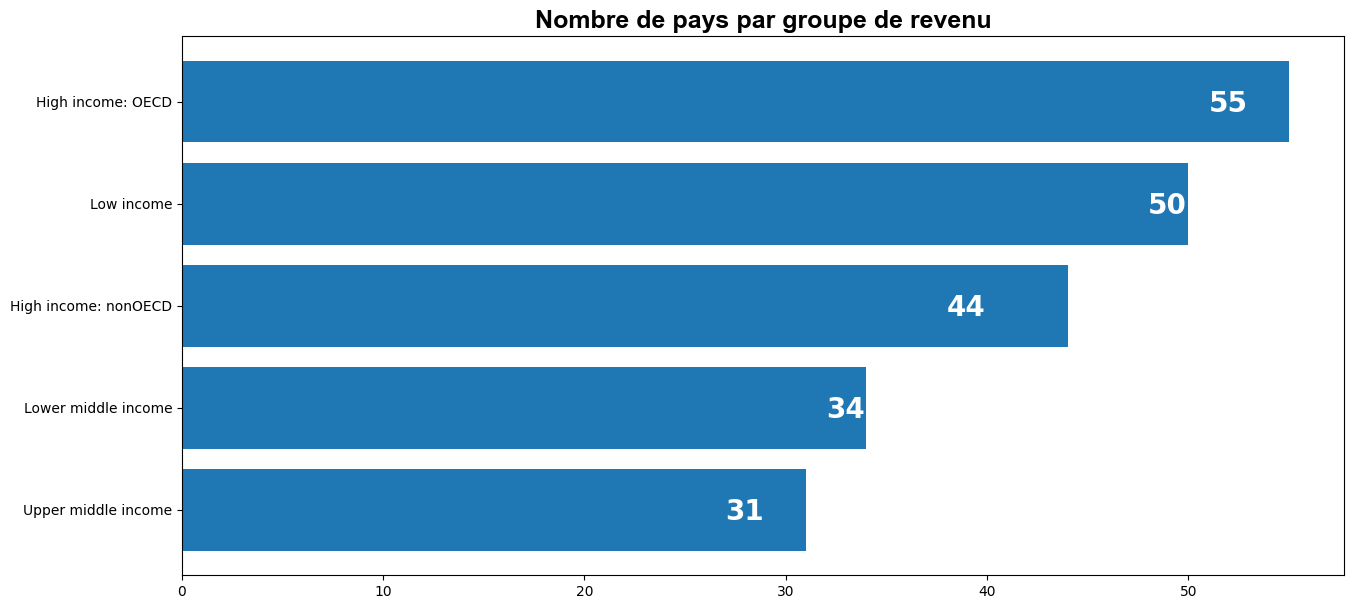

In [32]:
# On visualise le nombre de pays par groupes de revenus
plt.figure(figsize=(15, 7))
plt.barh(
    y=nb_pays_par_groupe_revenu["Income Group"],
    width=country.groupby("Income Group")[["Short Name"]]
    .count()["Short Name"]
    .sort_values(),
)
plt.title(
    "Nombre de pays par groupe de revenu",
    fontname="Arial",
    fontsize=18,
    fontweight="bold",
)
# On place les chiffres sur le graphe avec un boucle
for i in range(5):
    plt.text(
        82 - (nb_pays_par_groupe_revenu.iloc[i, 1]),
        i - 0.1,
        nb_pays_par_groupe_revenu.iloc[4 - i, 1],
        color="white",
        fontweight="bold",
        fontsize=20,
    )

plt.savefig('assets/graphiques/EDA_2_Nombre de pays par groupe de revenu.jpg', bbox_inches='tight')
plt.show()

### Les monnaies utilisées 

In [33]:
# On calcule le nombre de pays par groupe de monnaie = monnaie ma plus utilisée
nb_pays_par_groupe_monnaie = (
    country.groupby("Currency Unit")[["Short Name"]]
    .count()
    .reset_index()
    .sort_values(by="Short Name", ascending=False)
)
nb_pays_par_groupe_monnaie.head(6)

Currency Unit  Short Name
46                    Euro          23
143            U.S. dollar          14
23               CFA franc          14
42   East Caribbean dollar           6
114         Pound sterling           3
38            Danish krone           3

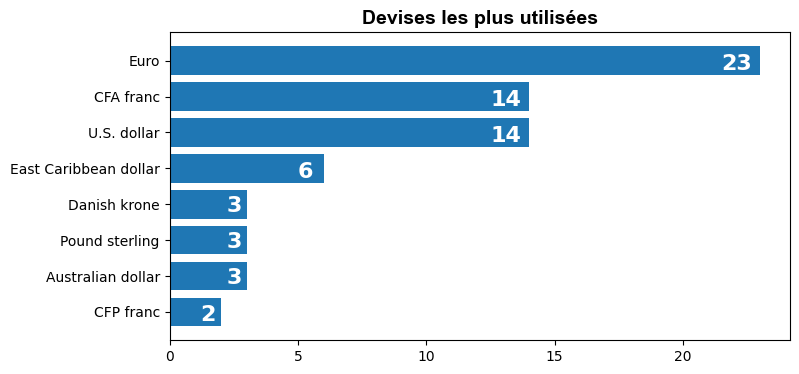

In [34]:
# On visualise les 8 monnaies les plus utilisée 
plt.figure(figsize=(8, 4))
plt.barh(
    y=country.groupby("Currency Unit")[["Short Name"]]
    .count()
    .reset_index()
    .sort_values(by="Short Name")["Currency Unit"]
    .tail(8),
    width=country.groupby("Currency Unit")[["Short Name"]]
    .count()["Short Name"]
    .sort_values()
    .tail(8),
)
plt.title(
    "Devises les plus utilisées", fontname="Arial", fontsize=14, fontweight="bold"
)
plt.text(
    21.5,
    6.74,
    nb_pays_par_groupe_monnaie.iloc[0, 1],
    color="white",
    fontweight="bold",
    fontsize=16,
)
plt.text(
    12.5,
    5.74,
    nb_pays_par_groupe_monnaie.iloc[1, 1],
    color="white",
    fontweight="bold",
    fontsize=16,
)
plt.text(
    12.5,
    4.74,
    nb_pays_par_groupe_monnaie.iloc[2, 1],
    color="white",
    fontweight="bold",
    fontsize=16,
)
plt.text(
    5,
    3.74,
    nb_pays_par_groupe_monnaie.iloc[3, 1],
    color="white",
    fontweight="bold",
    fontsize=16,
)
plt.text(
    2.2,
    2.78,
    nb_pays_par_groupe_monnaie.iloc[4, 1],
    color="white",
    fontweight="bold",
    fontsize=16,
)
plt.text(
    2.2,
    1.78,
    nb_pays_par_groupe_monnaie.iloc[5, 1],
    color="white",
    fontweight="bold",
    fontsize=16,
)
plt.text(
    2.2,
    0.78,
    nb_pays_par_groupe_monnaie.iloc[6, 1],
    color="white",
    fontweight="bold",
    fontsize=16,
)
plt.text(
    1.2,
    -0.24,
    nb_pays_par_groupe_monnaie.iloc[7, 1],
    color="white",
    fontweight="bold",
    fontsize=16,
)
plt.savefig('assets/graphiques/EDA_3_Devises les plus utilisées.jpg', bbox_inches='tight')
plt.show()

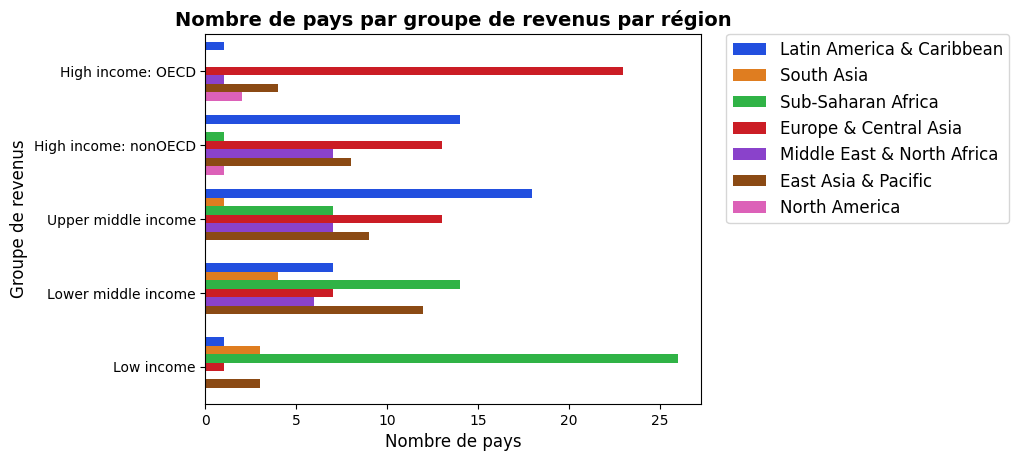

In [35]:
# Regroupement des pays par groupe de revenus

sns.countplot(
    y="Income Group",
    hue="Region",
    data=country,
    orient="h",
    order=[
        "High income: OECD",
        "High income: nonOECD",
        "Upper middle income",
        "Lower middle income",
        "Low income",
    ],
    palette=sns.color_palette('bright'),
)
plt.xlabel("Nombre de pays", fontsize=12)
plt.ylabel("Groupe de revenus", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.0, fontsize=12)
plt.title(
    "Nombre de pays par groupe de revenus par région", fontsize=14, fontweight="bold"
)
plt.grid(False)
plt.savefig('assets/graphiques/EDA_3_Nombre de pays par groupe de revenu et par régions.jpg', bbox_inches='tight')
plt.show()

### Visualiser les données Regions, Pays, Income Groups

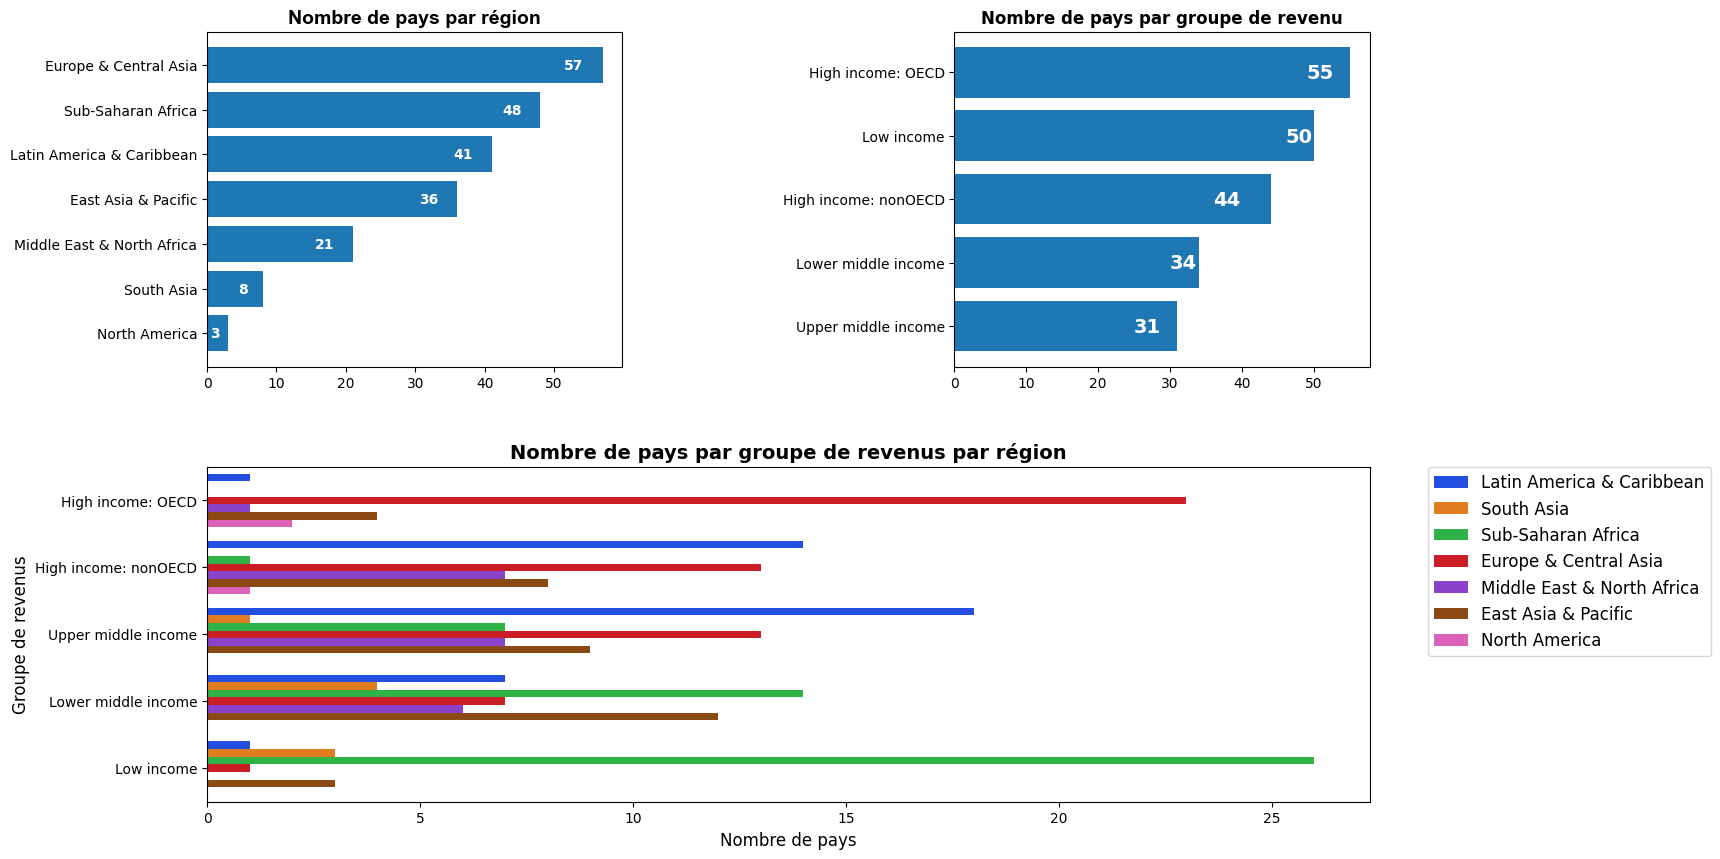

In [36]:
# Visualisation Regroupements des pays/régions/groupes de revenus pour avoir un visuel unique

fig = plt.figure(figsize=(15, 10))
grid = plt.GridSpec(2, 2, wspace=0.8, hspace=0.3)

# Graphique ligne 1, colonne 1
plt.subplot(grid[0, 0])
# Nombre de pays par région
df = (
    country.groupby("Region")[["Short Name"]]
    .count()["Short Name"]
    .sort_values(ascending=True)
)
val = df.tolist()

plt.title("Nombre de pays par région", fontname="Arial", fontsize=14, fontweight="bold")
plt.barh(
    y=country.groupby("Region")[["Short Name"]]
    .count()
    .reset_index()
    .sort_values(by="Short Name")["Region"],
    width=country.groupby("Region")[["Short Name"]]
    .count()["Short Name"]
    .sort_values(ascending=True),
)
# plt.grid(axis='x')
plt.text(val[6] - 5.5, 5.9, val[6], color="white", fontweight="bold")
plt.text(val[5] - 5.5, 4.9, val[5], color="white", fontweight="bold")
plt.text(val[4] - 5.5, 3.9, val[4], color="white", fontweight="bold")
plt.text(val[3] - 5.5, 2.9, val[3], color="white", fontweight="bold")
plt.text(val[2] - 5.5, 1.9, val[2], color="white", fontweight="bold")
plt.text(val[1] - 3.5, 0.9, val[1], color="white", fontweight="bold")
plt.text(val[0] - 2.5, -0.1, val[0], color="white", fontweight="bold")

# Graphique ligne 1, colonne 2
plt.subplot(grid[0, 1])
# Nombre de pays par groupe de revenus
plt.barh(
    y=nb_pays_par_groupe_revenu["Income Group"],
    width=country.groupby("Income Group")[["Short Name"]]
    .count()["Short Name"]
    .sort_values(),
)
plt.title("Nombre de pays par groupe de revenu", fontweight="bold")
for i in range(5):
    plt.text(
        80 - (nb_pays_par_groupe_revenu.iloc[i, 1]),
        i - 0.1,
        nb_pays_par_groupe_revenu.iloc[4 - i, 1],
        color="white",
        fontweight="bold",
        fontsize=14,
    )

# Graphique ligne 2, sur les 2 colonne
plt.subplot(grid[1, :])
# Regroupement des pays par groupe de revenus

sns.countplot(
    y="Income Group",
    hue="Region",
    data=country,
    orient="h",
    order=[
        "High income: OECD",
        "High income: nonOECD",
        "Upper middle income",
        "Lower middle income",
        "Low income",
    ],
    palette=sns.color_palette("bright"),
)
plt.xlabel("Nombre de pays", fontsize=12)
plt.ylabel("Groupe de revenus", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0, fontsize=12)
plt.title(
    "Nombre de pays par groupe de revenus par région", fontsize=14, fontweight="bold"
)
plt.grid(False)
plt.savefig('assets/graphiques/EDA_4_Synthèse 3graph.jpg', bbox_inches='tight')
plt.show()

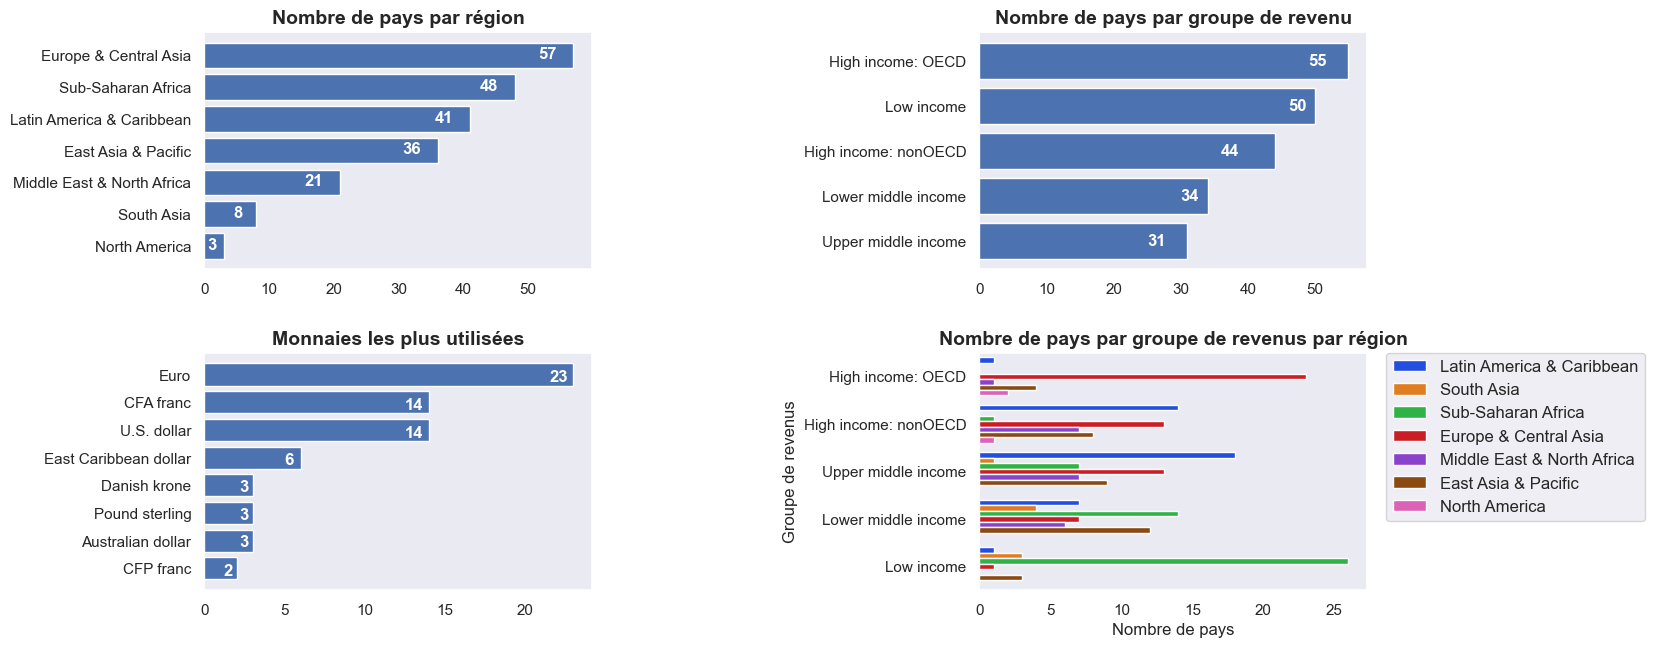

In [37]:
# Visualisation 1 visuel 4 graphiques
plt.figure(figsize=(15, 15), dpi=100)  # taille
sns.set(style="dark")
plt.subplot(4, 2, 1)
plt.title("Distribution - analyse univariée")
df = (
    country.groupby("Region")[["Short Name"]]
    .count()["Short Name"]
    .sort_values(ascending=True)
)
val = df.tolist()
# Graphique 1 : Nombre de pays par Région
plt.title("Nombre de pays par région", fontname="Arial", fontweight="bold", fontsize=14)
plt.barh(
    y=country.groupby("Region")[["Short Name"]]
    .count()
    .reset_index()
    .sort_values(by="Short Name")["Region"],
    width=country.groupby("Region")[["Short Name"]]
    .count()["Short Name"]
    .sort_values(ascending=True),
)
# plt.grid(axis='x')
plt.text(val[6] - 5.5, 5.9, val[6], color="white", fontweight="bold")
plt.text(val[5] - 5.5, 4.9, val[5], color="white", fontweight="bold")
plt.text(val[4] - 5.5, 3.9, val[4], color="white", fontweight="bold")
plt.text(val[3] - 5.5, 2.9, val[3], color="white", fontweight="bold")
plt.text(val[2] - 5.5, 1.9, val[2], color="white", fontweight="bold")
plt.text(val[1] - 3.5, 0.9, val[1], color="white", fontweight="bold")
plt.text(val[0] - 2.5, -0.1, val[0], color="white", fontweight="bold")

# Nombre de pays par groupe de revenu
plt.subplot(4, 2, 2)
plt.barh(
    y=nb_pays_par_groupe_revenu["Income Group"],
    width=country.groupby("Income Group")[["Short Name"]]
    .count()["Short Name"]
    .sort_values(),
)
plt.title(
    "Nombre de pays par groupe de revenu",
    fontname="Arial",
    fontweight="bold",
    fontsize=14,
)
# On place les chiffres sur le graphe avec un boucle
for i in range(5):
    plt.text(
        80 - (nb_pays_par_groupe_revenu.iloc[i, 1]),
        i - 0.1,
        nb_pays_par_groupe_revenu.iloc[4 - i, 1],
        color="white",
        fontweight="bold",
    )

# Monnaies les plus utilisées
plt.subplot(4, 2, 3)
plt.barh(
    y=country.groupby("Currency Unit")[["Short Name"]]
    .count()
    .reset_index()
    .sort_values(by="Short Name")["Currency Unit"]
    .tail(8),
    width=country.groupby("Currency Unit")[["Short Name"]]
    .count()["Short Name"]
    .sort_values()
    .tail(8),
)
plt.title(
    "Monnaies les plus utilisées", fontname="Arial", fontweight="bold", fontsize=14
)
plt.text(
    21.5, 6.74, nb_pays_par_groupe_monnaie.iloc[0, 1], color="white", fontweight="bold"
)
plt.text(
    12.5, 5.74, nb_pays_par_groupe_monnaie.iloc[1, 1], color="white", fontweight="bold"
)
plt.text(
    12.5, 4.74, nb_pays_par_groupe_monnaie.iloc[2, 1], color="white", fontweight="bold"
)
plt.text(
    5, 3.74, nb_pays_par_groupe_monnaie.iloc[3, 1], color="white", fontweight="bold"
)
plt.text(
    2.2, 2.78, nb_pays_par_groupe_monnaie.iloc[4, 1], color="white", fontweight="bold"
)
plt.text(
    2.2, 1.78, nb_pays_par_groupe_monnaie.iloc[5, 1], color="white", fontweight="bold"
)
plt.text(
    2.2, 0.78, nb_pays_par_groupe_monnaie.iloc[6, 1], color="white", fontweight="bold"
)
plt.text(
    1.2, -0.24, nb_pays_par_groupe_monnaie.iloc[7, 1], color="white", fontweight="bold"
)

# Regroupement des pays par groupe de revenus et par région
plt.subplot(4, 2, 4)

sns.countplot(
    y="Income Group",
    hue="Region",
    data=country,
    orient="h",
    order=[
        "High income: OECD",
        "High income: nonOECD",
        "Upper middle income",
        "Lower middle income",
        "Low income",
    ],
    palette=sns.color_palette("bright"),
)
plt.xlabel("Nombre de pays", fontsize=12)
plt.ylabel("Groupe de revenus", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0, fontsize=12)
plt.title(
    "Nombre de pays par groupe de revenus par région",
    fontname="Arial",
    fontweight="bold",
    fontsize=14,
)


plt.grid(False)

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=1, hspace=0.35)
# bbox_inches='tight'
plt.savefig('assets/graphiques/EDA_5_Synthèse 4graph.jpg', bbox_inches='tight')
plt.show()

***
<span style="font-size:16px">**Bilan de : `EdStatsCountry.csv`** : </span>
***
**_EdStatsCountry.csv contient des informations globales sur l'économie : niveau de vie, monnaie..., de chaque pays du monde ainsi qu'un classement par région de chaque pays._**

**Les informations concernent aussi des groupes de pays par région ou niveau de revenu (income)**	
-	Le jeu de données contient **241 lignes et 32 colonnes**.
    - Une fois que l'on modifie la liste avec les indicateurs par zones, on obtient 217 pays. On voit que certains pays sont en fait des subdivisions de pays : St Martin, Isle of Man, Polynésie Française, Channel Island, Sint Maarten....
-	Nombre de valeurs manquantes totales : **2354 valeurs manquantes** pour 7712 observations (**30.52 %**).
-	**Aucun doublons**.
-	**Toutes les régions du monde sont présentent**
- Information sur l'origine et l'anteriorité des données : 
    - National accounts reference year	
    - Latest industrial data	
    - Latest trade data
***
**Information complémentaire sur les données**
- La colonne **Unnamed:31 est vide** donc à supprimer
- **Le type float64 des colonnes suivantes devra être converti en format date** pout les utiliser
    - National accounts reference year
    - Latest industrial data                
    - Latest trade data

## Analyse du jeu de données EdStatsCountry-Series

In [38]:
# Import données
country_Series = pd.read_csv("assets/data/EdStatsCountry-Series.csv", sep=",")

### Description générale

In [39]:
# On affiche les 5 premières lignes
country_Series.head()

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [40]:
# Premières informations : nom colonnes, nb null, types
country_Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [41]:
# Description des variables qualitatives (pas de variable quantitatives dans ce dataframe)
country_Series.describe(exclude=[np.number])

CountryCode   SeriesCode  \
count          613          613   
unique         211           21   
top            MDA  SP.POP.TOTL   
freq            18          211   

                                              DESCRIPTION  
count                                                 613  
unique                                                 97  
top     Data sources : United Nations World Population...  
freq                                                  154

In [42]:
# Utilisation de la fonction def 
info_data(country_Series)

------------------------------------------------------------------------------------------------------
LES DONNES 

Nombre de lignes : 613 lignes
Nombre de colonnes : 4 colonnes
Nombre d'éléments dupliqués dans le dataframe : 0 eléments
Nombre total de données manquantes dans le dataframe : 613 données manquantes sur 2452 (25.0%)


### Données manquantes

Nombre total de données manquantes dans le dataframe : 613 données manquantes sur 2452 (25.0%)
------------------------------------------------------------------------------------------------------
Visualisation des données manquantes


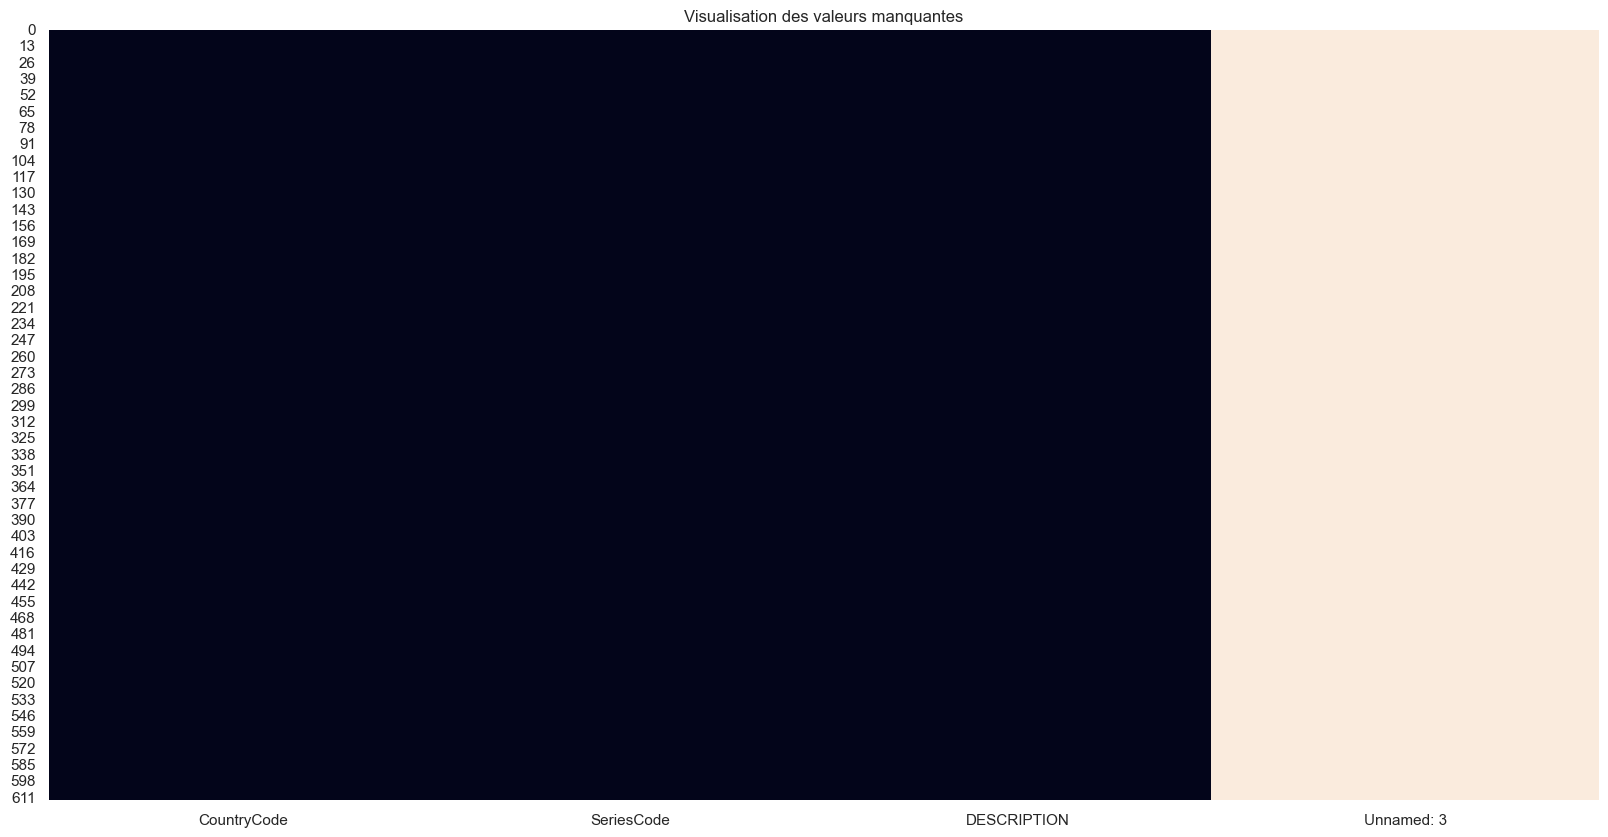

In [43]:
info_data_na(country_Series)

### CountryCode	

In [44]:
country_Series["CountryCode"].nunique()

211

In [45]:
# On affiche les pays présents dans CountrySeries mais absent de Country
country[~country['Country Code'].isin(country_Series['CountryCode'].unique())][['Short Name']]

Short Name
5                                        Arab World
47                                          Curaçao
57            East Asia & Pacific (developing only)
58          East Asia & Pacific (all income levels)
59          Europe & Central Asia (developing only)
60        Europe & Central Asia (all income levels)
63                                        Euro area
68                                   European Union
89                                      High income
92           Heavily indebted poor countries (HIPC)
116     Latin America & Caribbean (developing only)
122   Latin America & Caribbean (all income levels)
123    Least developed countries: UN classification
124                                      Low income
127                             Lower middle income
128                             Low & middle income
134                        St. Martin (French part)
140  Middle East & North Africa (all income levels)
143                                   Middle income
148    Middle East & North Africa (developing only)
157                                   North America
166                                           Nauru
168                                    OECD members
187                                      South Asia
198            Sub-Saharan Africa (developing only)
199                                     South Sudan
200          Sub-Saharan Africa (all income levels)
207                       Sint Maarten (Dutch part)
225                             Upper middle income
234                                           World

Ce sont des zones, des sudivisions de pays et des données relatrives aux revenus

### SerieCode

In [46]:
country_Series["SeriesCode"].nunique()

21

In [47]:
country_Series["SeriesCode"].unique()

array(['SP.POP.TOTL', 'SP.POP.GROW', 'NY.GDP.PCAP.PP.CD',
       'NY.GDP.MKTP.PP.KD', 'NY.GNP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.CD',
       'NY.GDP.PCAP.PP.KD', 'NY.GNP.PCAP.PP.CD', 'SP.POP.1564.TO.ZS',
       'SP.POP.TOTL.MA.ZS', 'SP.POP.TOTL.FE.ZS', 'SP.POP.0014.TO.ZS',
       'NY.GNP.PCAP.CD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD',
       'SP.POP.1564.MA.IN', 'SP.POP.0014.TO', 'SP.POP.1564.TO',
       'SP.POP.1564.FE.IN', 'SP.POP.0014.MA.IN', 'SP.POP.0014.FE.IN'],
      dtype=object)

### DESCRIPTION

In [48]:
country_Series["DESCRIPTION"].unique()

array(['Data sources : United Nations World Population Prospects',
       'Data sources: United Nations World Population Prospects',
       'Estimates are based on regression.',
       'Data sources : Institute of Statistics, Eurostat',
       'Data sources : Australian Bureau of Statistics',
       'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. ',
       'Data sources: Australian Bureau of Statistics',
       'Data sources : Eurostat',
       'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources : National Statistical Committee of the Republic of Belarus',
       'Data sources: National Statistical Committee of the Republic of Belarus',
       'Data sources : Bermuda Government Department of Statistics',
       'Data sources: Bermuda Government Departme

### Visualisation Code Pays, Code Indicateur, Description

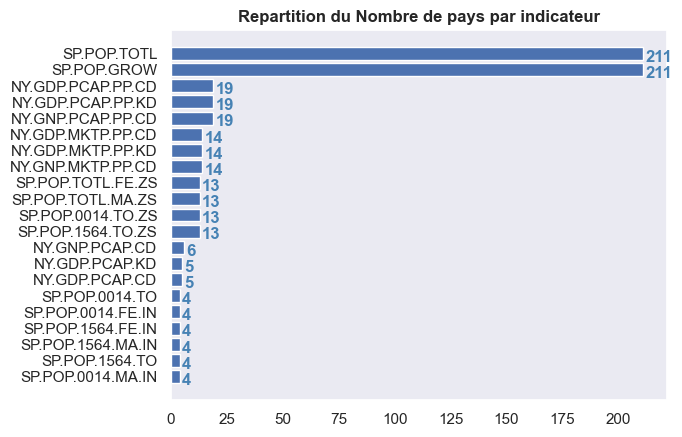

In [49]:
Series_code = country_Series.groupby('SeriesCode')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['SeriesCode']
nb_pays_serie_code=country_Series.groupby('SeriesCode')[['CountryCode']].count()['CountryCode'].sort_values(ascending=True)

# Graphique : Nombre de pays par indicateurs
plt.barh(Series_code,nb_pays_serie_code)
plt.title("Repartition du Nombre de pays par indicateur",weight='bold')
for i, var in enumerate(nb_pays_serie_code):
    plt.text(var+1,i-0.5,str(var),color='steelblue',fontweight='bold')
plt.savefig('assets/graphiques/EDA_6_Répartition pays par indicateurs.jpg', bbox_inches='tight')

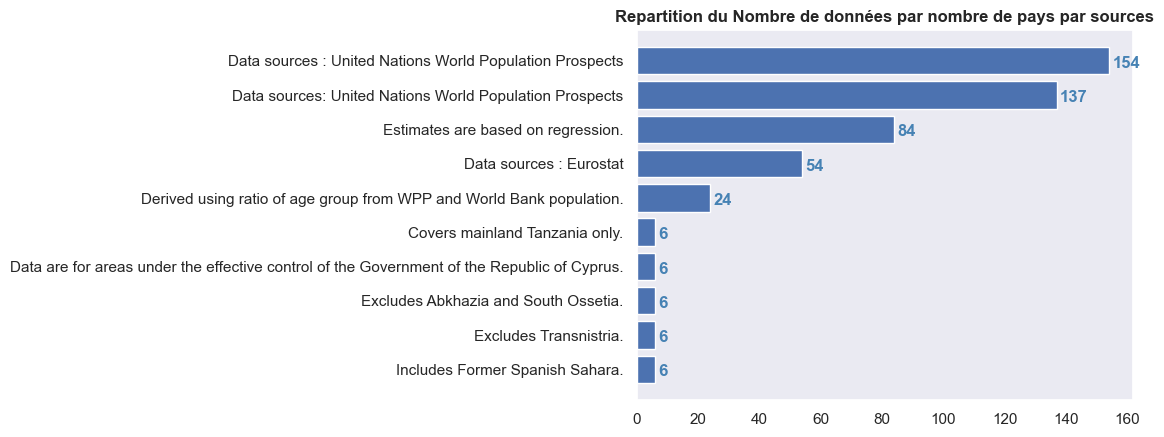

In [50]:
# Graphique : Répartition des 10 sources de données les plus utilisées
description = country_Series.groupby('DESCRIPTION')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['DESCRIPTION'].tail(10)
nb_pays_description = country_Series.groupby('DESCRIPTION')[['CountryCode']].count()['CountryCode'].sort_values().tail(10)
                
plt.barh(description,nb_pays_description)
plt.title("Repartition du Nombre de données par nombre de pays par sources",weight='bold')
for i, var in enumerate(nb_pays_description):
    plt.text(var+1,i-0.2,str(var),color='steelblue',fontweight='bold')
plt.savefig('assets/graphiques/EDA_7_Répartition source pays.jpg', bbox_inches='tight')

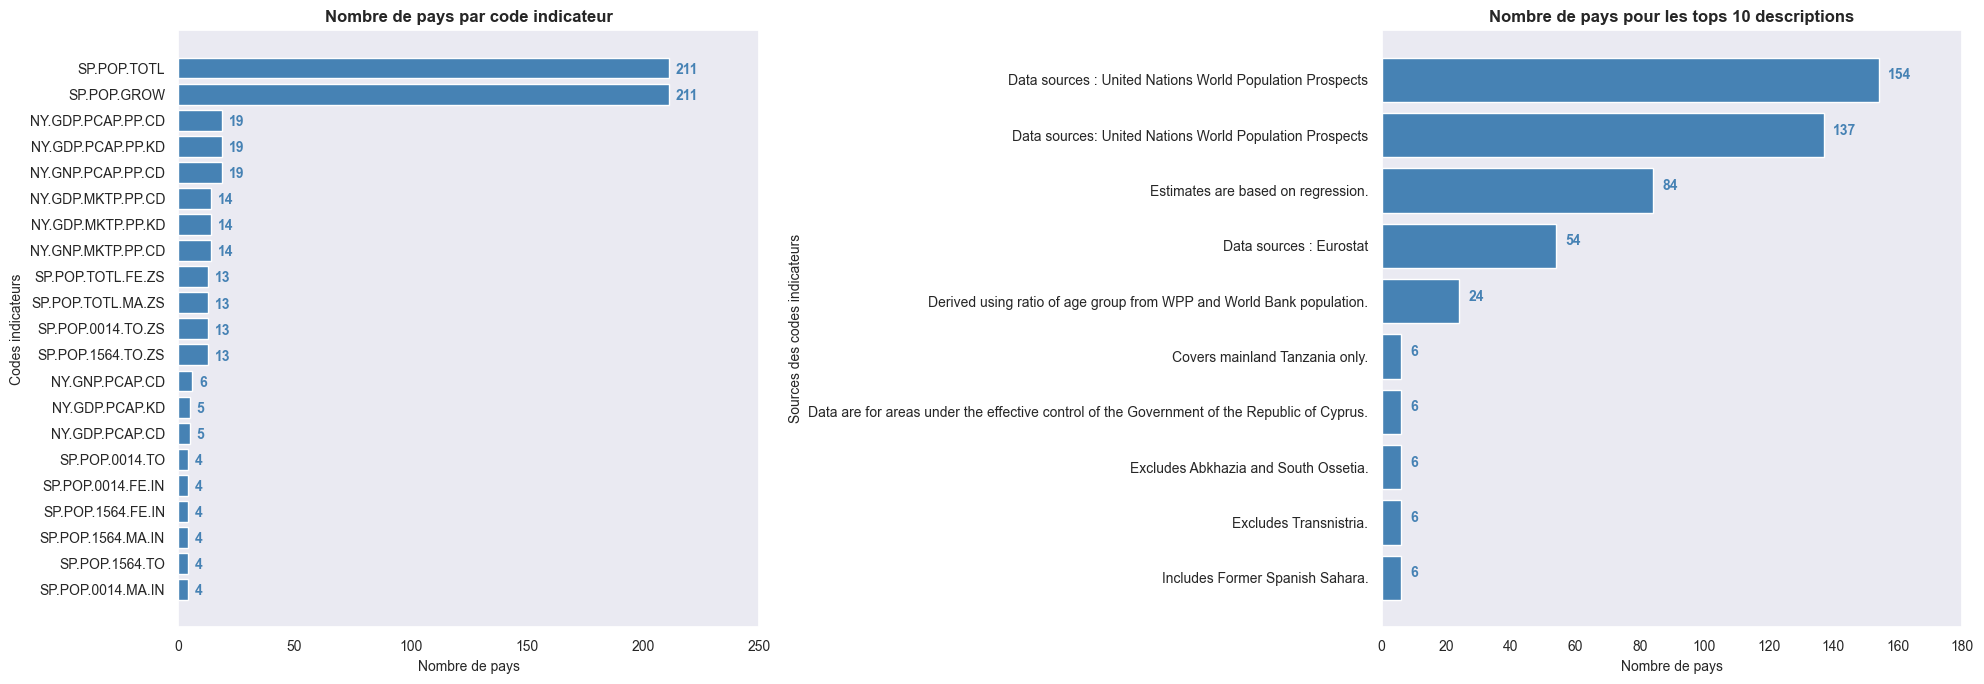

In [51]:
# Création d'un visuel unique concernant les indicateurs et les descriptions
fig, ax = plt.subplots(1, 2, figsize=(20, 7)) 

# Regroupement des pays par code indicateur

ax1=ax[0]
ax1.barh(y = Series_code, width=nb_pays_serie_code, color='SteelBlue')
for i, v in enumerate(nb_pays_serie_code):
    ax1.text(v + 3, i - .22, str(v), color='SteelBlue', fontsize=10, fontweight='bold')
ax1.set_title('Nombre de pays par code indicateur', fontsize=12,fontweight='bold')
ax1.set_xlabel('Nombre de pays', fontsize=10)
ax1.set_ylabel('Codes indicateurs', fontsize=10)
ax1.tick_params(labelsize=10)
ax1.set_xlim([0, 250])
# ax1.grid(True)

# Graphique 2 : Top 10 descriptions (sources)
ax2=ax[1]
ax2.barh(y = description, width=nb_pays_description, color='SteelBlue')
for i, v in enumerate(nb_pays_description):
    ax2.text(v + 3, i + .01, str(v), color='SteelBlue', fontsize=10, fontweight='bold')
ax2.set_title('Nombre de pays pour les tops 10 descriptions', fontsize=12,fontweight='bold')
ax2.set_xlabel('Nombre de pays', fontsize=10)
ax2.set_ylabel('Sources des codes indicateurs', fontsize=10)
ax2.tick_params(labelsize=10)
ax2.set_xlim([0, 180])
# ax2.grid(True)
plt.savefig('assets/graphiques/EDA_8_Synthèse 2graph répartition indicatreur et sources.jpg', bbox_inches='tight')
fig.tight_layout()
plt.show()

***
<span style="font-size:16px">**Bilan de : `EdStatsCountry-Series.csv`** : </span>
***
**_Le dataset nous fournit les descriptions des indicateurs contenus dans EdStatsData.csv_**
- Nombre de lignes : 613 lignes
- Nombre de colonnes : 4 colonnes
- Nombre d'éléments dupliqués dans le dataframe : 0 eléments
- Nombre total de données manquantes dans le dataframe : 613 données manquantes sur 2452 (25.0%) correspond à la colonne Unnamed:3 : colonne à supprimer
- Les données sont des données qualitatives
- Les type sont cohérents ce sont des étiquettes suaf Unnamed:3 qui est à supprimer
- **Code Country :** norme ISO-3166-3
    - 211 pays présents dans le dataframe
    - La liste ne contient pas les regroupements de pays ni certains pays : Curaçao, St Martin, Nauru, South Sudan, Sint Marteen (Dutch Part)
- **SeriesCode** nous renseigne sur le nom des indicateurs
    - 21 indicateurs différents
- **Description** des indicateurs contenus dans EdStatsData.csv
    - Description, source, date de collecte et méthode des indicateurs


## Analyse du jeu de données EdStatsFootNot

In [52]:
# Import données
footNote = pd.read_csv("assets/data/EdStatsFootNote.csv", sep=",")

### Description générale

In [53]:
footNote.head()

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [54]:
footNote.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')

In [55]:
info_data(footNote)

------------------------------------------------------------------------------------------------------
LES DONNES 

Nombre de lignes : 643638 lignes
Nombre de colonnes : 5 colonnes
Nombre d'éléments dupliqués dans le dataframe : 0 eléments
Nombre total de données manquantes dans le dataframe : 643638 données manquantes sur 3218190 (20.0%)


In [56]:
footNote.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

In [57]:
# Résumé des variables qualitatives
country.describe(exclude=[np.number])

Country Code Short Name Table Name Long Name 2-alpha code  \
count           241        241        241       241          238   
unique          241        241        241       241          238   
top             ABW      Aruba      Aruba     Aruba           AW   
freq              1          1          1         1            1   

       Currency Unit                                      Special Notes  \
count            215                                                145   
unique           152                                                131   
top             Euro  April 2012 database update: Based on official ...   
freq              23                                                  6   

                       Region         Income Group WB-2 code  ...  \
count                     214                  214       240  ...   
unique                      7                    5       240  ...   
top     Europe & Central Asia  Upper middle income        AW  ...   
freq                       57                   55         1  ...   

       External debt Reporting status       System of trade  \
count                             124                   200   
unique                              3                     2   
top                            Actual  General trade system   
freq                              107                   106   

          Government Accounting concept  \
count                               161   
unique                                2   
top     Consolidated central government   
freq                                 95   

                 IMF data dissemination standard Latest population census  \
count                                        181                      213   
unique                                         2                       27   
top     General Data Dissemination System (GDDS)                     2011   
freq                                         110                       59   

                Latest household survey  \
count                               141   
unique                               60   
top     World Health Survey (WHS), 2003   
freq                                 10   

       Source of most recent Income and expenditure data  \
count                                                160   
unique                                                75   
top              Integrated household survey (IHS), 2012   
freq                                                  15   

       Vital registration complete Latest agricultural census  \
count                          111                        142   
unique                           2                         35   
top                            Yes                       2010   
freq                           110                         36   

       Latest water withdrawal data  
count                           179  
unique                           20  
top                            2000  
freq                             40  

[4 rows x 28 columns]

### Données Manquantes

Nombre total de données manquantes dans le dataframe : 643638 données manquantes sur 3218190 (20.0%)
------------------------------------------------------------------------------------------------------
Visualisation des données manquantes


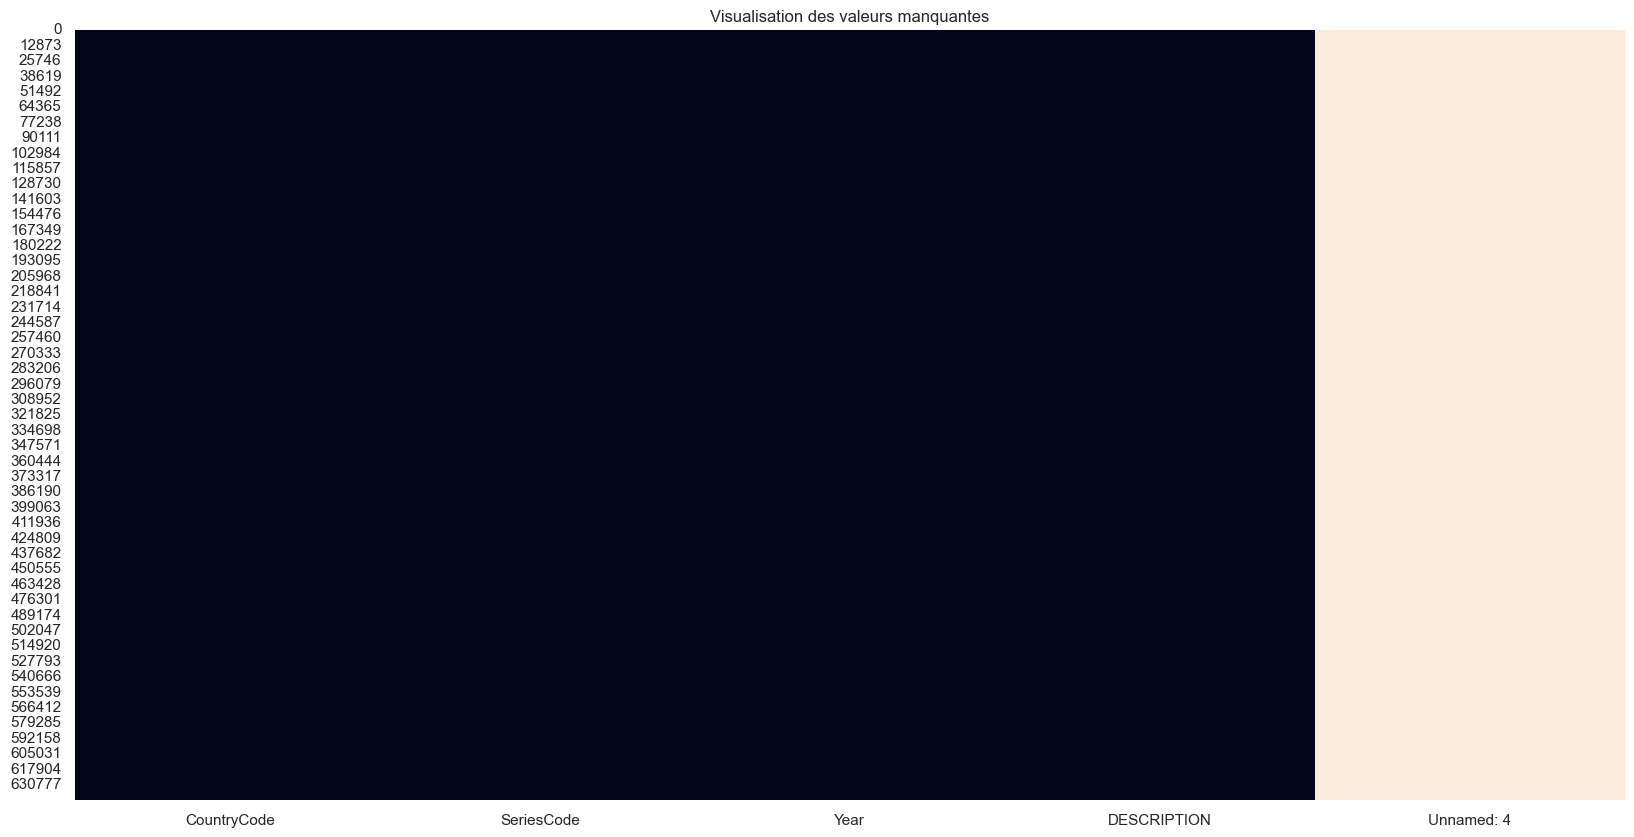

In [58]:
info_data_na(footNote)

### CountryCode

In [59]:
# Liste des noms des pays présents dans Country et qui ne sont pas présents dans le jeu de données EdStatsCountry-Series.csv
country[~country["Country Code"].isin(country_Series["CountryCode"])][
    ["Short Name"]
].sort_values(by="Short Name")

Short Name
5                                        Arab World
47                                          Curaçao
58          East Asia & Pacific (all income levels)
57            East Asia & Pacific (developing only)
63                                        Euro area
60        Europe & Central Asia (all income levels)
59          Europe & Central Asia (developing only)
68                                   European Union
92           Heavily indebted poor countries (HIPC)
89                                      High income
122   Latin America & Caribbean (all income levels)
116     Latin America & Caribbean (developing only)
123    Least developed countries: UN classification
128                             Low & middle income
124                                      Low income
127                             Lower middle income
140  Middle East & North Africa (all income levels)
148    Middle East & North Africa (developing only)
143                                   Middle income
166                                           Nauru
157                                   North America
168                                    OECD members
207                       Sint Maarten (Dutch part)
187                                      South Asia
199                                     South Sudan
134                        St. Martin (French part)
200          Sub-Saharan Africa (all income levels)
198            Sub-Saharan Africa (developing only)
225                             Upper middle income
234                                           World

### DESCRIPTION

In [60]:
list_description = footNote['DESCRIPTION'].unique().tolist()

footnote donne des Informations sur année d'origine des données et la description 
des données.
La colonne Year n'est pas utilisable, il faut la traiter :

### Year

In [61]:
# On affiche les années
footNote['Year'].unique()

array(['YR2001', 'YR2005', 'YR2000', 'YR2004', 'YR2006', 'YR2003',
       'YR1999', 'YR2008', 'YR2002', 'YR2007', 'YR2017', 'YR2010',
       'YR2009', 'YR2011', 'YR2012', 'YR2015', 'YR2014', 'YR1970',
       'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976',
       'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981', 'YR1982',
       'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987', 'YR1988',
       'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993', 'YR1994',
       'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR2013', 'YR2016',
       'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045',
       'YR2050', 'yr2012'], dtype=object)

In [62]:
# On supprime les 2 premières lettres pour avoir uniquement l'année
footNote['Year']=footNote['Year'].apply(lambda x : x[2:])
footNote['Year'].unique()

array(['2001', '2005', '2000', '2004', '2006', '2003', '1999', '2008',
       '2002', '2007', '2017', '2010', '2009', '2011', '2012', '2015',
       '2014', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '2013', '2016',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050'],
      dtype=object)

In [63]:
# On affiche les données en fonction des années
footNote.groupby('Year').count()

CountryCode  SeriesCode  DESCRIPTION  Unnamed: 4
Year                                                  
1970         5374        5374         5374           0
1971         8507        8507         8507           0
1972         8661        8661         8661           0
1973         8571        8571         8571           0
1974         8512        8512         8512           0
1975         8627        8627         8627           0
1976         8729        8729         8729           0
1977         8593        8593         8593           0
1978         8585        8585         8585           0
1979         8742        8742         8742           0
1980         8950        8950         8950           0
1981         9465        9465         9465           0
1982         9014        9014         9014           0
1983         9227        9227         9227           0
1984         9386        9386         9386           0
1985         9653        9653         9653           0
1986         9743        9743         9743           0
1987         9357        9357         9357           0
1988         9382        9382         9382           0
1989         9517        9517         9517           0
1990        10616       10616        10616           0
1991        11129       11129        11129           0
1992        11309       11309        11309           0
1993        11093       11093        11093           0
1994        11448       11448        11448           0
1995        11194       11194        11194           0
1996        11197       11197        11197           0
1997        11167       11167        11167           0
1998        14916       14916        14916           0
1999        24938       24938        24938           0
2000        25093       25093        25093           0
2001        25047       25047        25047           0
2002        25687       25687        25687           0
2003        25683       25683        25683           0
2004        27128       27128        27128           0
2005        25992       25992        25992           0
2006        23394       23394        23394           0
2007        24263       24263        24263           0
2008        25018       25018        25018           0
2009        22965       22965        22965           0
2010        22598       22598        22598           0
2011        17760       17760        17760           0
2012        13904       13904        13904           0
2013        13405       13405        13405           0
2014        11378       11378        11378           0
2015         6348        6348         6348           0
2016          819         819          819           0
2017          558         558          558           0
2020          140         140          140           0
2025          140         140          140           0
2030          140         140          140           0
2035          144         144          144           0
2040          144         144          144           0
2045          144         144          144           0
2050          144         144          144           0

In [64]:
footNote['Year'].sort_values().unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050'],
      dtype=object)

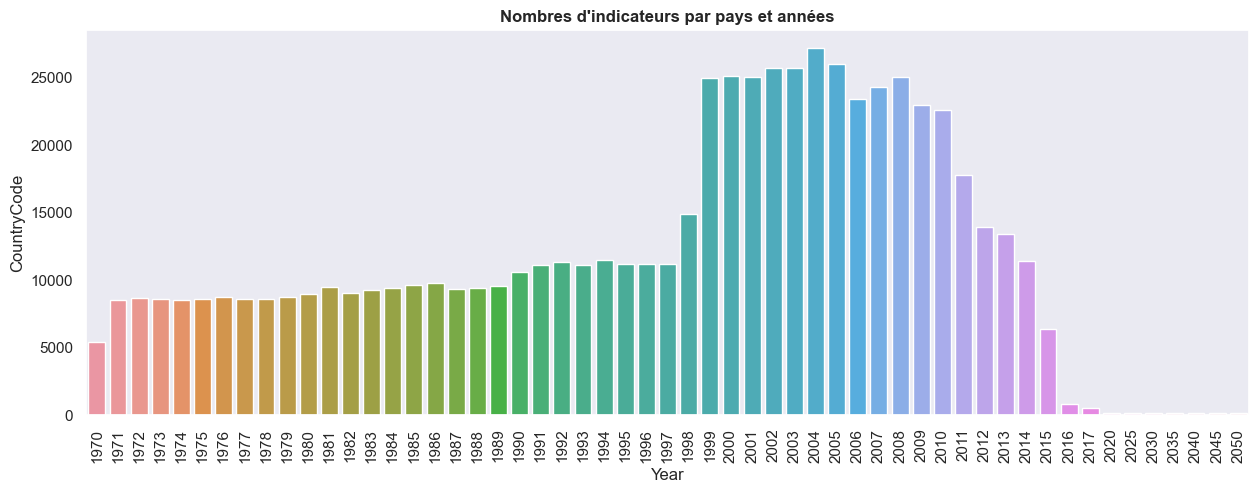

In [65]:
# Visualiser la répartion du nombre d'indicateurs par pays et année
plt.figure(figsize=(15,5))
plt.title("Nombres d'indicateurs par pays et années",fontweight='bold')
sns.barplot(data=footNote.groupby('Year').count().reset_index(),y='CountryCode',x='Year')  
plt.xticks(rotation=90)
plt.savefig("assets/graphiques/EDA_9_Nombres d'indicateurs par pays et années.jpg", bbox_inches='tight')
plt.show()

***
<span style="font-size:16px">**Bilan de : `EdStatsFootNote.csv`** : </span>
***
- CountryCode : code pays en norme ISO-3166-3
- Nombre de lignes : 643638 lignes
- Nombre de colonnes : 5 colonnes
- Nombre d'éléments dupliqués dans le dataframe : 0 eléments
- Nombre total de données manquantes dans le dataframe : 643638 données manquantes  sur 3218190 (20.0%)
- Type : étiquette sauf 
    - Unnamed: 4, à supprimer, représente 100% des valeurs manquantes
- Year : est nettoyé mais pas converti en date
    - Les années s'étendent de 1970 à 2050 et il faudra aller plus loin à partir de 2014
- DESCRIPTION : montre les précautions prises quant à la collecte
***
- Pays présents dans CountrySeries mais absents de CountryPays sont des zones ou des subdivisions de pays
***

## Analyse du jeu de données EdStatsSeries

In [66]:
# Import données
serie = pd.read_csv("assets/data/EdStatsSeries.csv", sep=",")

### Descriptions générales

In [67]:
serie.head()

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   
3         NaN         NaN         NaN                NaN  ...   
4         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   
3                        NaN               NaN   
4                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   
3                  NaN             NaN                 NaN           NaN   
4                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

In [68]:
info_data(serie)

------------------------------------------------------------------------------------------------------
LES DONNES 

Nombre de lignes : 3665 lignes
Nombre de colonnes : 21 colonnes
Nombre d'éléments dupliqués dans le dataframe : 0 eléments
Nombre total de données manquantes dans le dataframe : 55203 données manquantes sur 76965 (71.72%)


In [69]:
serie.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

### Données manquantes

Nombre total de données manquantes dans le dataframe : 55203 données manquantes sur 76965 (71.72%)
------------------------------------------------------------------------------------------------------
Visualisation des données manquantes


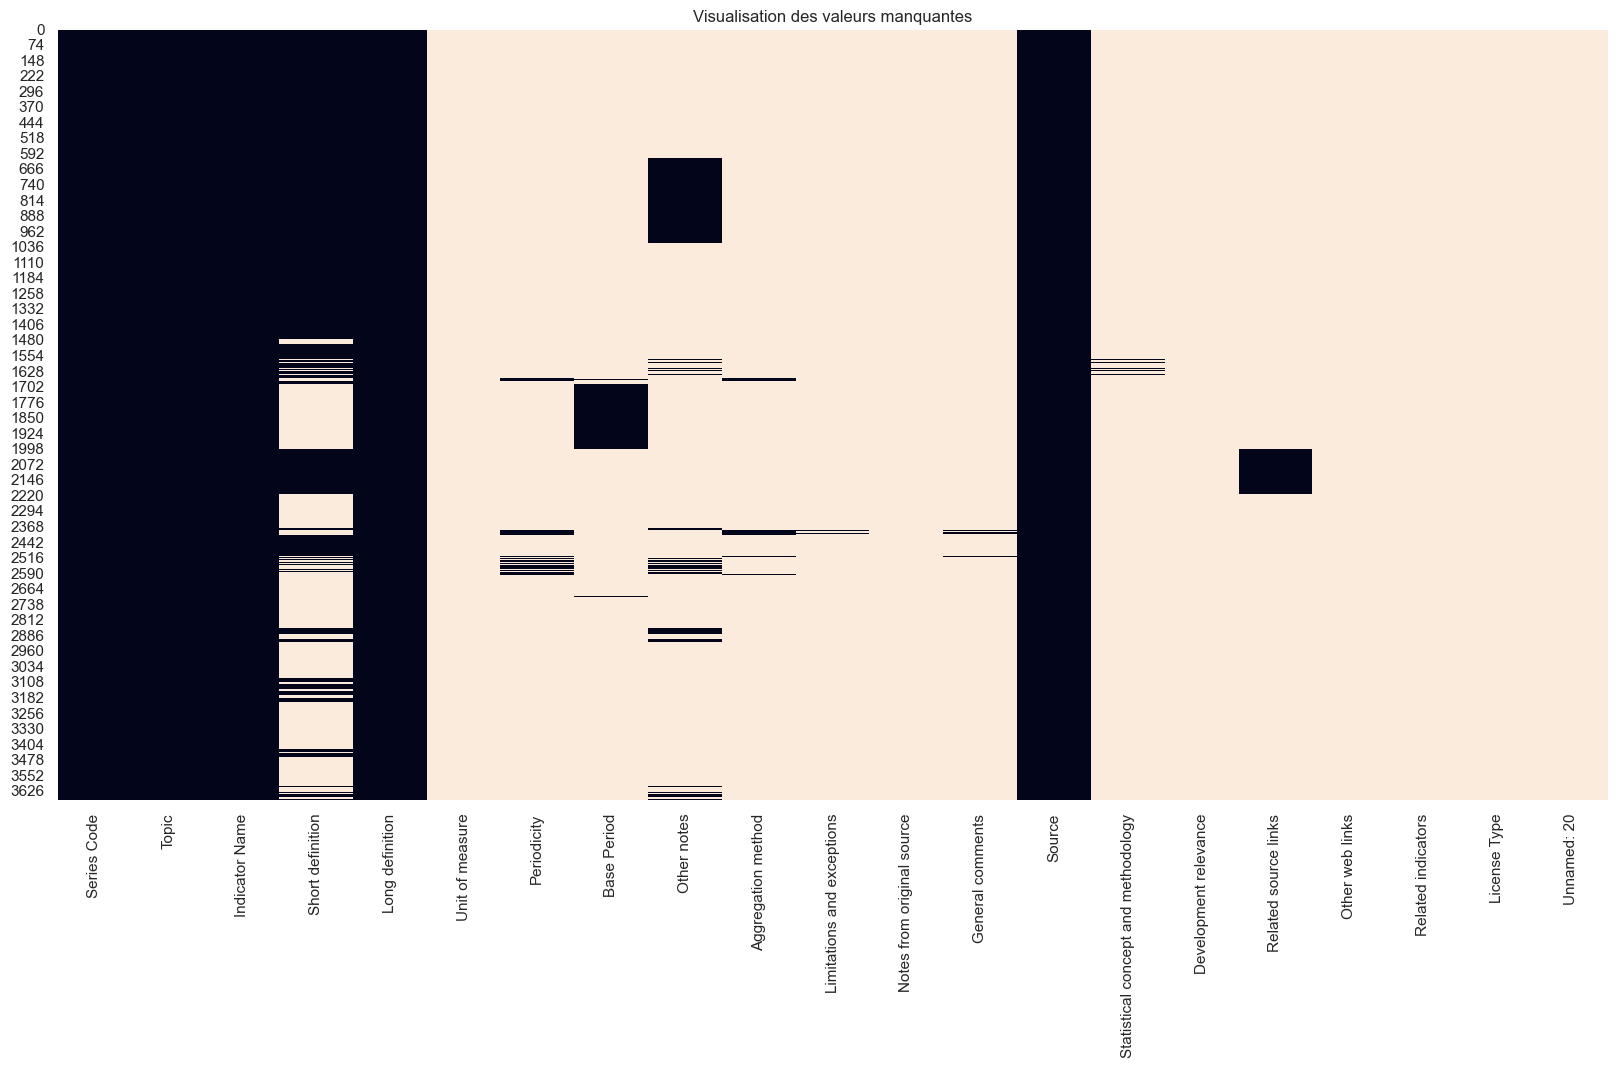

In [70]:
info_data_na(serie)

In [71]:
# On affiche le pourcentage de données manquantes par colonne classée dans l'ordre croissant
na_serie = serie.isnull().mean()*100
na_serie.sort_values()

Series Code                              0.000000
Topic                                    0.000000
Indicator Name                           0.000000
Long definition                          0.000000
Source                                   0.000000
Short definition                        41.173261
Other notes                             84.938608
Base Period                             91.432469
Related source links                    94.133697
Periodicity                             97.298772
Aggregation method                      98.717599
Statistical concept and methodology     99.372442
Limitations and exceptions              99.618008
General comments                        99.618008
Development relevance                   99.918145
Notes from original source             100.000000
License Type                           100.000000
Unit of measure                        100.000000
Other web links                        100.000000
Related indicators                     100.000000


### Serie Code

In [72]:
serie['Series Code'].head()

0    BAR.NOED.1519.FE.ZS
1       BAR.NOED.1519.ZS
2    BAR.NOED.15UP.FE.ZS
3       BAR.NOED.15UP.ZS
4    BAR.NOED.2024.FE.ZS
Name: Series Code, dtype: object

In [73]:
serie['Series Code'].nunique()

3665

### Topic

In [74]:
# Afficher 5 dernieres valeurs 
serie['Topic'].tail()

3660    Expenditures
3661    Expenditures
3662    Expenditures
3663    Expenditures
3664    Expenditures
Name: Topic, dtype: object

In [75]:
# Lister les items
list_item = serie['Topic'].unique()
# Visualiser les 20 premiers items
list_item[:20]

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy'], dtype=object)

In [76]:
serie['Topic'].nunique()

37

### Indicator Name

In [77]:
serie['Indicator Name'].nunique()

3665

In [78]:
list_indicator = serie['Indicator Name'].unique().tolist()
list_indicator[350:400]

['Barro-Lee: Average years of tertiary schooling, age 55-59, total',
 'Barro-Lee: Average years of tertiary schooling, age 55-59, female',
 'Barro-Lee: Average years of tertiary schooling, age 60-64, total',
 'Barro-Lee: Average years of tertiary schooling, age 60-64, female',
 'Barro-Lee: Average years of tertiary schooling, age 65-69, total',
 'Barro-Lee: Average years of tertiary schooling, age 65-69, female',
 'Barro-Lee: Average years of tertiary schooling, age 70-74, total',
 'Barro-Lee: Average years of tertiary schooling, age 70-74, female',
 'Barro-Lee: Average years of tertiary schooling, age 75+, total',
 'Barro-Lee: Average years of tertiary schooling, age 75+, female',
 'DHS: Gross attendance rate. Post Secondary',
 'DHS: Gross attendance rate. Post Secondary. Female',
 'DHS: Gross attendance rate. Post Secondary. Male',
 'DHS: Gross attendance rate. Post Secondary. Quintile 1',
 'DHS: Gross attendance rate. Post Secondary. Quintile 2',
 'DHS: Gross attendance rate. Post S

### Long definition

In [79]:
# Nombre de variable dans serie
serie['Long definition'].count()

3665

In [80]:
# On affiche les définitions longues
serie['Long definition'].head(2)

0    Percentage of female population age 15-19 with...
1    Percentage of population age 15-19 with no edu...
Name: Long definition, dtype: object

### Short definition

In [81]:
# On affiche les définitions longues 
serie['Short definition'].count()

2156

### Les topics avec le plus d'indicateurs

In [82]:
# Nombres d'indicateurs pour les 10 items les plus renseignés
items = serie.groupby('Topic')['Series Code'].count().reset_index().sort_values(by="Series Code",ascending=False)
items

Topic  Series Code
19                                  Learning Outcomes         1046
0                                          Attainment          733
9                                  Education Equality          426
28                                          Secondary          256
24                                            Primary          248
21                                         Population          213
34                                           Tertiary          158
32                                           Teachers          137
12                                       Expenditures           93
11                Engaging the Private Sector (SABER)           51
20                                           Literacy           32
33                                   Teachers (SABER)           29
25         School Autonomy and Accountability (SABER)           29
4                           Early Childhood Education           24
10   Education Management Information Systems (SABER)           23
22                        Post-Secondary/Non-Tertiary           19
26                             School Finance (SABER)           18
35                         Tertiary Education (SABER)           17
31                         Student Assessment (SABER)           15
23                                        Pre-Primary           14
15                      Health: Population: Structure           13
36                      Workforce Development (SABER)           12
3                     Early Child Development (SABER)           12
29   Social Protection & Labor: Labor force structure           11
27           School Health and School Feeding (SABER)            9
8     Economic Policy & Debt: Purchasing power parity            6
30            Social Protection & Labor: Unemployment            3
7   Economic Policy & Debt: National accounts: US$...            3
18                                              Laber            3
1                                          Background            2
17                     Infrastructure: Communications            2
6   Economic Policy & Debt: National accounts: US$...            2
2                                                EMIS            2
16                               Health: Risk factors            1
14                       Health: Population: Dynamics            1
13                                  Health: Mortality            1
5   Economic Policy & Debt: National accounts: Atl...            1

***
<span style="font-size:16px">**Bilan de `EdStatsSeries.csv`** : </span>
***
- Nombre de lignes : 3665 lignes
- Nombre de colonnes : 21 colonnes
- Nombre d'éléments dupliqués dans le dataframe : 0 eléments
- Nombre total de données manquantes dans le dataframe : 55203 données manquantes sur 76965 (71.72%)
- 16 Colonnes à supprimer (% remplissage entre 100% et 40% de valeurs manquantes)
    - 8 colonnes plus de 90% de na
    - Other notes plus de 80%
    - Short definition 41.2%
    - Serie Code : 3665 1 pour chaque indicateot (chaque ligne)
    - Topic : sujet/theme/item associé aux indicateurs (37 topics possibles)
    - Indicator Name : 3665 1 indicateur par ligne


## Analyse du jeu de données EdStatsData

In [83]:
# Import données
data = pd.read_csv("assets/data/EdStatsData.csv", sep=",")

### Decription générale 

In [84]:
data.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [85]:
# Nombre de type de variable
values = data.dtypes.value_counts()
nb_tt = values.sum()
percent = round(values / nb_tt*100,2)
# print(values)
# print(nb_tt)
tab_type = pd.concat([values, percent], axis=1)
tab_type.columns = ['Nombre par type de variable'
                 , '% des types de variable']  # création des colonnes
display(tab_type[tab_type['Nombre par type de variable'] != 0]
        .sort_values('% des types de variable', ascending = False)# trier les valeurs par ordre decroissant
        .style.background_gradient("Blues")) # choix couleurs radial

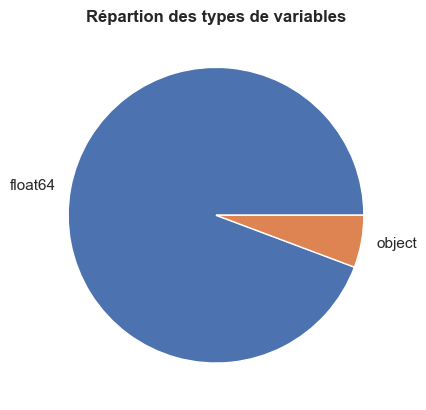

In [86]:
plt.pie(x = data.dtypes.value_counts(),
        labels = data.dtypes.value_counts().index,
       )
plt.title('Répartion des types de variables',fontweight='bold')
plt.show()

In [87]:
# Résumé des variables qualitatives
data.describe(exclude=[np.number])

Country Name Country Code  \
count        886930       886930   
unique          242          242   
top      Arab World          ARB   
freq           3665         3665   

                                           Indicator Name Indicator Code  
count                                              886930         886930  
unique                                               3665           3665  
top     Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2  
freq                                                  242            242

In [88]:
# Résumé des variables quantitatives
data.describe()

1970          1971          1972          1973          1974  \
count  7.228800e+04  3.553700e+04  3.561900e+04  3.554500e+04  3.573000e+04   
mean   1.974772e+09  4.253638e+09  4.592365e+09  5.105006e+09  5.401493e+09   
std    1.211687e+11  1.804814e+11  1.914083e+11  2.059170e+11  2.112150e+11   
min   -1.435564e+00 -1.594625e+00 -3.056522e+00 -4.032582e+00 -4.213563e+00   
25%    8.900000e-01  8.853210e+00  9.240920e+00  9.595200e+00  9.861595e+00   
50%    6.317724e+00  6.316240e+01  6.655139e+01  6.969595e+01  7.087760e+01   
75%    6.251250e+01  5.655200e+04  5.863650e+04  6.202900e+04  6.383675e+04   
max    1.903929e+13  1.986457e+13  2.100916e+13  2.238367e+13  2.282991e+13   

               1975          1976          1977          1978          1979  \
count  8.730600e+04  3.748300e+04  3.757400e+04  3.757600e+04  3.680900e+04   
mean   2.314288e+09  5.731808e+09  6.124437e+09  6.671489e+09  7.436724e+09   
std    1.375059e+11  2.215546e+11  2.325489e+11  2.473986e+11  2.660957e+11   
min   -3.658569e+00 -2.950945e+00 -3.174870e+00 -3.558749e+00 -2.973612e+00   
25%    1.400000e+00  9.312615e+00  9.519913e+00  1.000000e+01  1.000000e+01   
50%    9.677420e+00  7.101590e+01  7.133326e+01  7.290512e+01  7.510173e+01   
75%    7.854163e+01  5.682800e+04  5.739175e+04  5.940425e+04  6.411500e+04   
max    2.300634e+13  2.424128e+13  2.521383e+13  2.622101e+13  2.730873e+13   

       ...          2060          2065          2070          2075  \
count  ...  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04   
mean   ...  7.224868e+02  7.271290e+02  7.283779e+02  7.266484e+02   
std    ...  2.215845e+04  2.287990e+04  2.352338e+04  2.408149e+04   
min    ... -1.630000e+00 -1.440000e+00 -1.260000e+00 -1.090000e+00   
25%    ...  3.000000e-02  3.000000e-02  2.000000e-02  2.000000e-02   
50%    ...  2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01   
75%    ...  7.505000e+00  7.500000e+00  7.300000e+00  7.100000e+00   
max    ...  2.951569e+06  3.070879e+06  3.169711e+06  3.246239e+06   

               2080          2085          2090          2095          2100  \
count  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04   
mean   7.228327e+02  7.176899e+02  7.113072e+02  7.034274e+02  6.940296e+02   
std    2.455897e+04  2.496587e+04  2.530183e+04  2.556069e+04  2.574189e+04   
min   -9.200000e-01 -7.800000e-01 -6.500000e-01 -5.500000e-01 -4.500000e-01   
25%    1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02   
50%    2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01  2.200000e-01   
75%    6.722500e+00  6.080000e+00  5.462500e+00  4.680000e+00  4.032500e+00   
max    3.301586e+06  3.337871e+06  3.354746e+06  3.351887e+06  3.330484e+06   

       Unnamed: 69  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 66 columns]

In [89]:
info_data(data)

------------------------------------------------------------------------------------------------------
LES DONNES 

Nombre de lignes : 886930 lignes
Nombre de colonnes : 70 colonnes
Nombre d'éléments dupliqués dans le dataframe : 0 eléments
Nombre total de données manquantes dans le dataframe : 53455179 données manquantes sur 62085100 (86.1%)


### Données manquantes

Nombre total de données manquantes dans le dataframe : 53455179 données manquantes sur 62085100 (86.1%)
------------------------------------------------------------------------------------------------------
Visualisation des données manquantes


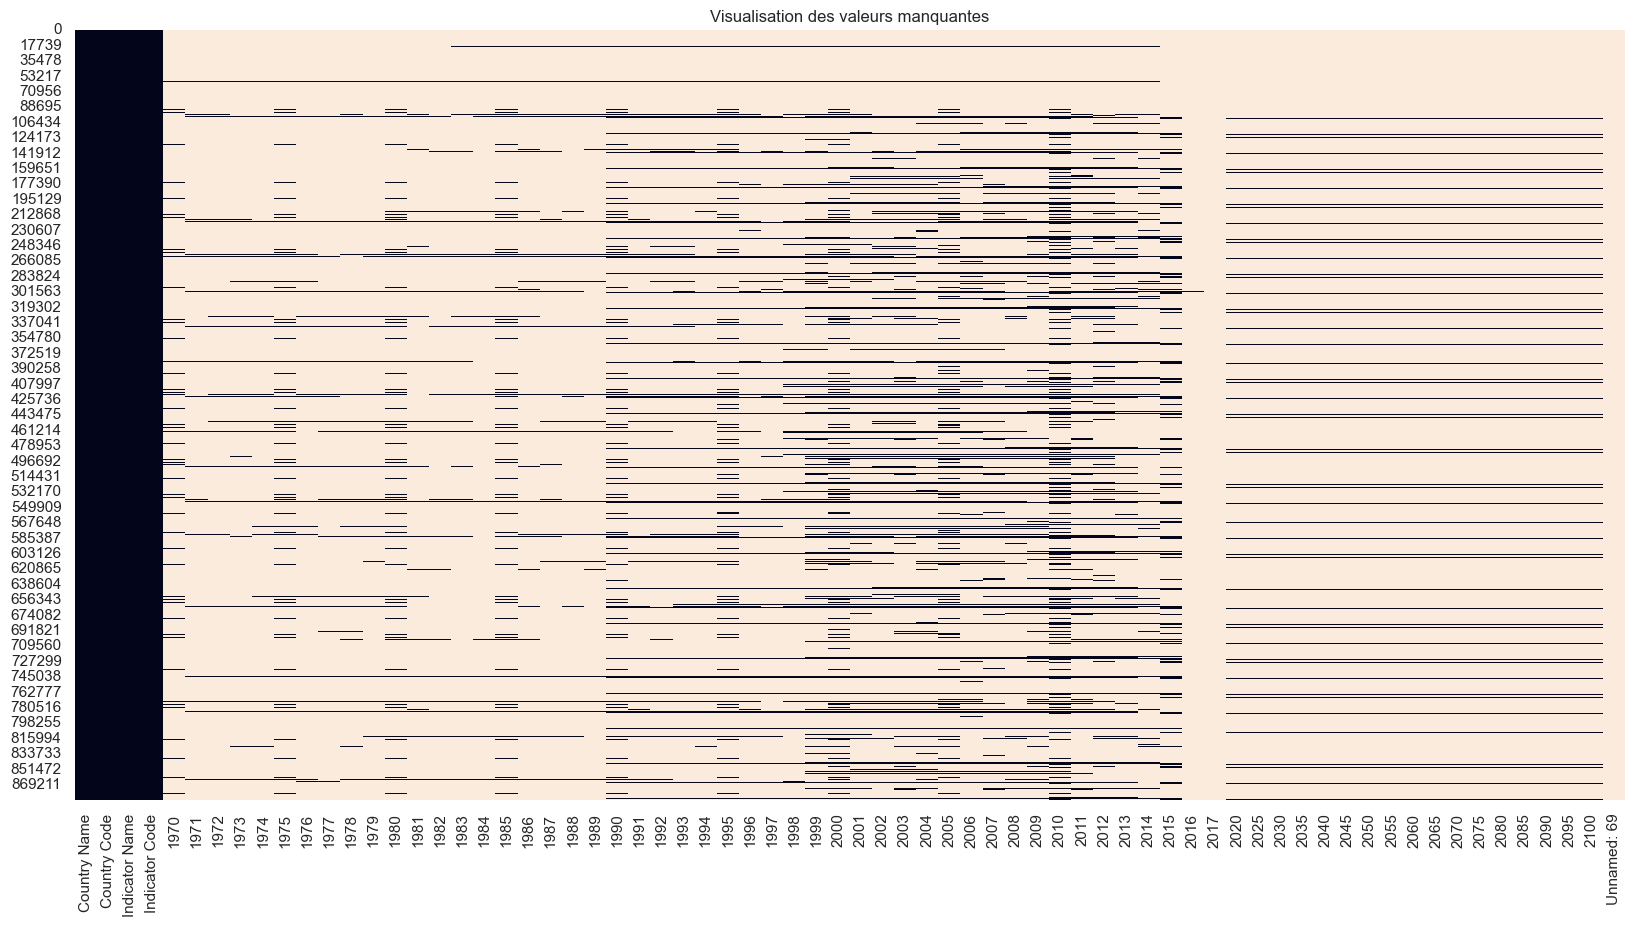

In [90]:
info_data_na(data)

### Indicator Name, Indicator Name, Country, Code, Country Name

In [91]:
# data['Indicator Name'].unique().tolist()
# Nombre d'indicateurs Indicator Name
data['Indicator Name'].nunique()

3665

In [92]:
data['Country Code'].nunique()

242

In [93]:
data['Country Name'].nunique()

242

In [94]:
# 3665 indicateurs * 242 pays et zones = notre nb le ligne
data['Indicator Code'].nunique() * data['Country Name'].nunique() == data.shape[0]

True

In [95]:
# On a le même nombre d'indicateurs dans data et dans serie
serie['Series Code'].nunique() == data['Indicator Code'].nunique()

True

## Comparer les pays presents dans les dataframes

### Comparaison des pays présents dans EdStatsData.csv et EdStatsCountries.csv

In [96]:
data['Country Code'].nunique() == country['Country Code'].nunique()
# Les code ISO-3 présents ne sont pas les mêmes dans ces 2 fichiers

False

In [97]:
# On recheche la liste des pays qui sont différents entre ces 2 fichiers
df_pays_en_trop = data[~data['Country Code'].isin(country['Country Code'])][['Country Name','Country Code']]
df_pays_en_trop.nunique()

Country Name    1
Country Code    1
dtype: int64

In [98]:
# Pays en trop dans EdStatsData.csv est 'British Virgin Islands'
df_pays_en_trop.drop_duplicates(inplace=True)
df_pays_en_trop

Country Name Country Code
190580  British Virgin Islands          VGB

### Comparaison des pays présents dans EdStatsData.csv et EdStatsCountries-Series.csv

In [99]:
data['Country Code'].nunique() == country_Series['CountryCode'].nunique()
# Les code ISO-3 présents ne sont pas les mêmes dans ces 2 fichiers

False

In [100]:
# On recheche la liste des pays qui sont différents entre ces 2 fichiers
df_pays_en_trop = data[~data['Country Code'].isin(country_Series['CountryCode'])][['Country Name','Country Code']]
# nombre de Country Code en trop
df_pays_en_trop.nunique()

Country Name    31
Country Code    31
dtype: int64

In [101]:
df_pays_en_trop.drop_duplicates(inplace=True)
df_pays_en_trop

Country Name Country Code
0                                              Arab World          ARB
3665                                  East Asia & Pacific          EAS
7330          East Asia & Pacific (excluding high income)          EAP
10995                                           Euro area          EMU
14660                               Europe & Central Asia          ECS
18325       Europe & Central Asia (excluding high income)          ECA
21990                                      European Union          EUU
25655              Heavily indebted poor countries (HIPC)          HPC
29320                                         High income          HIC
32985                           Latin America & Caribbean          LCN
36650   Latin America & Caribbean (excluding high income)          LAC
40315        Least developed countries: UN classification          LDC
43980                                 Low & middle income          LMY
47645                                          Low income          LIC
51310                                 Lower middle income          LMC
54975                          Middle East & North Africa          MEA
58640   Middle East & North Africa (excluding high inc...          MNA
62305                                       Middle income          MIC
65970                                       North America          NAC
69635                                        OECD members          OED
73300                                          South Asia          SAS
76965                                  Sub-Saharan Africa          SSF
80630          Sub-Saharan Africa (excluding high income)          SSA
84295                                 Upper middle income          UMC
87960                                               World          WLD
190580                             British Virgin Islands          VGB
274875                                            Curacao          CUW
593730                                              Nauru          NRU
718340                          Sint Maarten (Dutch part)          SXM
740330                                        South Sudan          SSD
758655                           St. Martin (French part)          MAF

In [102]:
# Zones et indication revennus : suppression des subdivision de pays
liste_zones_et_income=df_pays_en_trop['Country Code'].to_list()
print("liste des codes ISO-3 des zones pays et incomes :",liste_zones_et_income)

liste des codes ISO-3 des zones pays et incomes : ['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC', 'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'MIC', 'NAC', 'OED', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD', 'VGB', 'CUW', 'NRU', 'SXM', 'SSD', 'MAF']


## Données et années

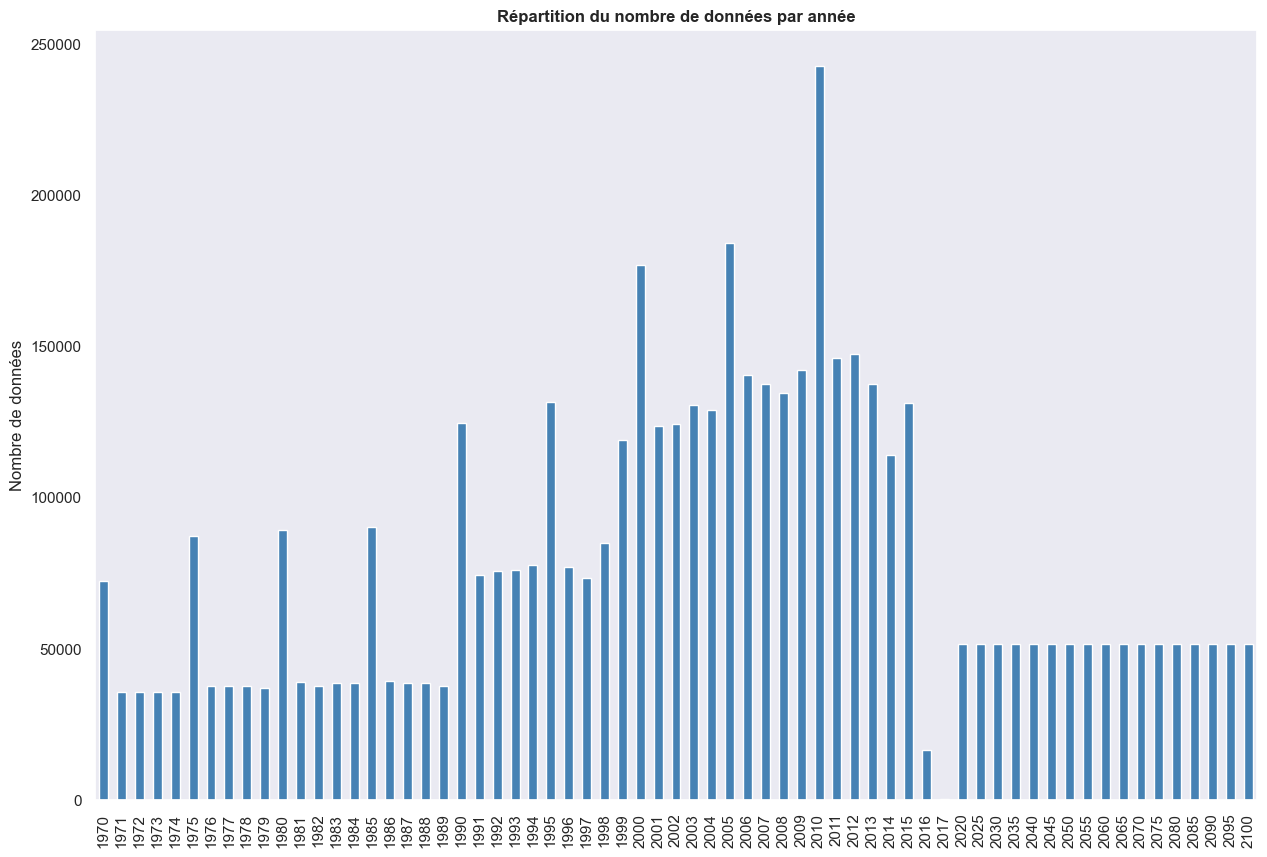

In [103]:
# Répartition du nombre de données renseignées par années pour tous les indicateurs et tous les pays
plt.figure(figsize=(15, 10))
donnees_dispo = data.loc[:,'1970':'2100'].notnull().sum()
ax1 = donnees_dispo.plot(kind='bar', color='SteelBlue')
ax1.set_title('Répartition du nombre de données par année',fontweight='bold')
ax1.set_ylabel('Nombre de données')
plt.savefig("assets/graphiques/EDA_10_Répartition du nombre de données par année.jpg", bbox_inches='tight')
ax1.grid(False)

### Découpage en decennies

In [104]:
# On créer des colonnes par decennies
data['1970s'] = data.loc[:,'1970':'1979'].mean(1)
data['1980s'] = data.loc[:,'1980':'1989'].mean(1)
data['1990s'] = data.loc[:,'1990':'1999'].mean(1)
data['2000s'] = data.loc[:,'2000':'2009'].mean(1)
data['2010s'] = data.loc[:,'2010':'2017'].mean(1)
data['2020s'] = data.loc[:,['2020','2025']].mean(1)
data['2030s'] = data.loc[:,['2030','2035']].mean(1)
data['2040s'] = data.loc[:,['2040','2045']].mean(1)
data['2050s'] = data.loc[:,['2050','2055']].mean(1)
data['2060s'] = data.loc[:,['2060','2065']].mean(1)
data['2070s'] = data.loc[:,['2070','2075']].mean(1)
data['2080s'] = data.loc[:,['2080','2085']].mean(1)
data['2090s'] = data.loc[:,['2090','2095']].mean(1)
data['2100s'] = data.loc[:,'2050']

In [105]:
# On crée df_decennies de data pour travailler dessus et regrouper les années par decennies
#ddata_decennie pour annalyser les décennies
df_decennies = data.copy()

In [106]:
# On affiche les colonnes
df_decennies.columns
# Il manque les années 2018,2019
# A partir de 2020, 2 colonnes par décennie

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69', '1970s', '1980s', '1990s', '2000s',
       '2010s', '2020s', '2030s', '2040s', '2050s', '2060s', '2070s', '2080s',
       '2090s', '2100s'],
      dtype='object')

In [107]:
df_decennies.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'], axis=1, inplace=True)

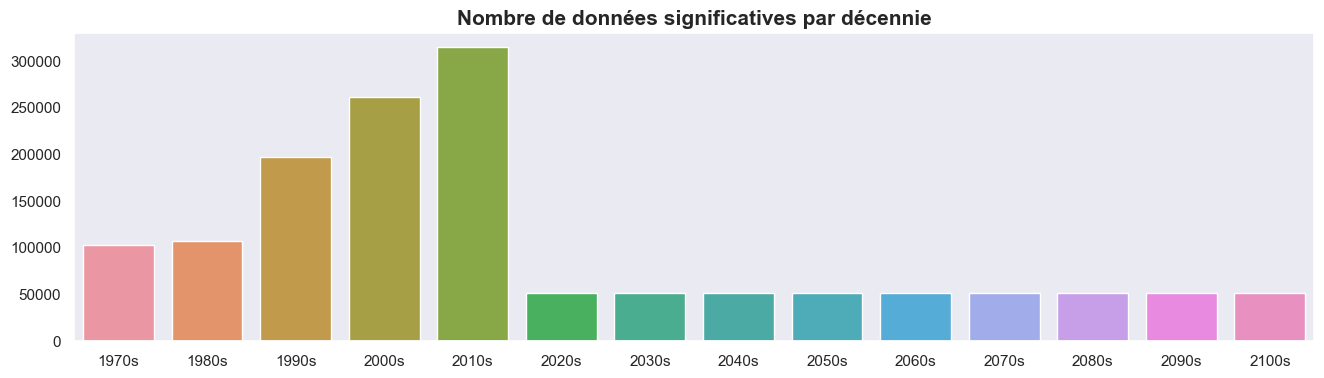

In [108]:
# Nombre total de données - le nombre de données manquante par décénies
decennies = ['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s','2050s', '2060s', '2070s', '2080s', '2090s', '2100s']
plt.figure(figsize=(16, 4))
plt.title('Nombre de données significatives par décennie', size=15,fontweight='bold')
sns.set_style('whitegrid')
sns.barplot(y = df_decennies.shape[0]-df_decennies[decennies].isna().sum().values, x = df_decennies[decennies].isna().sum().index)
plt.savefig("assets/graphiques/EDA_11_Répartition du nombre de données.jpg", bbox_inches='tight')


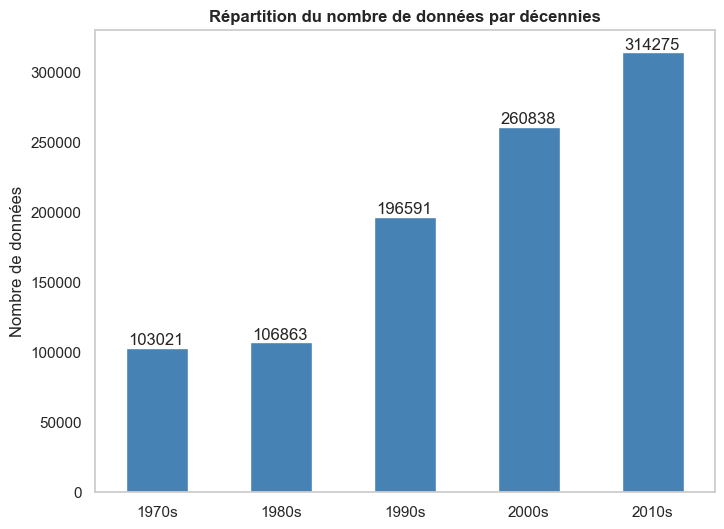

In [109]:
plt.figure(figsize=(8, 6))
donnees = df_decennies.loc[:,'1970s':'2010s'].notnull().sum()
ax1 = donnees.plot(kind='bar', color='SteelBlue')
ax1.set_title('Répartition du nombre de données par décennies',weight='bold')
ax1.set_ylabel('Nombre de données')
plt.xticks(rotation = 0)
for i in range(5):
    plt.text(i-0.23,donnees[i]+2000, round(donnees[i],1)) # on place en fonction des coordonnées
ax1.grid(False)
plt.savefig("assets/graphiques/EDA_12_Répartition du nombre de données par decennies.jpg", bbox_inches='tight')
plt.show()

In [110]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69', '1970s', '1980s', '1990s', '2000s',
       '2010s', '2020s', '2030s', '2040s', '2050s', '2060s', '2070s', '2080s',
       '2090s', '2100s'],
      dtype='object')

In [111]:
# On fait une jointure de country et data
data = data.merge(right=country[['Country Code','Region','Income Group']], 
                  on='Country Code',
                  how='left')

In [112]:
# data.drop(['Unnamed: 69'], axis=1, inplace=True)

In [113]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69', '1970s', '1980s', '1990s', '2000s',
       '2010s', '2020s', '2030s', '2040s', '2050s', '2060s', '2070s', '2080s',
       '2090s', '2100s', 'Region', 'Income Group'],
      dtype='object')

#### Repartition des données par région pour la décénnie 2010s

In [114]:
# Repartition des données par région pour la décénnie 2010s
target_decade = ['2010','2011','2012','2013','2014','2015','2016','2017']
data.groupby('Region')[target_decade].count().sum(axis=1).sort_values().reset_index()

Region       0
0               North America   11386
1                  South Asia   36446
2  Middle East & North Africa   95397
3         East Asia & Pacific  118810
4   Latin America & Caribbean  157163
5          Sub-Saharan Africa  205030
6       Europe & Central Asia  263389

#### Decennie selectionnée 2010s

In [115]:
# Taux de remplissage
nb_tt = data.shape[0]
nb_nonnull=data.copy()[target_decade].count()
# Taux de données non nulle par année pour 2010s
df_2010s = pd.DataFrame({'annees':nb_nonnull.index, 'nb_nonnull':nb_nonnull.values})
# % donnee null par 
df_2010s['%_nonnull']=round((df_2010s['nb_nonnull'])*100/nb_tt,2)
# Nb nan pour les années cibles
df_2010s['%_NaN']=round(100-df_2010s['%_nonnull'],2)

In [116]:
# Definir les années comme index 
df_2010s = df_2010s.set_index('annees')

In [117]:
df_2010s 

nb_nonnull  %_nonnull  %_NaN
annees                              
2010        242442      27.33  72.67
2011        146012      16.46  83.54
2012        147264      16.60  83.40
2013        137509      15.50  84.50
2014        113789      12.83  87.17
2015        131058      14.78  85.22
2016         16460       1.86  98.14
2017           143       0.02  99.98

#### Taux de remplissage années 2010-2017

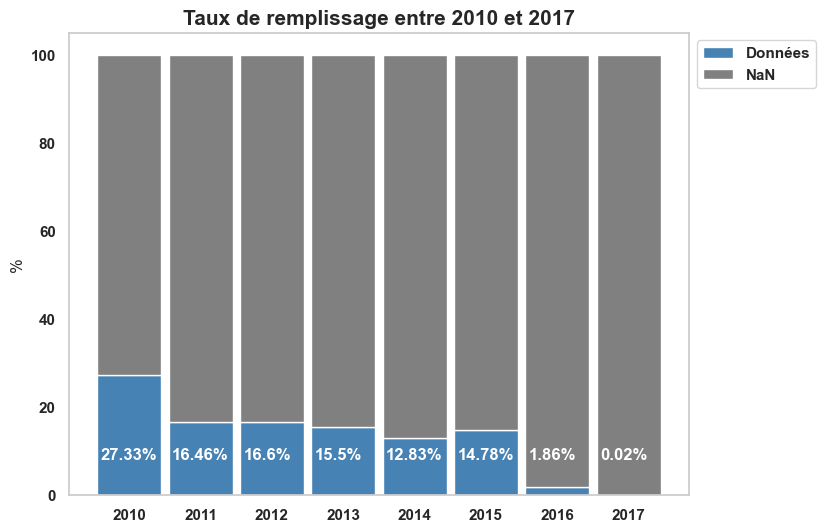

In [118]:
# Graphique Taux de remplissage
from matplotlib import rc
plt.figure(figsize=(8, 6))
rc('font', weight='bold')
barWidth = 0.9
annees = ['2010','2011','2012','2013','2014','2015','2016','2017']
taux_remplissage=df_2010s['%_nonnull']
taux_NaN=df_2010s['%_NaN']
plt.bar(annees, taux_remplissage, barWidth, label='Données', color='steelblue')
plt.bar(annees, taux_NaN, barWidth, bottom=taux_remplissage, label='NaN', color='gray')

plt.ylabel('%')
names = ['2010','2011','2012','2013','2014','2015','2016','2017']
r = [0,1,2,3,4,5,6,7]
plt.xticks(r, names, fontweight='bold')
plt.title('Taux de remplissage entre 2010 et 2017',fontweight='bold',size=15)
plt.legend(bbox_to_anchor=(1, 1),loc = 2)

for i, var in enumerate(df_2010s['%_nonnull']):
    plt.text(i-0.4,8,str(var)+"%",color='white',fontweight='bold')
plt.grid(False)
plt.savefig("assets/graphiques/EDA_13_Taux de remplissage 2010-2017.jpg", bbox_inches='tight')
plt.show()

## Bilan du dataset

***
<span style="font-size:16px">**Bilan de : `EdStatsData.csv`**: </span>
***
Les données chargées à partir du site worldbank.org permettent  d'obtenir un historique d'indicateurs propres à notre problématique métier l'éducation selon les pays, l'économie, la démographie, la richesse, la disponibilité technologique, variables qui permettent de répondre aux problématiques de l'entreprise 
- 5 jeux de données
- Observations à forte granularité géographique : pays et groupement par zones
- Variables disponibles sur notre contexte métier de l'éducation
- Historique des données à partir de 1970, mais sans grande utilité causée par les valeurs manquantes
- 2000 à 2015 sont des années recommandées pour le traitement des objectifs attendus
- Nombre de lignes : 886930 lignes
- Nombre de colonnes : 70 colonnes
- Nombre d'éléments dupliqués dans le dataframe : 0 eléments
- Nombre total de données manquantes dans le dataframe : 53455179 données manquantes sur 62085100 (86.1%)
- Les colonnes Indicator Code, Indicator Name, Country Code, Country Name sont complètes
- Certaines zones et indicateurs ne sont pas présents dans data car sont dans EdStatsCountry.csv
- 1970 à 2020 : augmentation du nombre de données
- A partir des années 2020 on a peu de données


**Détails d'analyse de notre jeux de données :**

**`EdStatsCountry.csv`**
- contient des informations globales sur l'économie de chaque pays du monde 
- 241 observations
- 32 variables
- 2354 valeurs manquantes dont une variable obsolète à supprimer "Unnamed: 31"
- 0 doublon

Notions exploitables pour notre analyse
- Notion de 'Région': groupement des pays en 6 zones géographiques
- Notions démographiques
- Devise monétaire

--- 
**`EdStatsCountry-Series.csv`**
- contient la source des données des informations contenues dans EdStatsCountry.csv
- 613 observations
- 4 variables (dont une à supprimer "Unnamed: 3")
- 0 valeur manquante
- 0 doublon

--- 
**`EdStatsData.csv`**
- Informations sur l'évolution de nombreux indicateurs pour chaque pays du Monde.
- 886930 observations
- 3665 indicateurs
- 70 variables (principalement des années de 1970 à 2050)
- 1 variable obsolète à supprimer 'Unnamed: 69'
- Valeurs manquantes en grande quantité sur l'ensemble du couple pays/années
- 2000 à 2010 (voir 2015) années les moins impactées par les valeurs manquantes
- 0 doublon

Malgré les valeurs manquantes, ce jeu de données est essentiel dans notre analyse pour répondre aux problématiques. 

---
**`EdStatsSeries.csv`**
- données descriptives sur les indicateurs socio économiques disponibles dans data
- 3665 observations
- 21 variables (dont une variable obsolète à supprimer 'Unnamed: 20')
- Valeurs manquantes en grande quantité
- 0 doublon

--- 
**`EdStatsFootNote.csv`**
- informations sur année d'origine des données et description des données.
- 643638 observations
- 5 variables (dont une variable obsolète à supprimer : 'Unnamed: 4')
- 0 valeurs manquantes (sans tenir compte de 'Unnamed: 4')
- 0 doublon

Les années 2000 à 2015 apparaissent comme les années qui sont à la fois les dernières valeurs exploitables et les mieux renseignées.

# PARTIE 2 : PREPROCESSING

## Sélectionner les indicateurs pertinents

### NA : Taux de remplissage par indicateur

In [119]:
df_taux_indicateurs = data.copy()
annees =['2010','2011','2012','2013','2014','2015']
df_taux_indicateurs=df_taux_indicateurs[~df_taux_indicateurs['Country Code'].isin(liste_zones_et_income)]

In [120]:
# Compter le nombre d'indicateur présents par années
df_taux_indicateurs = df_taux_indicateurs.groupby('Indicator Code')[annees].count()

In [121]:
df_taux_indicateurs['nb_indicateur']=df_taux_indicateurs[annees].sum(axis=1)

In [122]:
df_taux_indicateurs['%'] = (df_taux_indicateurs['nb_indicateur']/(data['Country Name'].nunique()*len(annees)))*100
df_taux_indicateurs.head()

2010  2011  2012  2013  2014  2015  nb_indicateur  \
Indicator Code                                                           
BAR.NOED.1519.FE.ZS   144     0     0     0     0     0            144   
BAR.NOED.1519.ZS      144     0     0     0     0     0            144   
BAR.NOED.15UP.FE.ZS   144     0     0     0     0     0            144   
BAR.NOED.15UP.ZS      144     0     0     0     0     0            144   
BAR.NOED.2024.FE.ZS   144     0     0     0     0     0            144   

                            %  
Indicator Code                 
BAR.NOED.1519.FE.ZS  9.917355  
BAR.NOED.1519.ZS     9.917355  
BAR.NOED.15UP.FE.ZS  9.917355  
BAR.NOED.15UP.ZS     9.917355  
BAR.NOED.2024.FE.ZS  9.917355

In [123]:
# On crée une colonne total = nombre d'indicateur pour tous les pays par indicateur
# df_taux_indicateurs.sort_values(by ='%',ascending=False)

In [124]:
print(f"Nombre de Country Name : {data['Country Name'].nunique()}")
print(f"Nombre d'années : {len(annees)}")

Nombre de Country Name : 242
Nombre d'années : 6


In [125]:
df_taux_indicateurs[['nb_indicateur','%']].describe().T

count        mean         std  min        25%         50%  \
nb_indicateur  3665.0  237.404366  302.391383  0.0  15.000000  135.000000   
%              3665.0   16.350163   20.825853  0.0   1.033058    9.297521   

                      75%          max  
nb_indicateur  332.000000  1262.000000  
%               22.865014    86.914601

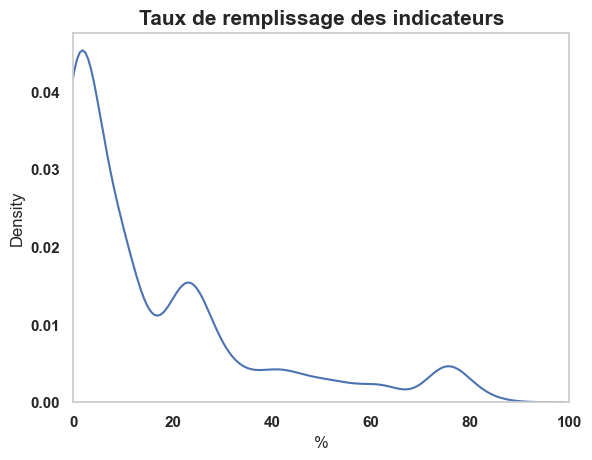

In [126]:
# Taux de remplissage
sns.kdeplot(data=df_taux_indicateurs, x="%")
plt.grid(False)
plt.xlim([0,100])
plt.title('Taux de remplissage des indicateurs',weight='bold',size=15)
plt.savefig("assets/graphiques/PREPROCESSING_1_Taux de remplissage des indicateurs.jpg", bbox_inches='tight')
plt.show()

In [127]:
# On garde tous les indicateur >50 % ==> Seuil = 50%
df_indicateurs_reduit = df_taux_indicateurs[df_taux_indicateurs['%']>80]
df_indicateurs_reduit['Indicator Code'] = df_indicateurs_reduit.index
print(f"Nombre d'indicateurs restants : {df_indicateurs_reduit.shape[0]}")

Nombre d'indicateurs restants : 16


In [128]:
df_indicateurs_reduit

2010  2011  2012  2013  2014  2015  nb_indicateur  \
Indicator Code                                                         
IT.NET.USER.P2      202   204   202   201   201   201           1211   
NY.GDP.MKTP.CD      202   202   198   199   197   196           1194   
NY.GDP.MKTP.KD      202   198   196   196   194   193           1179   
NY.GDP.PCAP.CD      202   202   198   199   197   196           1194   
NY.GDP.PCAP.KD      202   198   196   196   194   193           1179   
SE.PRM.AGES         203   203   203   203   203   203           1218   
SE.PRM.DURS         203   203   203   203   203   203           1218   
SE.SEC.AGES         200   199   199   200   200   200           1198   
SE.SEC.DURS         200   199   199   200   200   200           1198   
SE.SEC.DURS.LO      200   199   199   200   200   200           1198   
SE.SEC.DURS.UP      200   199   199   200   200   200           1198   
SP.POP.GROW         211   210   210   210   210   210           1261   
SP.POP.TOTL         211   211   210   210   210   210           1262   
UIS.THAGE.0         200   200   200   200   198   198           1196   
UIS.THAGE.3.A.GPV   200   199   199   200   199   198           1195   
UIS.THDUR.0         200   200   200   200   200   200           1200   

                           %     Indicator Code  
Indicator Code                                   
IT.NET.USER.P2     83.402204     IT.NET.USER.P2  
NY.GDP.MKTP.CD     82.231405     NY.GDP.MKTP.CD  
NY.GDP.MKTP.KD     81.198347     NY.GDP.MKTP.KD  
NY.GDP.PCAP.CD     82.231405     NY.GDP.PCAP.CD  
NY.GDP.PCAP.KD     81.198347     NY.GDP.PCAP.KD  
SE.PRM.AGES        83.884298        SE.PRM.AGES  
SE.PRM.DURS        83.884298        SE.PRM.DURS  
SE.SEC.AGES        82.506887        SE.SEC.AGES  
SE.SEC.DURS        82.506887        SE.SEC.DURS  
SE.SEC.DURS.LO     82.506887     SE.SEC.DURS.LO  
SE.SEC.DURS.UP     82.506887     SE.SEC.DURS.UP  
SP.POP.GROW        86.845730        SP.POP.GROW  
SP.POP.TOTL        86.914601        SP.POP.TOTL  
UIS.THAGE.0        82.369146        UIS.THAGE.0  
UIS.THAGE.3.A.GPV  82.300275  UIS.THAGE.3.A.GPV  
UIS.THDUR.0        82.644628        UIS.THDUR.0

### Recherche des indicateurs pertinents par mots clés

***
- après recherche sur :https://datatopics.worldbank.org/education/indicators
- Explication des code : https://dimension.usherbrooke.ca/pages/35

On recherche des indicateurs pour 4 critères d'analyse : 
- **Population** : Population 15-24 ans : Correspond au code SE : recherche mots clés : 15-24
- **Infrastructure** : Correspond au code IT : recherche mots clés : IT
- **Economie** : Correspond au code NY : recherche mots clés : NY 
- **Education** : Correspond au code SP : recherche mots clés : SEC, TER### Recherche des indicateurs
***

In [129]:
# Création d'un dataframe de recherche
df_search = serie[['Series Code', 'Indicator Name','Topic','Long definition']]

In [130]:
# Target 15-24 ans
liste_1524 = []
for x in df_search['Series Code']:
    if "1524" in x:
        liste_1524.append(x)
df_1524 = df_search[df_search['Series Code'].isin(liste_1524)][['Series Code','Indicator Name','Topic','Long definition']]    
# On affiche la selection
pd.set_option('max_colwidth', None)
df_1524

Series Code  \
2209  SE.ADT.1524.LT.FE.ZS   
2210  SE.ADT.1524.LT.FM.ZS   
2211  SE.ADT.1524.LT.MA.ZS   
2212     SE.ADT.1524.LT.ZS   
2504     SP.POP.1524.FE.UN   
2505     SP.POP.1524.MA.UN   
2506     SP.POP.1524.TO.UN   

                                                              Indicator Name  \
2209                 Youth literacy rate, population 15-24 years, female (%)   
2210  Youth literacy rate, population 15-24 years, gender parity index (GPI)   
2211                   Youth literacy rate, population 15-24 years, male (%)   
2212             Youth literacy rate, population 15-24 years, both sexes (%)   
2504                                          Population, ages 15-24, female   
2505                                            Population, ages 15-24, male   
2506                                           Population, ages 15-24, total   

           Topic  \
2209    Literacy   
2210    Literacy   
2211    Literacy   
2212    Literacy   
2504  Population   
2505  Population   
2506  Population   

                                                                                                                                                                                                                                                                                                                                                                                                                                     Long definition  
2209  Number of females age 15 to 24 years who can both read and write with understanding a short simple statement on their everyday life, divided by the female population in that age group. Generally, ‘literacy’ also encompasses ‘numeracy’, the ability to make simple arithmetic calculations. Divide the number of people aged 15 to 24 years who are literate by the total population in the same age group and multiply the result by 100.  
2210                                                                    Ratio of female youth literacy rate to male youth literacy rate. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females.  
2211      Number of males age 15 to 24 years who can both read and write with understanding a short simple statement on their everyday life, divided by the male population in that age group. Generally, ‘literacy’ also encompasses ‘numeracy’, the ability to make simple arithmetic calculations. Divide the number of people aged 15 to 24 years who are literate by the total population in the same age group and multiply the result by 100.  
2212          Number of people age 15 to 24 years who can both read and write with understanding a short simple statement on their everyday life, divided by the population in that age group. Generally, ‘literacy’ also encompasses ‘numeracy’, the ability to make simple arithmetic calculations. Divide the number of people aged 15 to 24 years who are literate by the total population in the same age group and multiply the result by 100.  
2504                                                                                                                                                                                                                                                                                                                                                                        Population, ages 15-24, female is the total number of females age 15-24.  
2505                                                                                                                                                                                                                                                                                                                                              

Indicateur retenu : Population 15-20 ans : **SP.POP.1524.TO.UN** : Population, ages 15-24, total is the total population age 15-24.

In [131]:
# Target : Infrastructure Comprehensive list
liste_IT = [x for x in df_search["Long definition"] if "Internet" in x]

df_IT = df_search[df_search['Long definition'].isin(liste_IT)][['Series Code','Indicator Name','Topic','Long definition']]   
# On affiche la selection
pd.set_option('max_colwidth', None)
df_IT

Series Code                   Indicator Name  \
611  IT.NET.USER.P2  Internet users (per 100 people)   

                              Topic  \
611  Infrastructure: Communications   

                                                                                                                                                                                                           Long definition  
611  Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.

Indicateur retenu : Intenet User : **IT.NET.USER.P2** : Internet users are individuals who have used the Internet

In [132]:
# Target : Economie Comprehensive list
# first filter NY = incomplet ==> NY.GNP 
liste_ECO = [x for x in df_search["Series Code"] if ("NY.GNP") in x]

df_ECO = df_search[df_search['Series Code'].isin(liste_ECO)][['Series Code','Indicator Name','Topic','Long definition']]   
# On affiche la selection
pd.set_option('max_colwidth', None)
df_ECO

Series Code                                 Indicator Name  \
1666     NY.GNP.MKTP.CD                              GNI (current US$)   
1667  NY.GNP.MKTP.PP.CD             GNI, PPP (current international $)   
1668     NY.GNP.PCAP.CD     GNI per capita, Atlas method (current US$)   
1669  NY.GNP.PCAP.PP.CD  GNI per capita, PPP (current international $)   

                                                                                       Topic  \
1666  Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators   
1667                                         Economic Policy & Debt: Purchasing power parity   
1668                   Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita   
1669                                         Economic Policy & Debt: Purchasing power parity   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Long definition  
1666                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              GNI (formerly GNP) is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. Data are in current U.S. dollars.  
1667                                                                                                                                                                                                                                                                                                                                                               PPP GNI (formerly PPP GNP) is gross national income (GNI) converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GNI as a U.S. dollar has in the United States. Gross national income is the sum of value added by all resident producers plus any product taxes (less subsid

Indicateur retenu :  ECO : **NY.GNP.PCAP.PP.CD** : GNI per capita based on purchasing power parity (PPP).

In [133]:
# Target : Etudiant engagés post Bac
# Deuxième filtre filtre
liste_Secondaire = [ x for x in df_search['Series Code'] if ("SEC.ENRL") in x]
        
df_Secondaire = df_search[df_search['Series Code'].isin(liste_Secondaire)][['Series Code','Indicator Name','Topic','Long definition']]   
# On affiche la selection
pd.set_option('max_colwidth', None)
df_Secondaire

Series Code  \
2294           SE.SEC.ENRL   
2295        SE.SEC.ENRL.FE   
2296  SE.SEC.ENRL.FE.VO.ZS   
2297     SE.SEC.ENRL.FE.ZS   
2298        SE.SEC.ENRL.GC   
2299     SE.SEC.ENRL.GC.FE   
2300  SE.SEC.ENRL.GC.FE.ZS   
2301  SE.SEC.ENRL.MA.VO.ZS   
2302     SE.SEC.ENRL.TC.ZS   
2303        SE.SEC.ENRL.VO   
2304     SE.SEC.ENRL.VO.FE   
2305  SE.SEC.ENRL.VO.FE.ZS   
2306     SE.SEC.ENRL.VO.ZS   

                                                                                          Indicator Name  \
2294                                               Enrolment in secondary education, both sexes (number)   
2295                                                   Enrolment in secondary education, female (number)   
2296  Percentage of female students in secondary education enrolled in vocational programmes, female (%)   
2297                                    Percentage of students in secondary education who are female (%)   
2298                                                 Enrolment in secondary general, both sexes (number)   
2299                                                     Enrolment in secondary general, female (number)   
2300                            Percentage of students in secondary general education who are female (%)   
2301      Percentage of male students in secondary education enrolled in vocational programmes, male (%)   
2302                                        Pupil-teacher ratio in secondary education (headcount basis)   
2303                                              Enrolment in secondary vocational, both sexes (number)   
2304                                                  Enrolment in secondary vocational, female (number)   
2305                         Percentage of students in secondary vocational education who are female (%)   
2306     Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)   

          Topic  \
2294  Secondary   
2295  Secondary   
2296  Secondary   
2297  Secondary   
2298  Secondary   
2299  Secondary   
2300  Secondary   
2301  Secondary   
2302   Teachers   
2303  Secondary   
2304  Secondary   
2305  Secondary   
2306  Secondary   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Long definition  
2294                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Total number of students enrolled at public and private secondary education institutions regardless of age.  
2295                                                                                

In [134]:
# Target : Etudiant engagés post Bac
# Deuxième filtre filtre
liste_PostBac = [ x for x in df_search['Series Code'] if ("TER.ENR") in x]
        
df_PostBac = df_search[df_search['Series Code'].isin(liste_PostBac)][['Series Code','Indicator Name','Topic','Long definition']]   
# On affiche la selection
pd.set_option('max_colwidth', None)
df_PostBac

Series Code  \
2332        SE.TER.ENRL   
2333     SE.TER.ENRL.FE   
2334  SE.TER.ENRL.FE.ZS   
2335        SE.TER.ENRR   
2336     SE.TER.ENRR.FE   
2337     SE.TER.ENRR.MA   

                                                            Indicator Name  \
2332  Enrolment in tertiary education, all programmes, both sexes (number)   
2333      Enrolment in tertiary education, all programmes, female (number)   
2334       Percentage of students in tertiary education who are female (%)   
2335                       Gross enrolment ratio, tertiary, both sexes (%)   
2336                           Gross enrolment ratio, tertiary, female (%)   
2337                             Gross enrolment ratio, tertiary, male (%)   

         Topic  \
2332  Tertiary   
2333  Tertiary   
2334  Tertiary   
2335  Tertiary   
2336  Tertiary   
2337  Tertiary   

                                                                                                                                                                                                                  Long definition  
2332                                                                                                                                 The total number of students enrolled at public and private tertiary education institutions.  
2333                                                                                                                          The total number of female students enrolled at public and private tertiary education institutions.  
2334  Number of female students at the tertiary education level (ISCED 5 to 8) expressed as a percentage of the total number of students (male and female) at the tertiary education level (ISCED 5 to 8) in a given school year.  
2335                           Total enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total population of the five-year age group following on from secondary school leaving.  
2336             Total female enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total female population of the five-year age group following on from secondary school leaving.  
2337                 Total male enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total male population of the five-year age group following on from secondary school leaving.

## NA par variable retenue

In [135]:
# Taux de remplissage sur 2010-2015
indicateurs_retenus=['SP.POP.1524.TO.UN', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'IT.NET.USER.P2', 'NY.GNP.PCAP.PP.CD']
mask=df_indicateurs_reduit['Indicator Code'].isin(indicateurs_retenus)
cols=['Indicator Code','%']
df_indicateurs_reduit[mask][cols]

Indicator Code          %
Indicator Code                           
IT.NET.USER.P2  IT.NET.USER.P2  83.402204

### Indicateurs retenus : 
- Population 15-20 ans : **SP.POP.1524.TO.UN** : Population, ages 15-24, total is the total population age 15-24.
- Internet User : **IT.NET.USER.P2** : Internet users are individuals who have used the Internet.
- ECO : **NY.GNP.PCAP.PP.CD** : GNI per capita based on purchasing power parity (PPP).
- Education : 
    - SE.SEC.ENRR : Total number of students enrolled at public and private secondary education institutions regardless of age.
    - SE.TER.ENRR : The total number of students enrolled at public and private tertiary education institutions.

In [136]:
indicateurs_retenus=['IT.NET.USER.P2', 'NY.GNP.PCAP.PP.CD','SP.POP.1524.TO.UN', 'SE.SEC.ENRR', 'SE.TER.ENRR']

## Préparation données

In [137]:
# On travail sur df
df = data
col = df.columns

In [138]:
# On supprime tout ce qui n'est pas pays et les pays na
print(liste_zones_et_income)

['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC', 'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'MIC', 'NAC', 'OED', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD', 'VGB', 'CUW', 'NRU', 'SXM', 'SSD', 'MAF']


In [139]:
df.shape

(886930, 86)

In [140]:
df = df[~df['Country Code'].isin(liste_zones_et_income)][col]
df.shape

(773315, 86)

In [141]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69', '1970s', '1980s', '1990s', '2000s',
       '2010s', '2020s', '2030s', '2040s', '2050s', '2060s', '2070s', '2080s',
       '2090s', '2100s', 'Region', 'Income Group'],
      dtype='object')

In [142]:
# On réduit le df aux colonnes et dates (2000-2015) qui nous concernent
df = df.loc[:,[ 'Country Name', 'Country Code','Region', 'Indicator Name','Indicator Code','Income Group','2010', '2011','2012', '2013', '2014', '2015']]
df.shape

(773315, 12)

In [143]:
col = df.columns
print(col)

Index(['Country Name', 'Country Code', 'Region', 'Indicator Name',
       'Indicator Code', 'Income Group', '2010', '2011', '2012', '2013',
       '2014', '2015'],
      dtype='object')


In [144]:
# On supprime les indicateurs inutiles
df = df[df['Indicator Code'].isin(indicateurs_retenus)][col]   
df.shape

(1055, 12)

<AxesSubplot: >

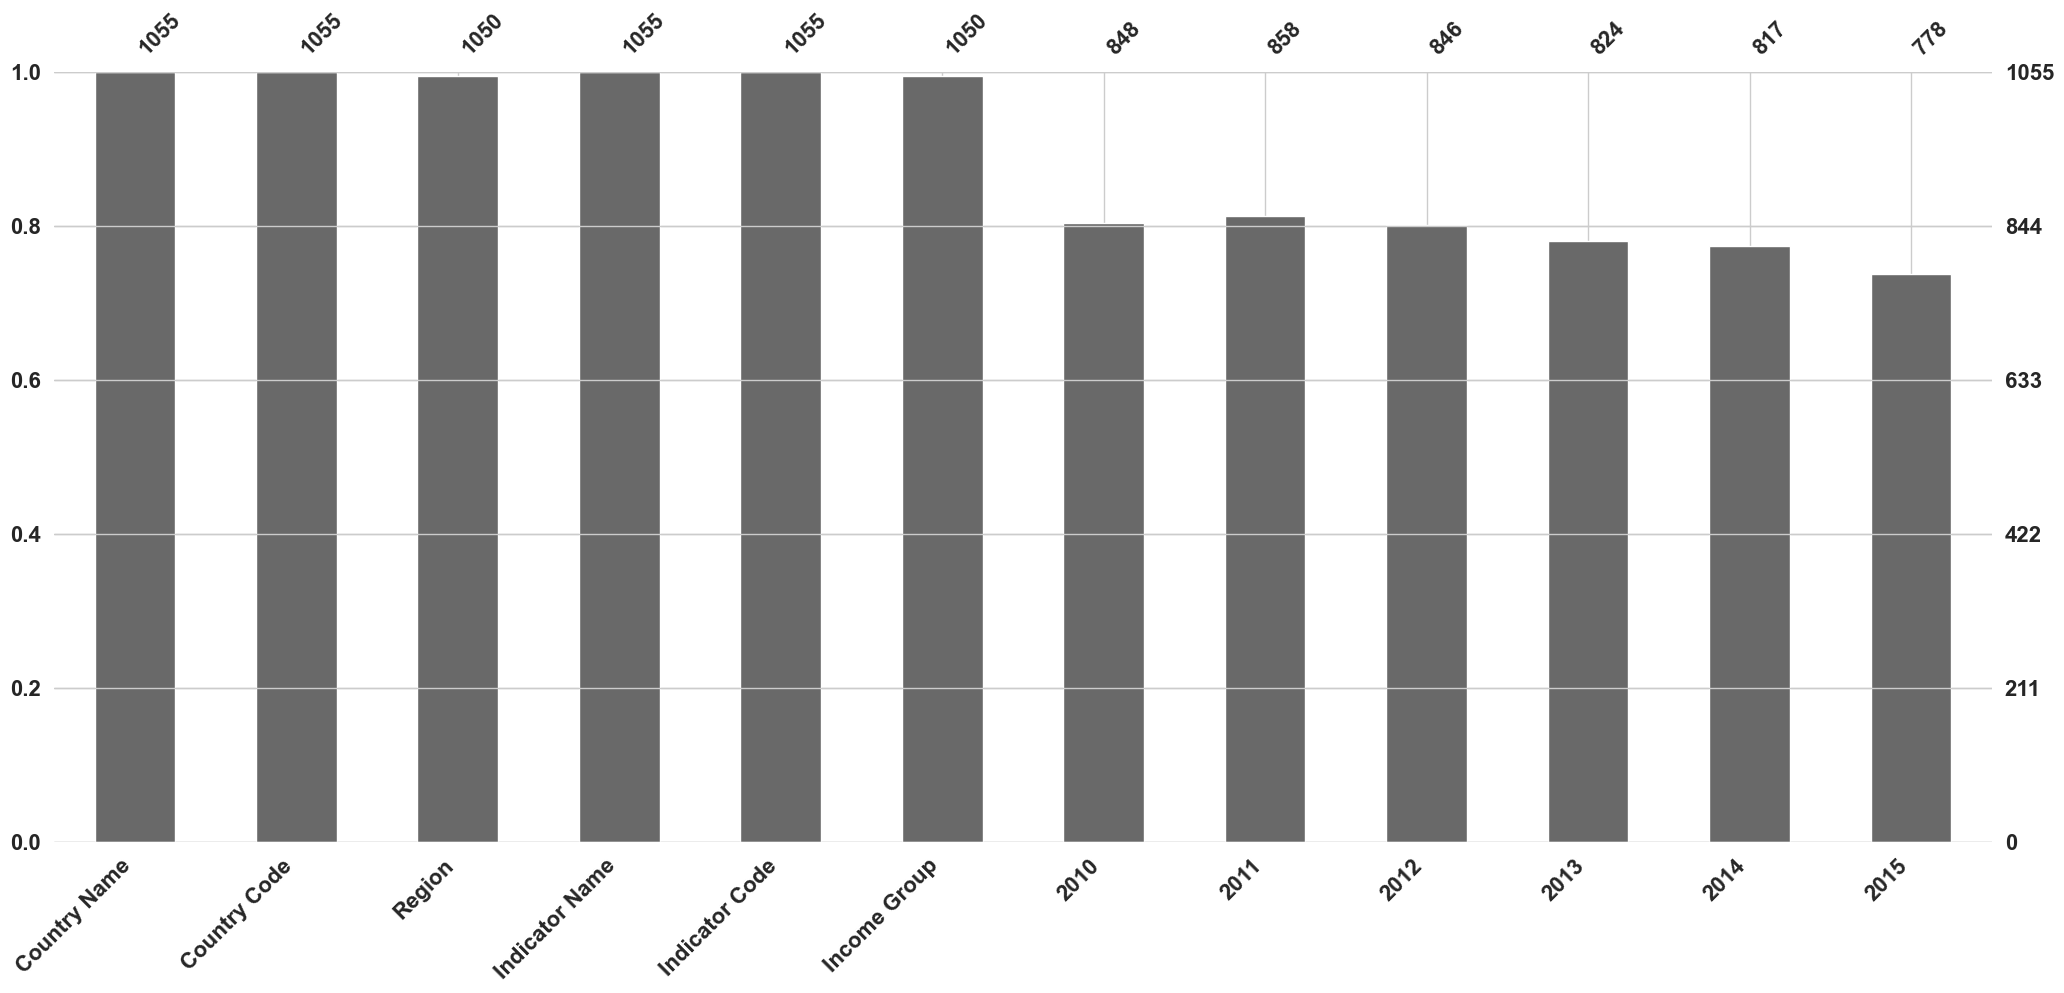

In [145]:
msno.bar(df)

### Données disponible pour nos indicateurs

In [146]:
df[df['Indicator Code'].isin(indicateurs_retenus)][col].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='Indicator Name',ascending=False)

Indicator Name     Indicator Code  \
4                     Population, ages 15-24, total  SP.POP.1524.TO.UN   
3                   Internet users (per 100 people)     IT.NET.USER.P2   
2   Gross enrolment ratio, tertiary, both sexes (%)        SE.TER.ENRR   
1  Gross enrolment ratio, secondary, both sexes (%)        SE.SEC.ENRR   
0     GNI per capita, PPP (current international $)  NY.GNP.PCAP.PP.CD   

   Country Name  Country Code  Region  Income Group  2010  2011  2012  2013  \
4           211           211     210           210   181   181   181   181   
3           211           211     210           210   202   204   202   201   
2           211           211     210           210   133   138   136   124   
1           211           211     210           210   145   148   142   133   
0           211           211     210           210   187   187   185   185   

   2014  2015  
4   181   181  
3   201   201  
2   119    99  
1   133   116  
0   183   181

In [147]:
df.isnull().mean()*100

Country Name       0.000000
Country Code       0.000000
Region             0.473934
Indicator Name     0.000000
Indicator Code     0.000000
Income Group       0.473934
2010              19.620853
2011              18.672986
2012              19.810427
2013              21.895735
2014              22.559242
2015              26.255924
dtype: float64

2015 est notre colone de base, on voit les na concernant cette année

### Gestion des NA

#### Identification et estimation des pays pour lesquels on a aucune donnée

In [148]:
# Df des lignes qui ont toutes des données manquantes tous les ans
df_noData = df.loc[(df['2010'].isnull()) & (df['2011'].isnull()) & (df['2012'].isnull()) & (df['2013'].isnull()) & (df['2014'].isnull()) & (df['2015'].isnull())]

In [149]:
pd.set_option('display.max_rows', None)
# On visualise les pays et les indicateurs concernés par le manque total de données
df_noData.loc[:,['Country Name','Country Code','Indicator Name']]

Country Name Country Code  \
103872                  American Samoa          ASM   
103955                  American Samoa          ASM   
103959                  American Samoa          ASM   
103995                  American Samoa          ASM   
105102                  American Samoa          ASM   
107537                         Andorra          AND   
107620                         Andorra          AND   
107624                         Andorra          AND   
108767                         Andorra          AND   
116097             Antigua and Barbuda          ATG   
125862                           Aruba          ABW   
136940                      Azerbaijan          AZE   
140609                    Bahamas, The          BHS   
171072                         Bermuda          BMU   
177259                         Bolivia          BOL   
180920          Bosnia and Herzegovina          BIH   
180924          Bosnia and Herzegovina          BIH   
184585                        Botswana          BWA   
213905                        Cambodia          KHM   
221239                          Canada          CAN   
224817                  Cayman Islands          CYM   
224900                  Cayman Islands          CYM   
224904                  Cayman Islands          CYM   
226047                  Cayman Islands          CYM   
235812                 Channel Islands          CHI   
235895                 Channel Islands          CHI   
235899                 Channel Islands          CHI   
235935                 Channel Islands          CHI   
237042                 Channel Islands          CHI   
272462                            Cuba          CUB   
290787                        Djibouti          DJI   
294539                        Dominica          DMA   
295682                        Dominica          DMA   
312860               Equatorial Guinea          GNQ   
312864               Equatorial Guinea          GNQ   
327437                   Faroe Islands          FRO   
327520                   Faroe Islands          FRO   
327524                   Faroe Islands          FRO   
328667                   Faroe Islands          FRO   
331189                            Fiji          FJI   
342097                French Polynesia          PYF   
342180                French Polynesia          PYF   
342184                French Polynesia          PYF   
343327                French Polynesia          PYF   
345845                           Gabon          GAB   
345849                           Gabon          GAB   
364087                       Gibraltar          GIB   
364170                       Gibraltar          GIB   
364174                       Gibraltar          GIB   
365317                       Gibraltar          GIB   
371417                       Greenland          GRL   
371500                       Greenland          GRL   
371504                       Greenland          GRL   
372647                       Greenland          GRL   
378747                            Guam          GUM   
378830                            Guam          GUM   
378834                            Guam          GUM   
379977                            Guam          GUM   
389825                   Guinea-Bissau          GNB   
389829                   Guinea-Bissau          GNB   
397155                           Haiti          HTI   
397159                           Haiti          HTI   
426475                            Iraq          IRQ   
426479                            Iraq          IRQ   
433722                     Isle of Man          IMN   
433805                     Isle of Man          IMN   
433809                     Isle of Man          IMN   
433845                     Isle of Man          IMN   
434952                     Isle of Man          IMN   
459460                           Kenya          KEN   
459464                           Kenya          KEN   
463125                        Kiribati          KIR   
463129     

- Ce sont essentiellement des petits pays et des subdivisions de pays : 
- le Canada ou Singapour pour lequels il nous manque un indicateur important sur toutes les années pour la suite de notre étude ==> on supprime ces codes country du dataframe
- Des pays de petite taille donc avec une population insuffisante : comme Palau (Palaos = 18 174 habitant en 2022) ou Tuvalu 11 925 (2021)

In [150]:
# faire la liste des codes pays a supprimer
liste_noData = df_noData['Country Code'].unique()
liste_noData

array(['ASM', 'AND', 'ATG', 'ABW', 'AZE', 'BHS', 'BMU', 'BOL', 'BIH',
       'BWA', 'KHM', 'CAN', 'CYM', 'CHI', 'CUB', 'DJI', 'DMA', 'GNQ',
       'FRO', 'FJI', 'PYF', 'GAB', 'GIB', 'GRL', 'GUM', 'GNB', 'HTI',
       'IRQ', 'IMN', 'KEN', 'KIR', 'PRK', 'XKX', 'LBY', 'LIE', 'MDV',
       'MHL', 'FSM', 'MCO', 'MNE', 'NAM', 'NCL', 'NIC', 'MNP', 'OMN',
       'PLW', 'PNG', 'PRI', 'WSM', 'SMR', 'SRB', 'SYC', 'SLE', 'SGP',
       'SLB', 'SOM', 'KNA', 'VCT', 'SUR', 'SYR', 'TON', 'TTO', 'TCA',
       'TUV', 'ARE', 'VUT', 'VEN', 'VNM', 'VIR', 'PSE', 'ZMB'],
      dtype=object)

In [151]:
df.shape

(1055, 12)

In [152]:
# On supprimes ces pays de notre dataframe
col = df.columns
df = df[~df['Country Code'].isin(liste_noData)][col]   
df.shape

(700, 12)

#### Récupération des dernières données

In [153]:
# On crée une nouvelle colonne last_data avec les valeurs de 2015
df['Last_data'] = df['2015']

In [154]:
df.head()

Country Name Country Code      Region  \
92877  Afghanistan          AFG  South Asia   
92960  Afghanistan          AFG  South Asia   
92964  Afghanistan          AFG  South Asia   
93000  Afghanistan          AFG  South Asia   
94107  Afghanistan          AFG  South Asia   

                                         Indicator Name     Indicator Code  \
92877     GNI per capita, PPP (current international $)  NY.GNP.PCAP.PP.CD   
92960  Gross enrolment ratio, secondary, both sexes (%)        SE.SEC.ENRR   
92964   Gross enrolment ratio, tertiary, both sexes (%)        SE.TER.ENRR   
93000                   Internet users (per 100 people)     IT.NET.USER.P2   
94107                     Population, ages 15-24, total  SP.POP.1524.TO.UN   

      Income Group          2010          2011          2012          2013  \
92877   Low income  1.590000e+03  1.680000e+03  1.900000e+03  1.900000e+03   
92960   Low income  5.324683e+01  5.461618e+01  5.667734e+01  5.668866e+01   
92964   Low income           NaN  3.755980e+00           NaN           NaN   
93000   Low income  4.000000e+00  5.000000e+00  5.454545e+00  5.900000e+00   
94107   Low income  6.090239e+06  6.330684e+06  6.569239e+06  6.803785e+06   

               2014          2015     Last_data  
92877  1.890000e+03  1.880000e+03  1.880000e+03  
92960  5.565616e+01  5.564441e+01  5.564441e+01  
92964  8.662800e+00           NaN           NaN  
93000  7.000000e+00  8.260000e+00  8.260000e+00  
94107  7.032072e+06  7.252785e+06  7.252785e+06

In [155]:
# Réindexing
df = df.reset_index()
df = df.drop('index',axis=1)
df.head()

Country Name Country Code      Region  \
0  Afghanistan          AFG  South Asia   
1  Afghanistan          AFG  South Asia   
2  Afghanistan          AFG  South Asia   
3  Afghanistan          AFG  South Asia   
4  Afghanistan          AFG  South Asia   

                                     Indicator Name     Indicator Code  \
0     GNI per capita, PPP (current international $)  NY.GNP.PCAP.PP.CD   
1  Gross enrolment ratio, secondary, both sexes (%)        SE.SEC.ENRR   
2   Gross enrolment ratio, tertiary, both sexes (%)        SE.TER.ENRR   
3                   Internet users (per 100 people)     IT.NET.USER.P2   
4                     Population, ages 15-24, total  SP.POP.1524.TO.UN   

  Income Group          2010          2011          2012          2013  \
0   Low income  1.590000e+03  1.680000e+03  1.900000e+03  1.900000e+03   
1   Low income  5.324683e+01  5.461618e+01  5.667734e+01  5.668866e+01   
2   Low income           NaN  3.755980e+00           NaN           NaN   
3   Low income  4.000000e+00  5.000000e+00  5.454545e+00  5.900000e+00   
4   Low income  6.090239e+06  6.330684e+06  6.569239e+06  6.803785e+06   

           2014          2015     Last_data  
0  1.890000e+03  1.880000e+03  1.880000e+03  
1  5.565616e+01  5.564441e+01  5.564441e+01  
2  8.662800e+00           NaN           NaN  
3  7.000000e+00  8.260000e+00  8.260000e+00  
4  7.032072e+06  7.252785e+06  7.252785e+06

#### On identifie de quelle année viennent les données 

In [156]:
#On parcours toute les lignes et on liste l'origine des données
nb_nan_LData = 0
nb_data_recup_2014 = 0
nb_data_recup_2013 = 0
nb_data_recup_2012 = 0
nb_data_recup_2011 = 0
nb_data_recup_2010 = 0

for i in range(len(df)):
    # Tester si nan  
    if(pd.isnull(df.loc[i,'Last_data'])):
        nb_nan_LData +=1
        if(pd.isnull(df.loc[i,'Last_data']))&(pd.notnull(df.loc[i,'2014'])):
            nb_data_recup_2014 +=1
        if(pd.isnull(df.loc[i,'Last_data']))&(pd.isnull(df.loc[i,'2014']))&(pd.notnull(df.loc[i,'2013'])):
            nb_data_recup_2013 +=1
        if(pd.isnull(df.loc[i,'Last_data']))&(pd.isnull(df.loc[i,'2014']))&(pd.isnull(df.loc[i,'2013']))&(pd.notnull(df.loc[i,'2012'])):
            nb_data_recup_2012 +=1
        if(pd.isnull(df.loc[i,'Last_data']))&(pd.isnull(df.loc[i,'2014']))&(pd.isnull(df.loc[i,'2013']))&(pd.isnull(df.loc[i,'2012']))&(pd.notnull(df.loc[i,'2011'])):
            nb_data_recup_2011 +=1
        if(pd.isnull(df.loc[i,'Last_data']))&(pd.isnull(df.loc[i,'2014']))&(pd.isnull(df.loc[i,'2013']))&(pd.isnull(df.loc[i,'2012']))&(pd.isnull(df.loc[i,'2011']))&(pd.notnull(df.loc[i,'2010'])):
            nb_data_recup_2010 +=1
nb_restant = nb_nan_LData - (nb_data_recup_2014 + nb_data_recup_2013  + nb_data_recup_2012 + nb_data_recup_2011 + nb_data_recup_2010)
print("Last_Data données manquantes : ",nb_nan_LData)
print("----------------------------------------------")
print("Origines des dernières données : ")
print("2014 : ",nb_data_recup_2014) 
print("2013 : ",nb_data_recup_2013)
print("2012 : ",nb_data_recup_2012)
print("2011 : ",nb_data_recup_2011)
print("2010 : ",nb_data_recup_2010)
print("restant : ",nb_restant) 


Last_Data données manquantes :  102
----------------------------------------------
Origines des dernières données : 
2014 :  55
2013 :  20
2012 :  15
2011 :  8
2010 :  4
restant :  0


#### Boucle de collecte des dernières données par pays

In [157]:

# On comble avec les dernières valeurs mais l'analyse sera biasée surtout si on fait de la prospective 
for i in range(len(df)):
    # Tester si nan  
    if(pd.isnull(df.loc[i,'Last_data'])):
        nb_nan_LData +=1
        if(pd.isnull(df.loc[i,'Last_data']))&(pd.notnull(df.loc[i,'2014'])):
            df.loc[i,'Last_data'] = df.loc[i,'2014']
            
        if(pd.isnull(df.loc[i,'Last_data']))&(pd.isnull(df.loc[i,'2014']))&(pd.notnull(df.loc[i,'2013'])):
            df.loc[i,'Last_data'] = df.loc[i,'2013']
        if(pd.isnull(df.loc[i,'Last_data']))&(pd.isnull(df.loc[i,'2014']))&(pd.isnull(df.loc[i,'2013']))&(pd.notnull(df.loc[i,'2012'])):
            df.loc[i,'Last_data'] = df.loc[i,'2012']
        if(pd.isnull(df.loc[i,'Last_data']))&(pd.isnull(df.loc[i,'2014']))&(pd.isnull(df.loc[i,'2013']))&(pd.isnull(df.loc[i,'2012']))&(pd.notnull(df.loc[i,'2011'])):
            df.loc[i,'Last_data'] = df.loc[i,'2011']
        if(pd.isnull(df.loc[i,'Last_data']))&(pd.isnull(df.loc[i,'2014']))&(pd.isnull(df.loc[i,'2013']))&(pd.isnull(df.loc[i,'2012']))&(pd.isnull(df.loc[i,'2011']))&(pd.notnull(df.loc[i,'2010'])):
            df.loc[i,'Last_data'] = df.loc[i,'2010']

In [158]:
# La colonne Last_data est complete
df.Last_data.isnull().mean()*100

0.0

## Analyse des indicateurs retenus

In [159]:
print(f"{indicateurs_retenus}")

['IT.NET.USER.P2', 'NY.GNP.PCAP.PP.CD', 'SP.POP.1524.TO.UN', 'SE.SEC.ENRR', 'SE.TER.ENRR']


### Mesures de distribution

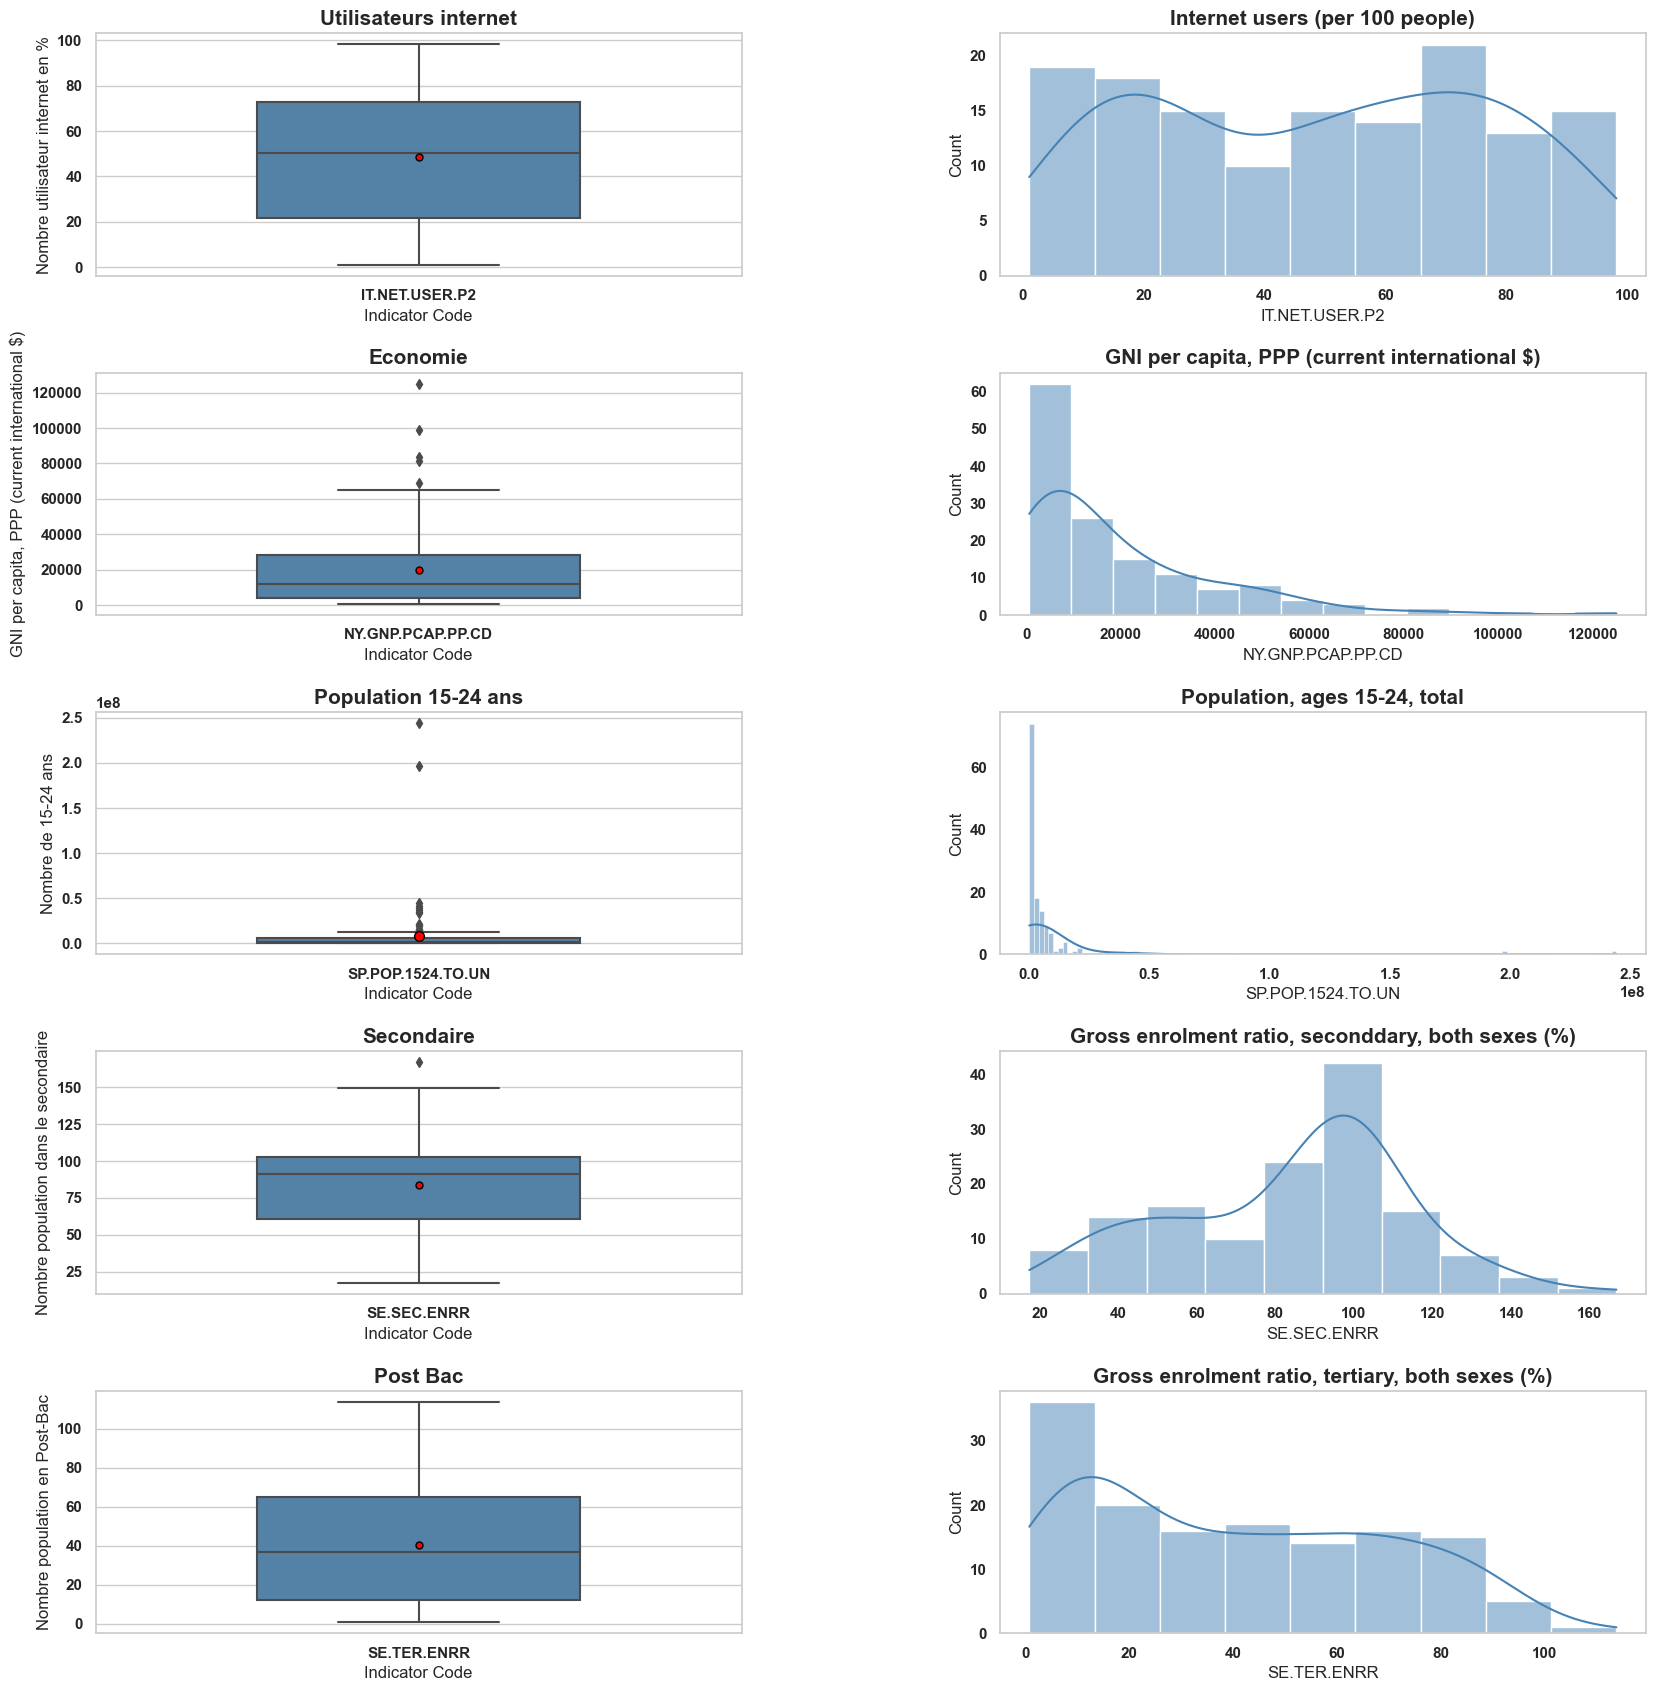

In [160]:
#On crée 1 df par indicateur
df_IT  = df[df['Indicator Code'] == 'IT.NET.USER.P2']
df_ECO = df[df['Indicator Code'] == 'NY.GNP.PCAP.PP.CD']
df_POP = df[df['Indicator Code'] == 'SP.POP.1524.TO.UN']
df_SEC = df[df['Indicator Code'] == 'SE.SEC.ENRR']
df_TER = df[df['Indicator Code'] == 'SE.TER.ENRR']
col = ['Country Name','Country Code','Region','Indicator Name','Indicator Code','Income Group','Last_data']
# On ne garde en date que last_data
df_IT  = df_IT.loc[:,col]
df_ECO = df_ECO.loc[:,col]
df_POP = df_POP.loc[:,col]
df_SEC = df_SEC.loc[:,col]
df_TER = df_TER.loc[:,col]

# Representation graphique des outliers:

fig = plt.figure(figsize=(20,20))

plt.subplot(5,2,1) # maillage des subplot
# Internet users (per 100 people)
sns.boxplot(data = df_IT, x='Indicator Code', y='Last_data',width=0.5, color='SteelBlue',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"black",
                      "markersize":"5"})
plt.title('Utilisateurs internet',fontweight='bold',size=15)
plt.ylabel('Nombre utilisateur internet en %')

plt.subplot(5,2,2)
sns.histplot(df_IT['Last_data'], kde = True, color='SteelBlue')
plt.title('Internet users (per 100 people)',fontweight='bold',size=15)
plt.xlabel('IT.NET.USER.P2')
plt.grid(False)

plt.subplot(5,2,3) # maillage des subplot
# GNI per capita, PPP (current international $)
sns.boxplot(data = df_ECO, x='Indicator Code', y='Last_data', width=0.5, color='SteelBlue',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"black",
                      "markersize":"5"})
plt.title('Economie',fontweight='bold',size=15)
plt.ylabel('GNI per capita, PPP (current international $)')

plt.subplot(5,2,4)
sns.histplot(df_ECO['Last_data'], kde = True, color='SteelBlue')
plt.title('GNI per capita, PPP (current international $)',fontweight='bold',size=15)
plt.xlabel('NY.GNP.PCAP.PP.CD')
plt.grid(False)

plt.subplot(5,2,5) # maillage des subplot
# Population, ages 15-24, total	
sns.boxplot(data = df_POP, x='Indicator Code', y='Last_data', width=0.5, color='SteelBlue',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title('Population 15-24 ans',fontweight='bold',size=15)
plt.ylabel('Nombre de 15-24 ans')

plt.subplot(5,2,6)
sns.histplot(df_POP['Last_data'], kde = True, color='SteelBlue')
plt.title('Population, ages 15-24, total',fontweight='bold',size=15)
plt.xlabel('SP.POP.1524.TO.UN')
plt.grid(False)

plt.subplot(5,2,7) # maillage des subplot
# Enrolment in secondary education, both sexes (number)	
sns.boxplot(data = df_SEC, x='Indicator Code', y='Last_data', width=0.5, color='SteelBlue',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"black",
                      "markersize":"5"})
plt.title('Secondaire',fontweight='bold',size=15)
plt.ylabel('Nombre population dans le secondaire')

plt.subplot(5,2,8)
sns.histplot(df_SEC['Last_data'], kde = True, color='SteelBlue')
plt.title('Gross enrolment ratio, seconddary, both sexes (%)',fontweight='bold',size=15)
plt.xlabel('SE.SEC.ENRR')
plt.grid(False)

plt.subplot(5,2,9) # maillage des subplot
# Enrolment in tertiary education, all programmes, both sexes (number)	
sns.boxplot(data = df_TER, x='Indicator Code', y='Last_data', width=0.5, color='SteelBlue',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"black",
                      "markersize":"5"})
plt.title('Post Bac',fontweight='bold',size=15)
plt.ylabel('Nombre population en Post-Bac')

plt.subplot(5,2,10)
sns.histplot(df_TER['Last_data'], kde = True, color='SteelBlue')
plt.title('Gross enrolment ratio, tertiary, both sexes (%)',fontweight='bold',size=15)
plt.xlabel('SE.TER.ENRR')
plt.grid(False)

plt.subplots_adjust(left=0.125, # gerer les espacements
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig("assets/graphiques/PREPROCESSING_2_Mesures distributions-1.jpg", bbox_inches='tight')
plt.show()

In [161]:
# Mesures de tendcances centrales
# Moyennes
mean_IT =df_IT['Last_data'].mean()
mean_ECO=df_ECO['Last_data'].mean()
mean_SEC=df_SEC['Last_data'].mean()
mean_TER=df_TER['Last_data'].mean()
mean_POP=df_POP['Last_data'].mean()

# Médianes
median_IT =df_IT['Last_data'].median()
median_ECO=df_ECO['Last_data'].median()
median_SEC=df_SEC['Last_data'].median()
median_TER=df_TER['Last_data'].median()
median_POP=df_POP['Last_data'].median()

# Mode 
# mode_IT =df_IT['Last_data'].mode()
# mode_ECO=df_ECO['Last_data'].mode()
# mode_SEC=df_SEC['Last_data'].mode()
# mode_TER=df_TER['Last_data'].mode()
# mode_POP=df_POP['Last_data'].mode()

# Variance
var_IT =df_IT['Last_data'].var(ddof=0)
var_ECO=df_ECO['Last_data'].var(ddof=0)
var_SEC=df_SEC['Last_data'].var(ddof=0)
var_TER=df_TER['Last_data'].var(ddof=0)
var_POP=df_POP['Last_data'].var(ddof=0)

# Ecart type
std_IT =df_IT['Last_data'].std(ddof=0)
std_ECO=df_ECO['Last_data'].std(ddof=0)
std_SEC=df_SEC['Last_data'].std(ddof=0)
std_TER=df_TER['Last_data'].std(ddof=0)
std_POP=df_POP['Last_data'].std(ddof=0)

# Les données suivent une loi normal si : skew=0 et Kurtosis =3

# skew : coefficient d'assymétrie (0 => symétrique)
skew_IT =df_IT['Last_data'].skew()
skew_ECO=df_ECO['Last_data'].skew()
skew_SEC=df_SEC['Last_data'].skew()
skew_TER=df_TER['Last_data'].skew()
skew_POP=df_POP['Last_data'].skew()

# Kortosis : coefficient d'applatissement proche de 3 suit loi normale
kurtosis_IT =df_IT['Last_data'].kurtosis()
kurtosis_ECO=df_ECO['Last_data'].kurtosis()
kurtosis_SEC=df_SEC['Last_data'].kurtosis()
kurtosis_TER=df_TER['Last_data'].kurtosis()
kurtosis_POP=df_POP['Last_data'].kurtosis()

# Visualisation des indicateurs
# On crée une liste des tendances centrales
stats = [['mean',mean_IT, mean_ECO, mean_SEC, mean_TER, mean_POP],
         ['median', median_IT, median_ECO, median_SEC,median_TER,median_POP], 
         ['var',var_IT, var_ECO, var_SEC,var_TER,var_POP], 
         ['std',std_IT, std_ECO,std_SEC, std_TER, std_POP],
         ['skew', skew_IT, skew_ECO, skew_SEC, skew_TER, skew_POP], 
         ['kurtosis', kurtosis_IT, kurtosis_ECO, kurtosis_SEC, kurtosis_TER, kurtosis_POP]]
# On crée un dataframe et des colonnes
df_stats = pd.DataFrame(stats,columns=['Statistique','IT_last_data','ECO_last_data','SEC_last_data','TER_last_data','POP_last_data'])
df_stats

Statistique  IT_last_data  ECO_last_data  SEC_last_data  TER_last_data  \
0        mean     48.462239   1.998679e+04      83.988968      40.205176   
1      median     50.219659   1.201000e+04      91.317413      36.794924   
2         var    815.902838   4.648906e+08     893.296681     831.019710   
3         std     28.564013   2.156132e+04      29.888069      28.827412   
4        skew     -0.009762   1.885302e+00      -0.250500       0.367150   
5    kurtosis     -1.305362   4.559860e+00      -0.340264      -1.114788   

   POP_last_data  
0   8.038740e+06  
1   1.703510e+06  
2   7.317407e+14  
3   2.705071e+07  
4   7.317494e+00  
5   5.761620e+01

- Le taux de scolarisation dans l'enseignement supérieur est plus inégal entre les pays que le taux de scolarisation au niveau lycée.
- Pour l'indicateur numérique, forme bimodale, on distingue des groupes qui auront un forte importace dans la selection des pays candidats
- Présence d'outliers pour les indicateurs démographique, économique et éducatif au niveau lycée à lister
- Le secondaire et le post ba depasse les 100% ==> on remet les données à 100% ou on considère que ces pays accueillent plus d'étudiants que la norme 
- Population et Economie ont des valeurs très importatnte ==> normalisation

### Mesures de tendance centrales

- Les courbes des indicateurs économiques et démographiques sont étalées à droite (skewness positif) leur variance est élevée.
- La courbe de l'indicateur éducatif du niveau lycée, étalée à gauche (skewness négatif), plus aplatie que la distribution normale (kurtosis empirique négatif).
- La courbe de l'indicateur éducatif de l'enseignement supérieur est bimodale, étalée à droite (skewness positif), plus aplatie que la distribution normale (kurtosis empirique négatif).
- La courbe de l'indicateur numérique plus aplatie que la distribution normale (kurtosis empirique négatif).
- **Les données de nos indicateurs ne suivent pas un forme normale en raison de la disparités des pays**

### Identifier les outliers par indicateur

In [162]:
# Création df avec tous les indicateurs en colonne
df_indicateurs_retenus = df.pivot_table(index=['Country Name'],columns='Indicator Code')['Last_data']

In [163]:
df_indicateurs_retenus.head()

Indicator Code  IT.NET.USER.P2  NY.GNP.PCAP.PP.CD  SE.SEC.ENRR  SE.TER.ENRR  \
Country Name                                                                  
Afghanistan           8.260000             1880.0    55.644409     8.662800   
Albania              63.252933            11340.0    95.765488    58.109951   
Algeria              38.200000            14170.0    99.860191    36.922279   
Angola               12.400000             6270.0    28.898720     9.308020   
Argentina            68.043064            19990.0   106.777901    82.917389   

Indicator Code  SP.POP.1524.TO.UN  
Country Name                       
Afghanistan             7252785.0  
Albania                  556269.0  
Algeria                 6467818.0  
Angola                  4259352.0  
Argentina               6886530.0

In [164]:
df_indicateurs_retenus.describe()

Indicator Code  IT.NET.USER.P2  NY.GNP.PCAP.PP.CD  SE.SEC.ENRR  SE.TER.ENRR  \
count               140.000000         140.000000   140.000000   140.000000   
mean                 48.462239       19986.785714    83.988968    40.205176   
std                  28.666577       21638.740547    29.995388    28.930922   
min                   1.083733         670.000000    17.378010     0.797730   
25%                  21.845365        3977.500000    60.991915    12.270108   
50%                  50.219659       12010.000000    91.317413    36.794924   
75%                  72.949675       28492.500000   102.481300    64.801764   
max                  98.200000      125000.000000   166.808472   113.871788   

Indicator Code  SP.POP.1524.TO.UN  
count                1.400000e+02  
mean                 8.038740e+06  
std                  2.714784e+07  
min                  2.353600e+04  
25%                  5.681078e+05  
50%                  1.703510e+06  
75%                  5.751938e+06  
max                  2.441202e+08

In [165]:
# Identifier les outlier ECONOMIE
df_ECO.loc[df_ECO['Last_data']>60000]

Country Name Country Code                      Region  \
85   Brunei Darussalam          BRN         East Asia & Pacific   
350             Kuwait          KWT  Middle East & North Africa   
390         Luxembourg          LUX       Europe & Central Asia   
395   Macao SAR, China          MAC         East Asia & Pacific   
495             Norway          NOR       Europe & Central Asia   
535              Qatar          QAT  Middle East & North Africa   
615        Switzerland          CHE       Europe & Central Asia   

                                    Indicator Name     Indicator Code  \
85   GNI per capita, PPP (current international $)  NY.GNP.PCAP.PP.CD   
350  GNI per capita, PPP (current international $)  NY.GNP.PCAP.PP.CD   
390  GNI per capita, PPP (current international $)  NY.GNP.PCAP.PP.CD   
395  GNI per capita, PPP (current international $)  NY.GNP.PCAP.PP.CD   
495  GNI per capita, PPP (current international $)  NY.GNP.PCAP.PP.CD   
535  GNI per capita, PPP (current international $)  NY.GNP.PCAP.PP.CD   
615  GNI per capita, PPP (current international $)  NY.GNP.PCAP.PP.CD   

             Income Group  Last_data  
85   High income: nonOECD    83600.0  
350  High income: nonOECD    81150.0  
390     High income: OECD    68780.0  
395  High income: nonOECD    98650.0  
495     High income: OECD    65180.0  
535  High income: nonOECD   125000.0  
615     High income: OECD    63930.0

In [166]:
# Identifier les outliers POP
df_POP.loc[df_POP['Last_data']>mean_POP].sort_values(ascending=False,by='Last_data')

Country Name Country Code                      Region  \
299               India          IND                  South Asia   
134               China          CHN         East Asia & Pacific   
679       United States          USA               North America   
304           Indonesia          IDN         East Asia & Pacific   
504            Pakistan          PAK                  South Asia   
494             Nigeria          NGA          Sub-Saharan Africa   
49           Bangladesh          BGD                  South Asia   
84               Brazil          BRA   Latin America & Caribbean   
219            Ethiopia          ETH          Sub-Saharan Africa   
444              Mexico          MEX   Latin America & Caribbean   
524         Philippines          PHL         East Asia & Pacific   
149    Congo, Dem. Rep.          COD          Sub-Saharan Africa   
199    Egypt, Arab Rep.          EGY  Middle East & North Africa   
549  Russian Federation          RUS       Europe & Central Asia   
654              Turkey          TUR       Europe & Central Asia   
309  Iran, Islamic Rep.          IRN  Middle East & North Africa   
334               Japan          JPN         East Asia & Pacific   
584        South Africa          ZAF          Sub-Saharan Africa   
629            Tanzania          TZA          Sub-Saharan Africa   
604               Sudan          SDN          Sub-Saharan Africa   
634            Thailand          THA         East Asia & Pacific   
139            Colombia          COL   Latin America & Caribbean   
469             Myanmar          MMR         East Asia & Pacific   
244             Germany          DEU       Europe & Central Asia   
664              Uganda          UGA          Sub-Saharan Africa   

                    Indicator Name     Indicator Code          Income Group  \
299  Population, ages 15-24, total  SP.POP.1524.TO.UN   Lower middle income   
134  Population, ages 15-24, total  SP.POP.1524.TO.UN   Upper middle income   
679  Population, ages 15-24, total  SP.POP.1524.TO.UN     High income: OECD   
304  Population, ages 15-24, total  SP.POP.1524.TO.UN   Lower middle income   
504  Population, ages 15-24, total  SP.POP.1524.TO.UN   Lower middle income   
494  Population, ages 15-24, total  SP.POP.1524.TO.UN   Lower middle income   
49   Population, ages 15-24, total  SP.POP.1524.TO.UN            Low income   
84   Population, ages 15-24, total  SP.POP.1524.TO.UN   Upper middle income   
219  Population, ages 15-24, total  SP.POP.1524.TO.UN            Low income   
444  Population, ages 15-24, total  SP.POP.1524.TO.UN   Upper middle income   
524  Population, ages 15-24, total  SP.POP.1524.TO.UN   Lower middle income   
149  Population, ages 15-24, total  SP.POP.1524.TO.UN            Low income   
199  Population, ages 15-24, total  SP.POP.1524.TO.UN   Lower middle income   
549  Population, ages 15-24, total  SP.POP.1524.TO.UN  High income: nonOECD   
654  Population, ages 15-24, total  SP.POP.1524.TO.UN   Upper middle income   
309  Population, ages 15-24, total  SP.POP.1524.TO.UN   Upper middle income   
334  Population, ages 15-24, total  SP.POP.1524.TO.UN     High income: OECD   
584  Population, ages 15-24, total  SP.POP.1524.TO.UN   Upper middle income   
629  Population, ages 15-24, total  SP.POP.1524.TO.UN            Low income   
604  Population, ages 15-24, total  SP.POP.1524.TO.UN   Lower middle income   
634  Population, ages 15-24, total  SP.POP.1524.TO.UN   Upper middle income   
139  Population, ages 15-24, total  SP.POP.1524.TO.UN   Upper middle income   
469  Population, ages 15-24, total  SP.POP.1524.TO.UN            Low income   
244  Population, ages 15-24, total  SP.POP.1524.TO.UN     High income: OECD   
664  Population, ages 15-24, total  SP.POP.1524.TO.UN            Low income   

       Last_data  
299  244120201.0  
134  197026759.0  
679   45147517.0  
304   41819264.0  
504   39080811.0  
494   36659023.0  
49    34400594.0  
84    33595574.0  
219   21074230.0

In [167]:
# Identifier les outlier SEC
df_SEC.loc[df_SEC['Last_data']>150]

Country Name Country Code                 Region  \
61      Belgium          BEL  Europe & Central Asia   

                                      Indicator Name Indicator Code  \
61  Gross enrolment ratio, secondary, both sexes (%)    SE.SEC.ENRR   

         Income Group   Last_data  
61  High income: OECD  166.808472

### Gestion des indicateurs en % > 100%

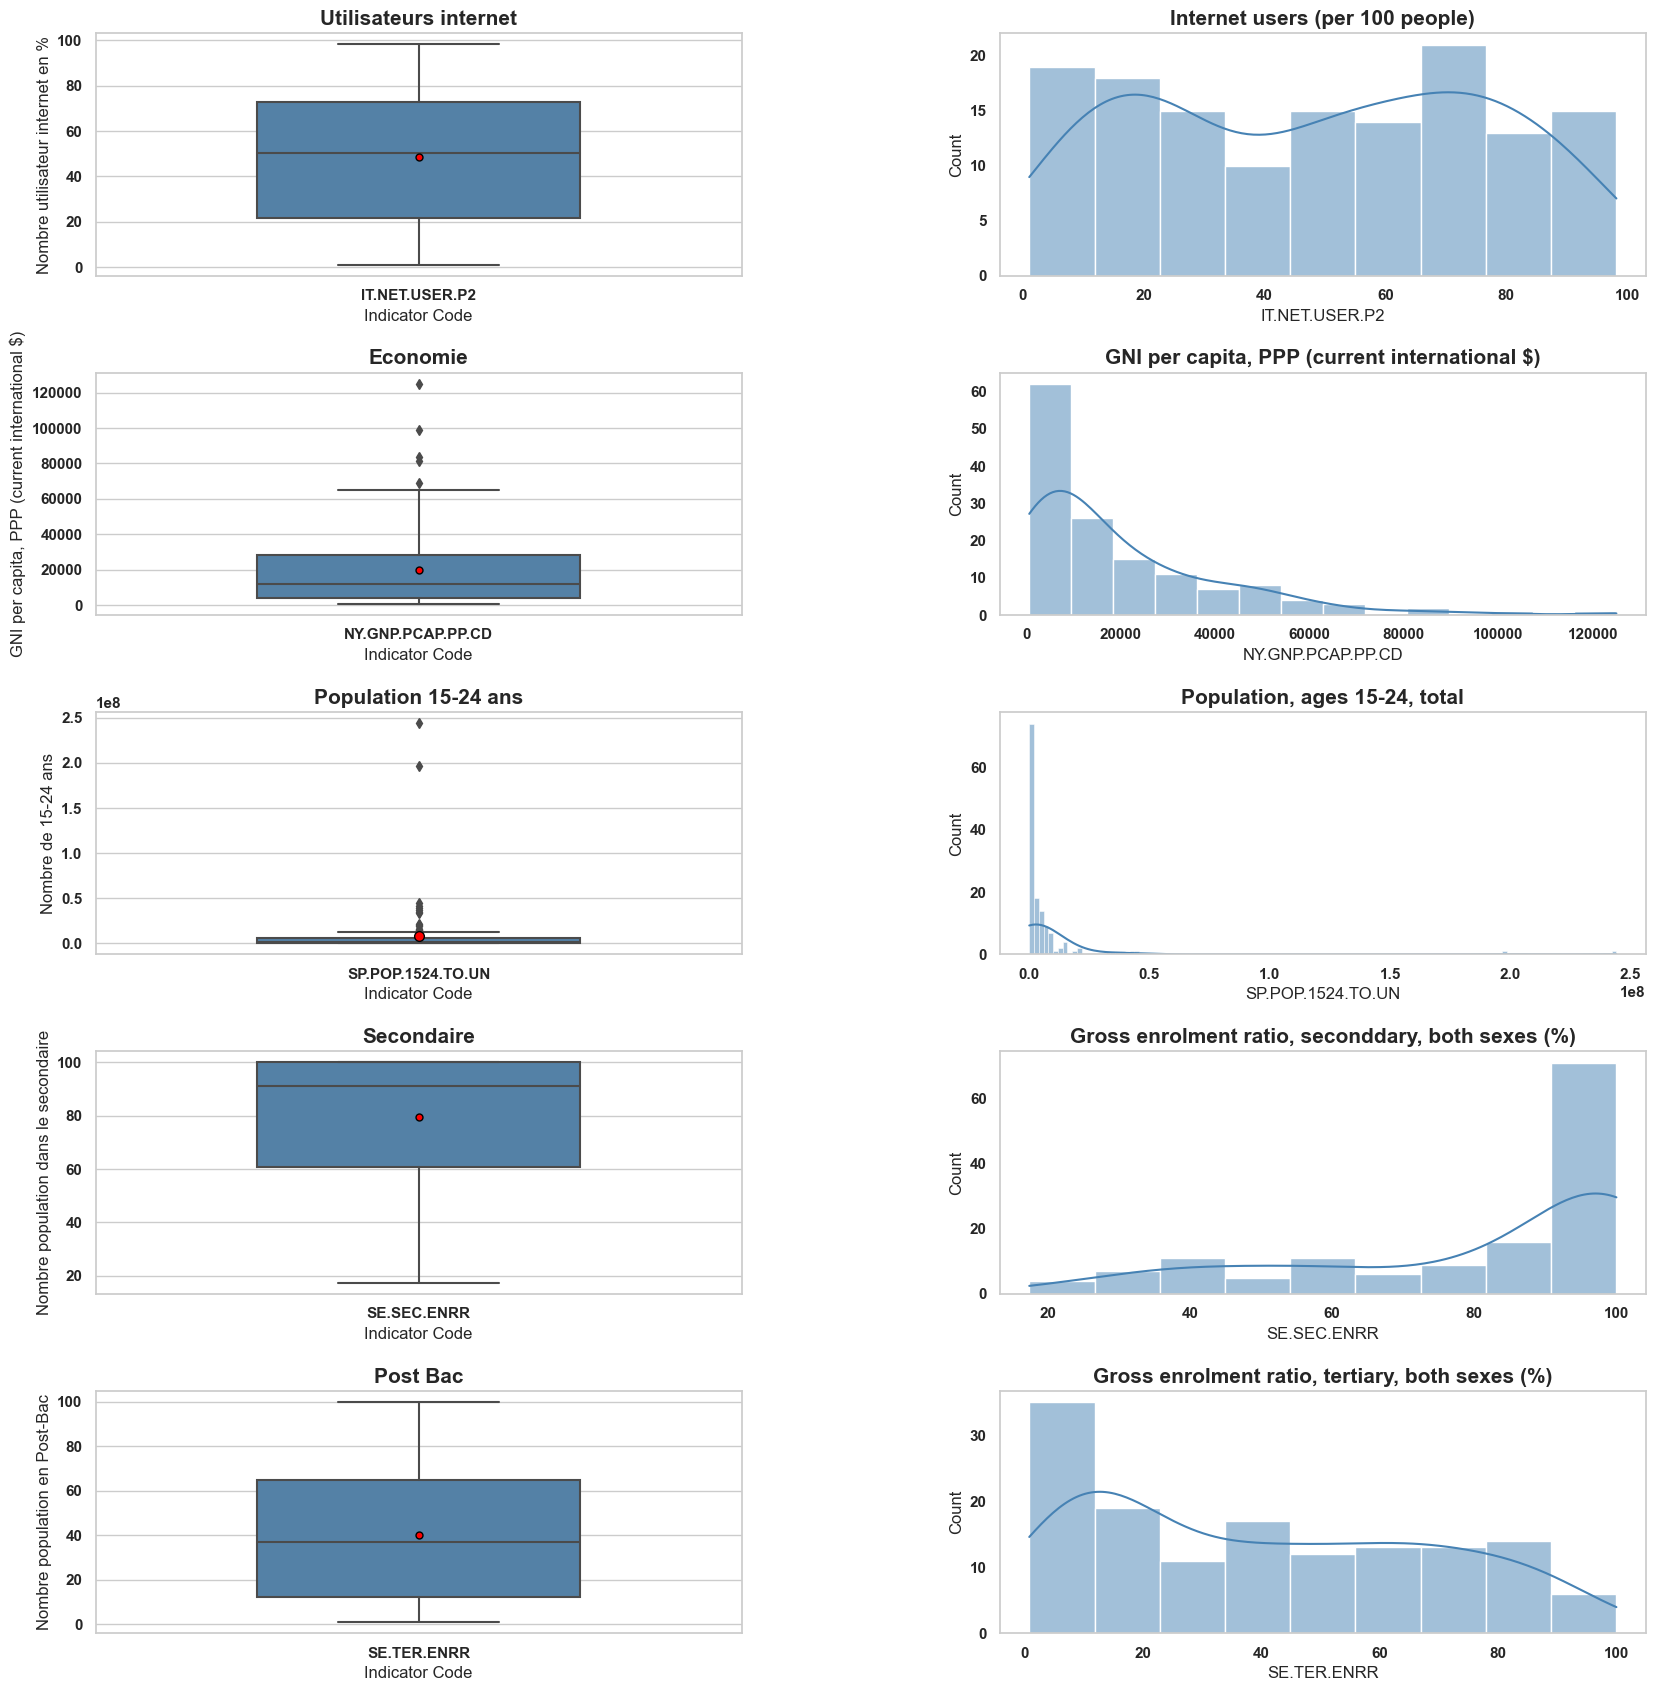

In [168]:

df_SEC_100 = df[df['Indicator Code'] == 'SE.SEC.ENRR']
df_TER_100 = df[df['Indicator Code'] == 'SE.TER.ENRR']
# On mets toutes les valeurs >100% a 100
df_SEC_100.Last_data[df_SEC_100.Last_data>100] = 100
df_TER_100.Last_data[df_TER_100.Last_data>100] = 100

# Representation graphique 

fig = plt.figure(figsize=(20,20))

plt.subplot(5,2,1) # maillage des subplot
# Internet users (per 100 people)
sns.boxplot(data = df_IT, x='Indicator Code', y='Last_data',width=0.5, color='SteelBlue',showmeans=True,meanprops={"marker":"o",
                                                                                                                   "markerfacecolor":"red",
                                                                                                                   "markeredgecolor":"black",
                                                                                                                   "markersize":"5"})
plt.title('Utilisateurs internet',fontweight='bold',size=15)
plt.ylabel('Nombre utilisateur internet en %')

plt.subplot(5,2,2)
sns.histplot(df_IT['Last_data'], kde = True, color='SteelBlue')
plt.title('Internet users (per 100 people)',fontweight='bold',size=15)
plt.xlabel('IT.NET.USER.P2')
plt.grid(False)

plt.subplot(5,2,3) # maillage des subplot
# GNI per capita, PPP (current international $)
sns.boxplot(data = df_ECO, x='Indicator Code', y='Last_data', width=0.5, color='SteelBlue',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"black",
                      "markersize":"5"})
plt.title('Economie',fontweight='bold',size=15)
plt.ylabel('GNI per capita, PPP (current international $)')

plt.subplot(5,2,4)
sns.histplot(df_ECO['Last_data'], kde = True, color='SteelBlue')
plt.title('GNI per capita, PPP (current international $)',fontweight='bold',size=15)
plt.xlabel('NY.GNP.PCAP.PP.CD')
plt.grid(False)

plt.subplot(5,2,5) # maillage des subplot
# Population, ages 15-24, total	
sns.boxplot(data = df_POP, x='Indicator Code', y='Last_data', width=0.5, color='SteelBlue',showmeans=True,meanprops={"marker":"o",
                                                                                                                     "markerfacecolor":"red", 
                                                                                                                     "markeredgecolor":"black",
                                                                                                                     "markersize":"7"})
plt.title('Population 15-24 ans',fontweight='bold',size=15)
plt.ylabel('Nombre de 15-24 ans')

plt.subplot(5,2,6)
sns.histplot(df_POP['Last_data'], kde = True, color='SteelBlue')
plt.title('Population, ages 15-24, total',fontweight='bold',size=15)
plt.xlabel('SP.POP.1524.TO.UN')
plt.grid(False)

plt.subplot(5,2,7) # maillage des subplot
# Enrolment in secondary education, both sexes (number)	
sns.boxplot(data = df_SEC_100, x='Indicator Code', y='Last_data', width=0.5, color='SteelBlue',showmeans=True,meanprops={"marker":"o",
                                                                                                                     "markerfacecolor":"red", 
                                                                                                                     "markeredgecolor":"black",
                                                                                                                     "markersize":"5"})
plt.title('Secondaire',fontweight='bold',size=15)
plt.ylabel('Nombre population dans le secondaire')

plt.subplot(5,2,8)
sns.histplot(df_SEC_100['Last_data'], kde = True, color='SteelBlue')
plt.title('Gross enrolment ratio, seconddary, both sexes (%)',fontweight='bold',size=15)
plt.xlabel('SE.SEC.ENRR')
plt.grid(False)

plt.subplot(5,2,9) # maillage des subplot
# Enrolment in tertiary education, all programmes, both sexes (number)	
sns.boxplot(data = df_TER_100, x='Indicator Code', y='Last_data', width=0.5, color='SteelBlue',showmeans=True,meanprops={"marker":"o",
                                                                                                                     "markerfacecolor":"red", 
                                                                                                                     "markeredgecolor":"black",
                                                                                                                     "markersize":"5"})
plt.title('Post Bac',fontweight='bold',size=15)
plt.ylabel('Nombre population en Post-Bac')

plt.subplot(5,2,10)
sns.histplot(df_TER_100['Last_data'], kde = True, color='SteelBlue')
plt.title('Gross enrolment ratio, tertiary, both sexes (%)',fontweight='bold',size=15)
plt.xlabel('SE.TER.ENRR')
plt.grid(False)

plt.subplots_adjust(left=0.125, # gerer les espacements
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig("assets/graphiques/PREPROCESSING_3_Mesures distributions-2.jpg", bbox_inches='tight')
plt.show()

In [169]:
# Mesures de tendcances centrales
# Moyennes
mean_IT =df_IT['Last_data'].mean()
mean_ECO=df_ECO['Last_data'].mean()
mean_SEC_100=df_SEC_100['Last_data'].mean()
mean_TER_100=df_TER_100['Last_data'].mean()
mean_POP=df_POP['Last_data'].mean()

# Médianes
median_IT =df_IT['Last_data'].median()
median_ECO=df_ECO['Last_data'].median()
median_SEC_100=df_SEC_100['Last_data'].median()
median_TER_100=df_TER_100['Last_data'].median()
median_POP=df_POP['Last_data'].median()

# Mode 
# mode_IT =df_IT['Last_data'].mode()
# mode_ECO=df_ECO['Last_data'].mode()
# mode_SEC=df_SEC['Last_data'].mode()
# mode_TER=df_TER['Last_data'].mode()
# mode_POP=df_POP['Last_data'].mode()

# Variance
var_IT =df_IT['Last_data'].var(ddof=0)
var_ECO=df_ECO['Last_data'].var(ddof=0)
var_SEC_100=df_SEC_100['Last_data'].var(ddof=0)
var_TER_100=df_TER_100['Last_data'].var(ddof=0)
var_POP=df_POP['Last_data'].var(ddof=0)

# Ecart type
std_IT =df_IT['Last_data'].std(ddof=0)
std_ECO=df_ECO['Last_data'].std(ddof=0)
std_SEC_100=df_SEC_100['Last_data'].std(ddof=0)
std_TER_100=df_TER_100['Last_data'].std(ddof=0)
std_POP=df_POP['Last_data'].std(ddof=0)

# Les données suivent une loi normal si : skew=0 et Kurtosis =3

# skew : coefficient d'assymétrie (0 => symétrique)
skew_IT =df_IT['Last_data'].skew()
skew_ECO=df_ECO['Last_data'].skew()
skew_SEC_100=df_SEC_100['Last_data'].skew()
skew_TER_100=df_TER_100['Last_data'].skew()
skew_POP=df_POP['Last_data'].skew()

# Kortosis : coefficient d'applatissement proche de 3 suit loi normale
kurtosis_IT =df_IT['Last_data'].kurtosis()
kurtosis_ECO=df_ECO['Last_data'].kurtosis()
kurtosis_SEC_100=df_SEC_100['Last_data'].kurtosis()
kurtosis_TER_100=df_TER_100['Last_data'].kurtosis()
kurtosis_POP=df_POP['Last_data'].kurtosis()

# Visualisation des indicateurs
# On crée une liste des tendances centrales
stats = [['mean',mean_IT, mean_ECO, mean_SEC_100, mean_TER_100, mean_POP],
         ['median', median_IT, median_ECO, median_SEC_100,median_TER_100,median_POP], 
         ['var',var_IT, var_ECO, var_SEC_100,var_TER_100,var_POP], 
         ['std',std_IT, std_ECO,std_SEC_100, std_TER_100, std_POP],
         ['skew', skew_IT, skew_ECO, skew_SEC_100, skew_TER_100, skew_POP], 
         ['kurtosis', kurtosis_IT, kurtosis_ECO, kurtosis_SEC_100, kurtosis_TER_100, kurtosis_POP]]
# On crée un dataframe et des colonnes
df_stats_100 = pd.DataFrame(stats,columns=['Statistique','IT_last_data','ECO_last_data','SEC_last_data','TER_last_data','POP_last_data'])
df_stats_100

Statistique  IT_last_data  ECO_last_data  SEC_last_data  TER_last_data  \
0        mean     48.462239   1.998679e+04      79.485614      40.106092   
1      median     50.219659   1.201000e+04      91.317413      36.794924   
2         var    815.902838   4.648906e+08     595.571429     817.785972   
3         std     28.564013   2.156132e+04      24.404332      28.596957   
4        skew     -0.009762   1.885302e+00      -0.955947       0.329185   
5    kurtosis     -1.305362   4.559860e+00      -0.461762      -1.231056   

   POP_last_data  
0   8.038740e+06  
1   1.703510e+06  
2   7.317407e+14  
3   2.705071e+07  
4   7.317494e+00  
5   5.761620e+01

In [170]:
# On remet les indicateurs à 100%
df_indicateurs_retenus.loc[df_indicateurs_retenus['SE.SEC.ENRR']>100] = 100
df_indicateurs_retenus.loc[df_indicateurs_retenus['SE.TER.ENRR']>100] = 100

In [171]:
df_indicateurs_retenus.describe()

Indicator Code  IT.NET.USER.P2  NY.GNP.PCAP.PP.CD  SE.SEC.ENRR  SE.TER.ENRR  \
count               140.000000         140.000000   140.000000   140.000000   
mean                 55.463510        8888.214286    79.485614    49.598897   
std                  35.729243       17730.777139    24.491960    38.694656   
min                   1.083733         100.000000    17.378010     0.797730   
25%                  21.845365         100.000000    60.991915    12.270108   
50%                  52.809558        3170.000000    91.317413    37.703526   
75%                 100.000000       10617.500000   100.000000   100.000000   
max                 100.000000      125000.000000   100.000000   100.000000   

Indicator Code  SP.POP.1524.TO.UN  
count                1.400000e+02  
mean                 7.102725e+06  
std                  2.727416e+07  
min                  1.000000e+02  
25%                  1.000000e+02  
50%                  5.968975e+05  
75%                  4.303251e+06  
max                  2.441202e+08

In [172]:
df_indicateurs_cleaned = df_indicateurs_retenus.copy()

In [173]:
df_indicateurs_cleaned.describe()

Indicator Code  IT.NET.USER.P2  NY.GNP.PCAP.PP.CD  SE.SEC.ENRR  SE.TER.ENRR  \
count               140.000000         140.000000   140.000000   140.000000   
mean                 55.463510        8888.214286    79.485614    49.598897   
std                  35.729243       17730.777139    24.491960    38.694656   
min                   1.083733         100.000000    17.378010     0.797730   
25%                  21.845365         100.000000    60.991915    12.270108   
50%                  52.809558        3170.000000    91.317413    37.703526   
75%                 100.000000       10617.500000   100.000000   100.000000   
max                 100.000000      125000.000000   100.000000   100.000000   

Indicator Code  SP.POP.1524.TO.UN  
count                1.400000e+02  
mean                 7.102725e+06  
std                  2.727416e+07  
min                  1.000000e+02  
25%                  1.000000e+02  
50%                  5.968975e+05  
75%                  4.303251e+06  
max                  2.441202e+08

### Bilan analyse indicateurs retenus brut
**Pas de valeurs aberrantes** mais de fortes disparités entre les pays en raison de leurs tailles et de leurs revenus
- **outliers** : Il y a des outliers dans les df : POP, ECONOMIE et SECONDAIRE
    - **ECONOMIE** : 7 ouliers : 
        - 'Brunei Darussalam','Kuwait','Luxembourg','Macao SAR - China', 'Norway', 'Qatar', 'Switzerland'
    - **Population** : 25 ouliers : 
        - 'India', 'China', 'United States', 'Indonesia', 'Pakistan', 'Nigeria', 'Bangladesh', 'Brazil', 'Ethiopia', 'Mexico', 'Philippines', 'Congo, Dem. Rep.', 'Egypt, Arab Rep.', 'Russian Federation', 'Turkey', 'Iran, Islamic Rep.', 'Japan', 'South Africa', 'Tanzania', 'Sudan', 'Thailand', 'Colombia', 'Myanmar', 'Germany', 'Uganda''India', 'China', 'United States', 'Indonesia', 'Pakistan', 'Nigeria', 'Bangladesh', 'Brazil', 'Ethiopia', 'Mexico', 'Philippines', 'Congo, Dem. Rep.', 'Egypt, Arab Rep.', 'Russian Federation', 'Turkey', 'Iran, Islamic Rep.', 'Japan', 'South Africa', 'Tanzania', 'Sudan', 'Thailand', 'Colombia', 'Myanmar', 'Germany', 'Uganda'
    - **Secondaire** : 1 outliers : 
        - Belgique
- Explication des % > 100% des indicateurs education : 
    - 43 pays dépasse 100% permet de reforcer la pondération des pays qui accueil plus d'étudiants que la norme ==> interressant pour notre analyse
    - " L'inscription «brute» comprend les étudiants de tous âges. En d'autres termes, il comprend les étudiants dont l'âge dépasse le groupe d'âge officiel (par exemple, les redoublants). Ainsi, s'il y a scolarisation tardive, scolarisation précoce ou redoublement, la scolarisation totale peut dépasser la population du groupe d'âge qui correspond officiellement au niveau d'éducation - conduisant à des ratios supérieurs à 100 %." - source WorldBank

## Normaliser/Standardiser

In [174]:
# Fonction de visualisation des indicateurs normalisés pour fair la selection de la transormation la plus adéquat
def graph_norm(df,titre):
    titre = "assets/graphiques/"+titre+".jpeg"
    plt.figure(figsize=(10,5))
    col=indicateurs_retenus
    colors=['orange','Green','sienna','SteelBlue','Purple']
    for i in range(5): 
        sns.kdeplot(df[col[i]],label=df.columns[i],color=colors[i])
    plt.legend()
    plt.grid(False)
    plt.xlabel('')
    # plt.savefig(titre)
    plt.show()

In [175]:
# On normalise avec scit-learb
# from sklearn import preprocessing
cols = ['IT.NET.USER.P2','NY.GNP.PCAP.PP.CD','SE.SEC.ENRR','SE.TER.ENRR','SP.POP.1524.TO.UN']

StandardScaler sur les données cleaner SEC et TER a 100%

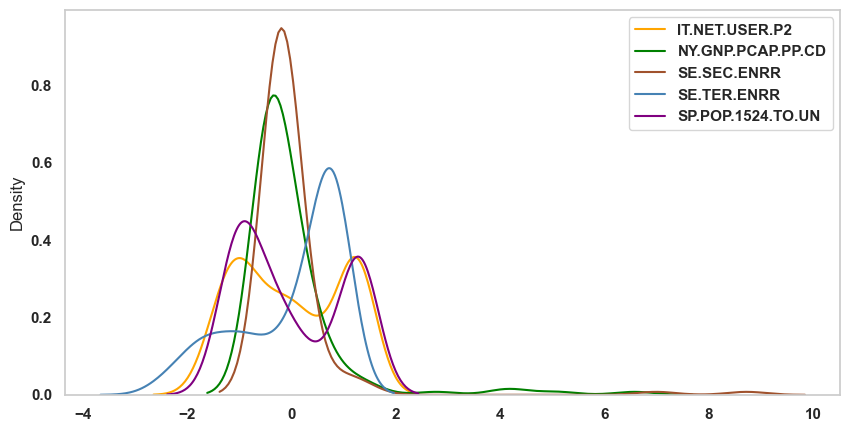

In [176]:
scaler = nltk.preprocessing.StandardScaler()
scaled = scaler.fit_transform(df_indicateurs_cleaned[cols])
df_StandardScaler = pd.DataFrame(scaled, columns=cols)
# df_StandardScaler.head()
graph_norm(df_StandardScaler,titre="NORMALISATION_1_StandardScaler_100")

***

### Normaliser en supprimant les < median et suppression des SEC et TER à 100%

In [177]:
df_norm = df_indicateurs_cleaned.copy()

In [178]:
# 'IT.NET.USER.P2', 'NY.GNP.PCAP.PP.CD', 'SP.POP.1524.TO.UN', 'SE.SEC.ENRR', 'SE.TER.ENRR'
indicateur = "NY.GNP.PCAP.PP.CD"
print(f"max : {df_norm.loc[:,[indicateur]].max()}")
print(f"min : {df_norm.loc[:,[indicateur]].min()}")
print(f"median : {df_norm.loc[:,[indicateur]].median()}")

max : Indicator Code
NY.GNP.PCAP.PP.CD    125000.0
dtype: float64
min : Indicator Code
NY.GNP.PCAP.PP.CD    100.0
dtype: float64
median : Indicator Code
NY.GNP.PCAP.PP.CD    3170.0
dtype: float64


In [179]:
# 'IT.NET.USER.P2', 'NY.GNP.PCAP.PP.CD', 'SP.POP.1524.TO.UN', 'SE.SEC.ENRR', 'SE.TER.ENRR'
indicateur = "SP.POP.1524.TO.UN"
print(f"max : {df_norm.loc[:,[indicateur]].max()}")
print(f"min : {df_norm.loc[:,[indicateur]].min()}")
print(f"median : {df_norm.loc[:,[indicateur]].median()}")

max : Indicator Code
SP.POP.1524.TO.UN    244120201.0
dtype: float64
min : Indicator Code
SP.POP.1524.TO.UN    100.0
dtype: float64
median : Indicator Code
SP.POP.1524.TO.UN    596897.5
dtype: float64


In [180]:
df_norm = df_norm.loc[df_norm['NY.GNP.PCAP.PP.CD']>5430.0]
df_norm = df_norm.loc[df_norm['SP.POP.1524.TO.UN']>596897.5]
df_norm.head()

Indicator Code  IT.NET.USER.P2  NY.GNP.PCAP.PP.CD  SE.SEC.ENRR  SE.TER.ENRR  \
Country Name                                                                  
Algeria              38.200000            14170.0    99.860191    36.922279   
Angola               12.400000             6270.0    28.898720     9.308020   
Brazil               58.327952            15310.0    99.650970    50.604919   
Bulgaria             56.656300            17880.0    99.016350    73.934196   
China                50.300000            14420.0    94.299210    43.391769   

Indicator Code  SP.POP.1524.TO.UN  
Country Name                       
Algeria                 6467818.0  
Angola                  4259352.0  
Brazil                 33595574.0  
Bulgaria                 710294.0  
China                 197026759.0

- StandardScaler

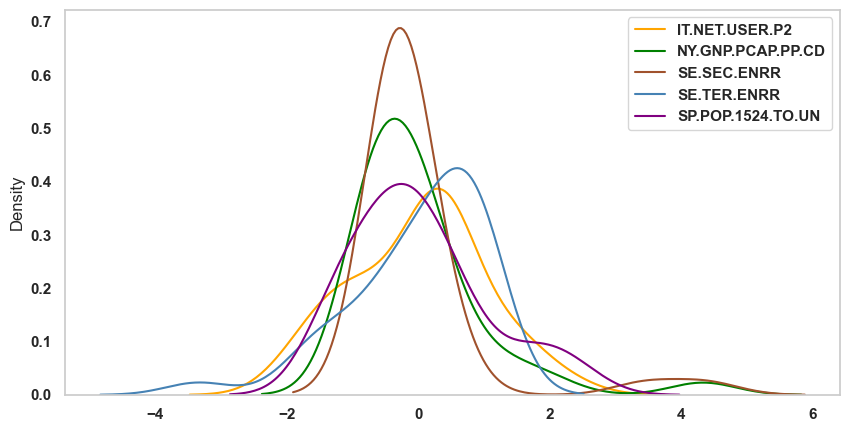

In [181]:
scaler = nltk.preprocessing.StandardScaler()
scaled = scaler.fit_transform(df_norm[cols])
df_StandardScaler_norm = pd.DataFrame(scaled, columns=cols)
# df_StandardScaler_n.head()
graph_norm(df_StandardScaler_norm,titre="NORMALISATION_2_StandardScaler_norm")

- On optimise pour se rapprocher la forme gaussienne

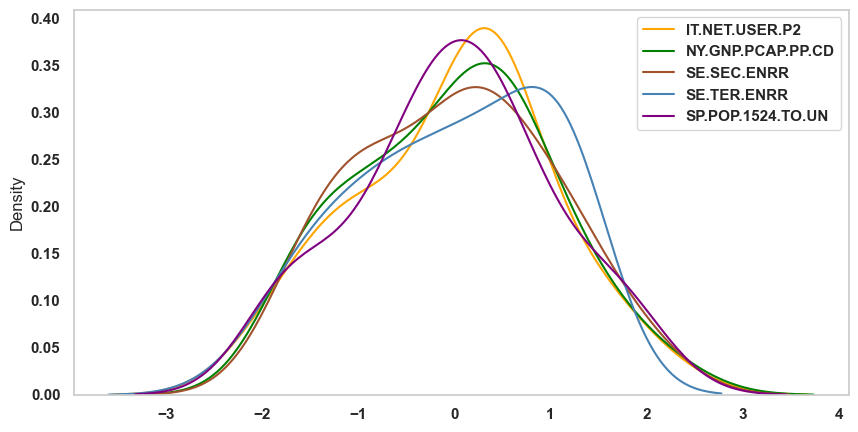

In [182]:
scaler = nltk.preprocessing.PowerTransformer()
scaled = scaler.fit_transform(df_norm[cols])
df_PowerTransformer_norm = pd.DataFrame(scaled, columns=cols)
# df_StandardScaler_n.head()
graph_norm(df_PowerTransformer_norm,titre="NORMALISATION_3_PowerTransform_norm")

***

**Mise en correspondance avec une distribution gaussienne**

Dans de nombreux scénarios de modélisation, la normalité des caractéristiques d'un ensemble de données est souhaitable. Les transformées de puissance sont une famille de transformations paramétriques et monotones qui visent à faire correspondre les données de n'importe quelle distribution à une distribution aussi proche que possible de la distribution gaussienne afin de stabiliser la variance et de minimiser l'asymétrie.

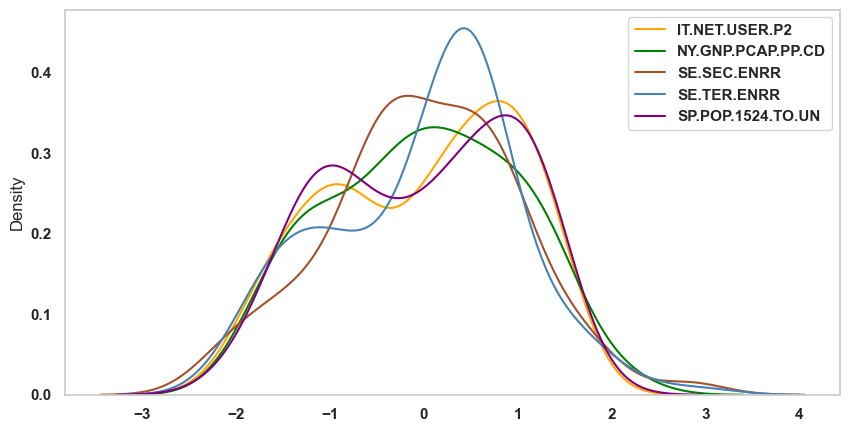

In [183]:
df_indicateurs_nonCleaner = df.pivot_table(index=['Country Name'],columns='Indicator Code')['Last_data']
scaler = nltk.preprocessing.PowerTransformer(method = 'box-cox')
df_PowerTransformer = scaler.fit_transform(df_indicateurs_nonCleaner[cols])
df_PowerTransformer = pd.DataFrame(df_PowerTransformer, columns=cols)
df_PowerTransformer.head()
graph_norm(df_PowerTransformer,titre="NORMALISATION_3_PowerTransform_non_clean_OK")

Les statistiques descriptives des indicateurs ont montré la présence de courbes asymétriques (étalées à droite ou à gauche), les courbes de l'indicateur démographique et économique ont des observations plus concentrées et une variance élevée, avec des outliers.

**On garde la normalisation de PowerTransformer pour le scoring**

## Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde 

In [184]:
df_stats = df.copy()

In [185]:
# On supprime les anées 2010	2011	2012	2013	2014	2015
df_stats = df_stats.drop(['2010','2011','2012','2013','2014','2015'],axis=1)

### Ordre de grandeur des indicateurs statistiques par pays

In [186]:
#Oncrée les colone de base
a2 = pd.DataFrame({'Country Name' : df_stats['Country Name'],
                   'Country Code' : df_stats['Country Code'],
                   'Region' : df_stats['Region'],
                   'Income Group' : df_stats['Income Group']})

In [187]:
# On recupère des dernier données par indicateur
a3 = df_stats.pivot_table(index=['Country Code'],columns='Indicator Code')['Last_data']
a3.loc[a3['SE.SEC.ENRR']>100] = 100
a3.loc[a3['SE.TER.ENRR']>100] = 100

In [188]:
# On fusionne les deux pour avoir toutes les informations
df_stats = pd.merge(a2,a3,left_on="Country Code", right_on='Country Code', how='inner')
df_stats = df_stats.drop_duplicates()

In [189]:
df_stats.head()

Country Name Country Code                      Region         Income Group  \
0   Afghanistan          AFG                  South Asia           Low income   
5       Albania          ALB       Europe & Central Asia  Upper middle income   
10      Algeria          DZA  Middle East & North Africa  Upper middle income   
15       Angola          AGO          Sub-Saharan Africa  Upper middle income   
20    Argentina          ARG   Latin America & Caribbean  Upper middle income   

    IT.NET.USER.P2  NY.GNP.PCAP.PP.CD  SE.SEC.ENRR  SE.TER.ENRR  \
0         8.260000             1880.0    55.644409     8.662800   
5        63.252933            11340.0    95.765488    58.109951   
10       38.200000            14170.0    99.860191    36.922279   
15       12.400000             6270.0    28.898720     9.308020   
20      100.000000              100.0   100.000000   100.000000   

    SP.POP.1524.TO.UN  
0           7252785.0  
5            556269.0  
10          6467818.0  
15          4259352.0  
20              100.0

In [190]:
# On affiche les ordres de grandeur des indicateurs
df_stats.describe()

IT.NET.USER.P2  NY.GNP.PCAP.PP.CD  SE.SEC.ENRR  SE.TER.ENRR  \
count      140.000000         140.000000   140.000000   140.000000   
mean        55.463510        8888.214286    79.485614    49.598897   
std         35.729243       17730.777139    24.491960    38.694656   
min          1.083733         100.000000    17.378010     0.797730   
25%         21.845365         100.000000    60.991915    12.270108   
50%         52.809558        3170.000000    91.317413    37.703526   
75%        100.000000       10617.500000   100.000000   100.000000   
max        100.000000      125000.000000   100.000000   100.000000   

       SP.POP.1524.TO.UN  
count       1.400000e+02  
mean        7.102725e+06  
std         2.727416e+07  
min         1.000000e+02  
25%         1.000000e+02  
50%         5.968975e+05  
75%         4.303251e+06  
max         2.441202e+08

### Déterminer des ordres de grandeurs des indicateurs statistiques classiques par region

In [191]:
df_stats_region = df_stats.copy()

In [192]:
df_stats_region.head()

Country Name Country Code                      Region         Income Group  \
0   Afghanistan          AFG                  South Asia           Low income   
5       Albania          ALB       Europe & Central Asia  Upper middle income   
10      Algeria          DZA  Middle East & North Africa  Upper middle income   
15       Angola          AGO          Sub-Saharan Africa  Upper middle income   
20    Argentina          ARG   Latin America & Caribbean  Upper middle income   

    IT.NET.USER.P2  NY.GNP.PCAP.PP.CD  SE.SEC.ENRR  SE.TER.ENRR  \
0         8.260000             1880.0    55.644409     8.662800   
5        63.252933            11340.0    95.765488    58.109951   
10       38.200000            14170.0    99.860191    36.922279   
15       12.400000             6270.0    28.898720     9.308020   
20      100.000000              100.0   100.000000   100.000000   

    SP.POP.1524.TO.UN  
0           7252785.0  
5            556269.0  
10          6467818.0  
15          4259352.0  
20              100.0

In [193]:
for i in range(len(indicateurs_retenus)):
    print('--------------------------------------------------------')
    print(indicateurs_retenus[i])
    print('--------------------------------------------------------')
    print(df_stats_region.groupby('Region')[indicateurs_retenus[i]].describe(include=all))

--------------------------------------------------------
IT.NET.USER.P2
--------------------------------------------------------
                            count       mean        std        min        25%  \
Region                                                                          
East Asia & Pacific          16.0  63.740673  33.526813  18.200000  22.744017   
Europe & Central Asia        44.0  85.080086  24.608391  14.996775  70.235925   
Latin America & Caribbean    21.0  58.495446  25.891286  26.802605  41.590000   
Middle East & North Africa   14.0  66.553292  25.806430  24.085409  46.131191   
North America                 1.0  74.554202        NaN  74.554202  74.554202   
South Asia                    7.0  21.432908  10.988467   8.260000  14.200000   
Sub-Saharan Africa           37.0  16.669778  12.904877   1.083733   7.459161   

                                   50%         75%         max  
Region                                                          
East Asia &

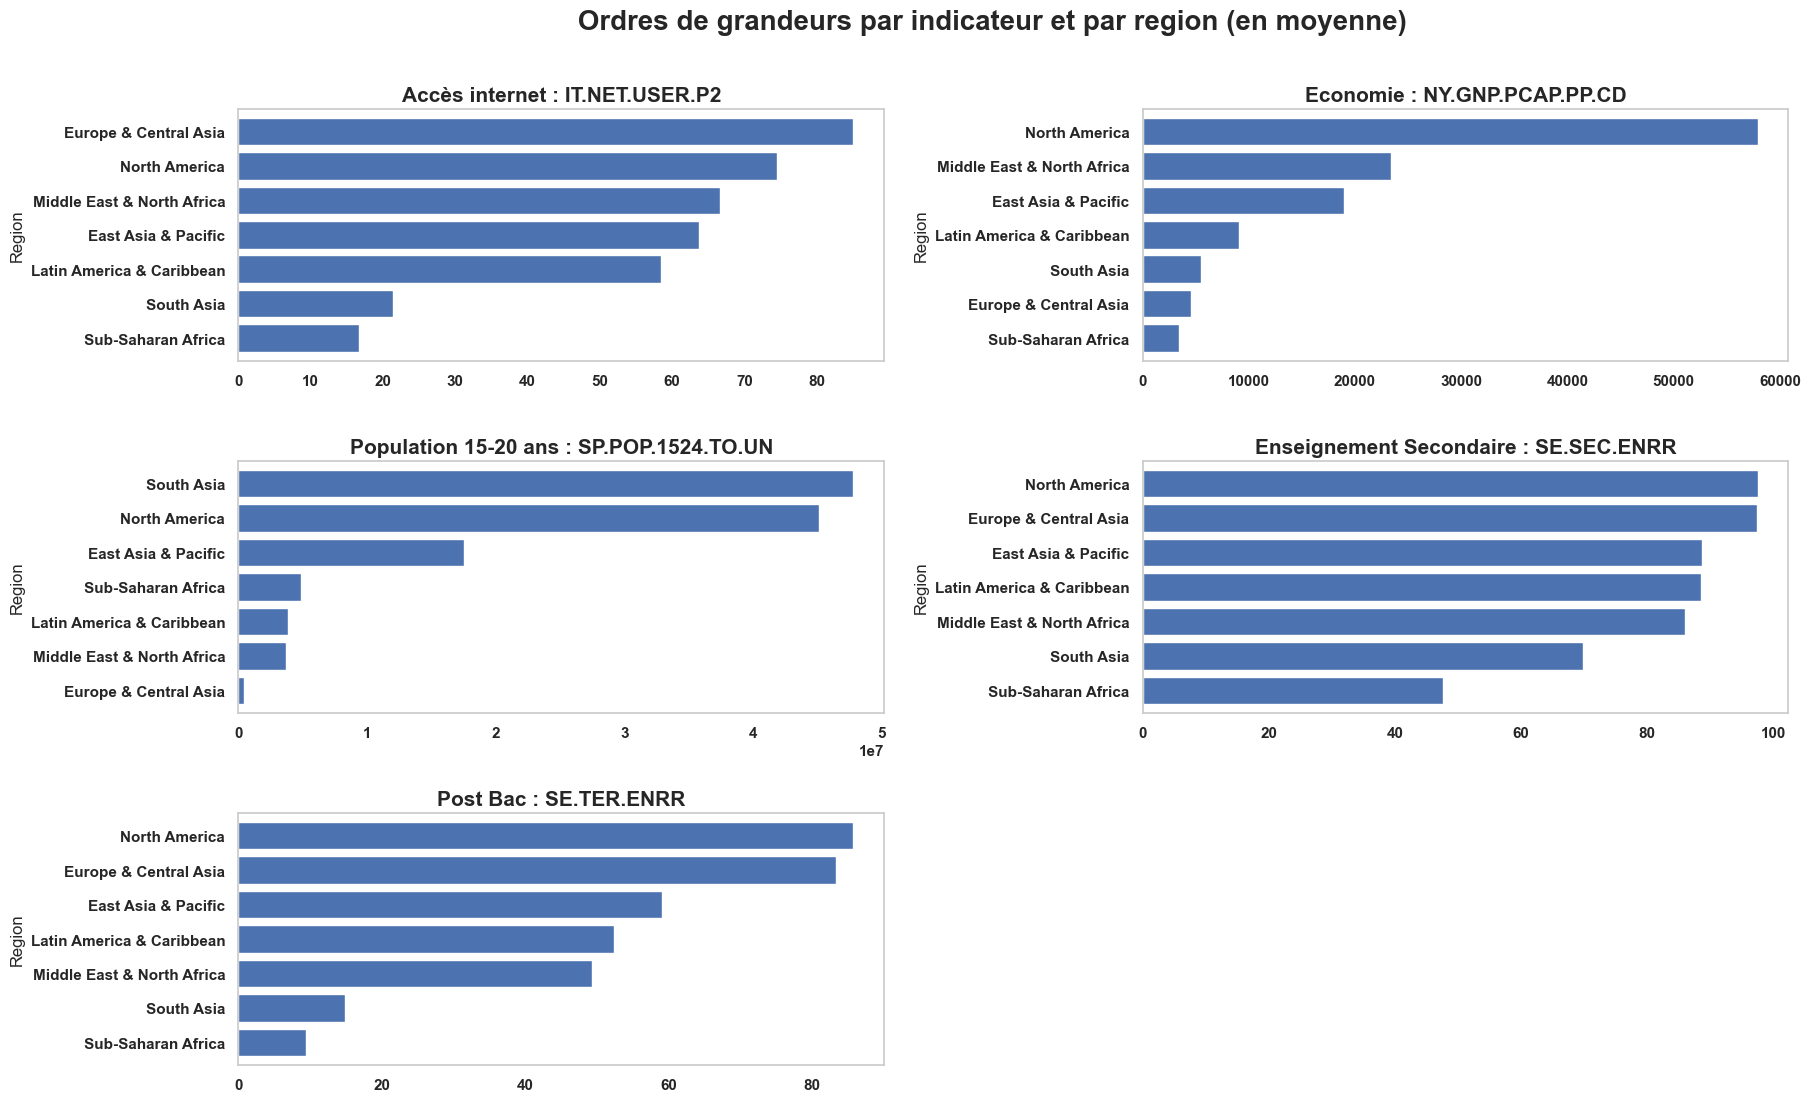

In [194]:
fig = plt.figure(figsize=(20,20))
fig.suptitle(' Ordres de grandeurs par indicateur et par region (en moyenne)',fontweight='bold', fontsize=20)
plt.subplot(5,2,1) # maillage des subplot
plt.title('Accès internet : IT.NET.USER.P2',fontweight='bold',size=15)
df_stats_region.groupby('Region')['IT.NET.USER.P2'].mean().sort_values(ascending=True).plot(kind='barh',width=0.8)
plt.grid(False)

plt.subplot(5,2,2) # maillage des subplot
plt.title("Economie : NY.GNP.PCAP.PP.CD",fontweight='bold',size=15)
df_stats_region.groupby('Region')['NY.GNP.PCAP.PP.CD'].mean().sort_values(ascending=True).plot(kind='barh',width=0.8)
plt.grid(False)

plt.subplot(5,2,3) # maillage des subplot
plt.title("Population 15-20 ans : SP.POP.1524.TO.UN",fontweight='bold',size=15)
df_stats_region.groupby('Region')['SP.POP.1524.TO.UN'].mean().sort_values(ascending=True).plot(kind='barh',width=0.8)
plt.grid(False)

plt.subplot(5,2,4) # maillage des subplot
plt.title("Enseignement Secondaire : SE.SEC.ENRR",fontweight='bold',size=15)
df_stats_region.groupby('Region')['SE.SEC.ENRR'].mean().sort_values(ascending=True).plot(kind='barh',width=0.8)
plt.grid(False)

plt.subplot(5,2,5) # maillage des subplot
plt.title("Post Bac : SE.TER.ENRR",fontweight='bold',size=15)
df_stats_region.groupby('Region')['SE.TER.ENRR'].mean().sort_values(ascending=True).plot(kind='barh',width=0.8)
width=1
plt.grid(False)

plt.subplots_adjust(left=0.125, # gerer les espacements
                    bottom=0.1, 
                    right=0.9, 
                    top=0.93, 
                    wspace=0.4, 
                    hspace=0.4
                   )
plt.savefig("assets/graphiques/PREPROCESSING_4_Ordre de grandeurs.jpg", bbox_inches='tight')
plt.show()

# PARTIE 3 : Scoring & MAP

## Score d'attractivité pays

In [195]:
df_score = df_PowerTransformer
df_score['Pays'] = df_indicateurs_retenus.index

On veut mettre en avant : les pays fortes connexion internet, forte population de 15-24 ans, suivant formation sup en priorité puis dans le secondaire et pouvant payer les services

|Indicator|code|Pondérations|
| --- | --- | --- |
|IT |IT.NET.USER.P2	|5|
|POP 15-24|SP.POP.1524.TO.UN|4|
|SUPERIEUR|SE.TER.ENRR|3|	
|SECONDAIRE |SE.SEC.ENRR |2|
|ECONOMIE|NY.GNP.PCAP.PP.CD|1|	

In [196]:
# On calcule et affecte un scoring
for i in range(len(df_score)):
    df_score.loc[i,'Score'] = (round((df_score.loc[i,'IT.NET.USER.P2']*5) 
                             +(df_score.loc[i,'SP.POP.1524.TO.UN']*4)
                             + (df_score.loc[i,'SE.TER.ENRR']*3)
                             + (df_score.loc[i,'SE.SEC.ENRR']*2)
                             + (df_score.loc[i,'NY.GNP.PCAP.PP.CD']*1)/14,2)
                            )                

### TOP 10 DF_SCORE

In [197]:
# TOP 10
df_top_10 = df_score.sort_values(by='Score',ascending=False).head(10)
df_top_10

IT.NET.USER.P2  NY.GNP.PCAP.PP.CD  SE.SEC.ENRR  SE.TER.ENRR  \
135        0.904686           1.462074     0.438005     1.345030   
134        1.385123           1.126017     1.506951     0.690003   
6          1.184173           1.222933     1.859802     1.433485   
69         1.322187           0.957368     0.483686     1.488486   
66         1.359969           1.150131     0.583276     0.858930   
117        1.021567           0.963910     1.578976     1.421164   
12         1.197643           1.225723     2.938225     1.122505   
95         1.377759           1.310942     1.783850     1.196069   
109        0.871983           0.586230     0.678854     1.235472   
48         1.266653           1.296742     0.615350     0.972800   

     SP.POP.1524.TO.UN                Pays  Score  
135           1.876738       United States  17.05  
134           0.852785      United Kingdom  15.50  
6             0.298286           Australia  15.22  
69            0.749742         Korea, Rep.  15.11  
66            1.112840               Japan  15.08  
117           0.516456               Spain  14.66  
12           -0.179942             Belgium  14.60  
95            0.088065         Netherlands  14.49  
109           1.220982  Russian Federation  14.35  
48            0.919258             Germany  14.25

In [198]:
df_top_10 = df_top_10.reset_index()
df_top_10 = df_top_10.drop(['index'],axis=1)
liste_pays_retenus = df_top_10['Pays'].tolist()

***

### TOP 10 DF_POWERTRANSFORM_NORM

In [199]:
df_score_norm = df_PowerTransformer_norm
df_score_norm['Pays'] = df_norm.index

In [200]:
for i in range(len(df_score_norm)):
    df_score_norm.loc[i,'Score'] = (round((df_score_norm.loc[i,'IT.NET.USER.P2']*5) 
                             +(df_score_norm.loc[i,'SP.POP.1524.TO.UN']*4)
                             + (df_score_norm.loc[i,'SE.TER.ENRR']*3)
                             + (df_score_norm.loc[i,'SE.SEC.ENRR']*2)
                             + (df_score_norm.loc[i,'NY.GNP.PCAP.PP.CD']*1)/14,2)
                            )   
# TOP 10
df_top_10_norm = df_score_norm.sort_values(by='Score',ascending=False).head(10)
df_top_10_norm

IT.NET.USER.P2  NY.GNP.PCAP.PP.CD  SE.SEC.ENRR  SE.TER.ENRR  \
15        2.184787           1.702272     1.175855     1.950842   
33        1.447463           2.239240     1.035853     1.762995   
2         0.641004           0.538406     1.259486     0.681782   
4         0.235485           0.433473     0.706352     0.402809   
5         0.519118           0.326610     1.091381     0.862176   
32        0.163468          -0.820426     1.214275     1.670500   
13       -0.017903           0.775908     0.236952     1.378093   
19        0.595935           0.728257     0.357749    -0.210547   
25        0.407826          -0.538515     0.170730     0.072569   
27        1.598854           1.507631     0.532078     0.765949   

    SP.POP.1524.TO.UN                Pays  Score  
15           0.260830         Korea, Rep.  20.29  
33           1.331004       United States  20.08  
2            1.192399              Brazil  12.58  
4            1.918316               China  11.50  
5            0.472196            Colombia   9.28  
32           0.066830             Ukraine   8.47  
13           0.715522  Iran, Islamic Rep.   7.44  
19           0.938671              Mexico   6.87  
25           0.910227         Philippines   6.20  
27          -1.627177     Slovak Republic   4.96

***

## Score attractivité région

In [201]:
# On ajoute la region a df_score
df_score_region_sc = pd.merge(df_score,df_stats_region,left_on="Pays", right_on='Country Name', how='inner')
df_score_region_sc.columns

Index(['IT.NET.USER.P2_x', 'NY.GNP.PCAP.PP.CD_x', 'SE.SEC.ENRR_x',
       'SE.TER.ENRR_x', 'SP.POP.1524.TO.UN_x', 'Pays', 'Score', 'Country Name',
       'Country Code', 'Region', 'Income Group', 'IT.NET.USER.P2_y',
       'NY.GNP.PCAP.PP.CD_y', 'SE.SEC.ENRR_y', 'SE.TER.ENRR_y',
       'SP.POP.1524.TO.UN_y'],
      dtype='object')

In [202]:
# On supprime les colonne des indicateurs non normalisés
df_score_region_sc = df_score_region_sc.drop(columns=['IT.NET.USER.P2_y', 'Country Name','Country Code',
                                                      'NY.GNP.PCAP.PP.CD_y', 'SE.SEC.ENRR_y', 'SE.TER.ENRR_y',
                                                      'SP.POP.1524.TO.UN_y'],axis=1)

In [203]:
df_score_income_sc = df_score_region_sc.copy()

In [204]:
# On renomme les colonnes
df_score_region_sc = df_score_region_sc.rename(columns={'IT.NET.USER.P2_x':'NET.USER',
                                                        'NY.GNP.PCAP.PP.CD_x':'ECO',
                                                        'SE.SEC.ENRR_x':'SEC',
                                                        'SE.TER.ENRR_x':'TER',
                                                        'SP.POP.1524.TO.UN_x':'POP'})

In [205]:
# On regroupe par region et on fait la moyenne des indicateurs par region
df_score_region_sc = df_score_region_sc.groupby('Region').mean()
df_score_region_sc = df_score_region_sc.sort_values(by='Score',ascending=False)
df_score_region_sc

NET.USER       ECO       SEC       TER       POP  \
Region                                                                         
North America               0.904686  1.462074  0.438005  1.345030  1.876738   
Europe & Central Asia       0.767370  0.666468  0.827983  0.789956 -0.263289   
East Asia & Pacific         0.296663  0.522339  0.327918  0.394410  0.278486   
Middle East & North Africa  0.509407  0.541269  0.084012  0.154570 -0.069502   
Latin America & Caribbean   0.134427  0.043293  0.213622  0.263573 -0.273448   
South Asia                 -0.915696 -0.695377 -0.492470 -0.805644  0.993137   
Sub-Saharan Africa         -1.161091 -1.155767 -1.198132 -1.201977  0.135559   

                                Score  
Region                                 
North America               17.050000  
Europe & Central Asia        6.856818  
East Asia & Pacific          4.473125  
Middle East & North Africa   2.940000  
Latin America & Caribbean    0.798571  
South Asia                  -4.057143  
Sub-Saharan Africa         -11.347838

In [206]:
# Import Pi
from math import pi

In [207]:
# Set data
df_spider = df_score_region_sc[['NET.USER','ECO','SEC','TER','POP']]
df_spider

NET.USER       ECO       SEC       TER       POP
Region                                                                      
North America               0.904686  1.462074  0.438005  1.345030  1.876738
Europe & Central Asia       0.767370  0.666468  0.827983  0.789956 -0.263289
East Asia & Pacific         0.296663  0.522339  0.327918  0.394410  0.278486
Middle East & North Africa  0.509407  0.541269  0.084012  0.154570 -0.069502
Latin America & Caribbean   0.134427  0.043293  0.213622  0.263573 -0.273448
South Asia                 -0.915696 -0.695377 -0.492470 -0.805644  0.993137
Sub-Saharan Africa         -1.161091 -1.155767 -1.198132 -1.201977  0.135559

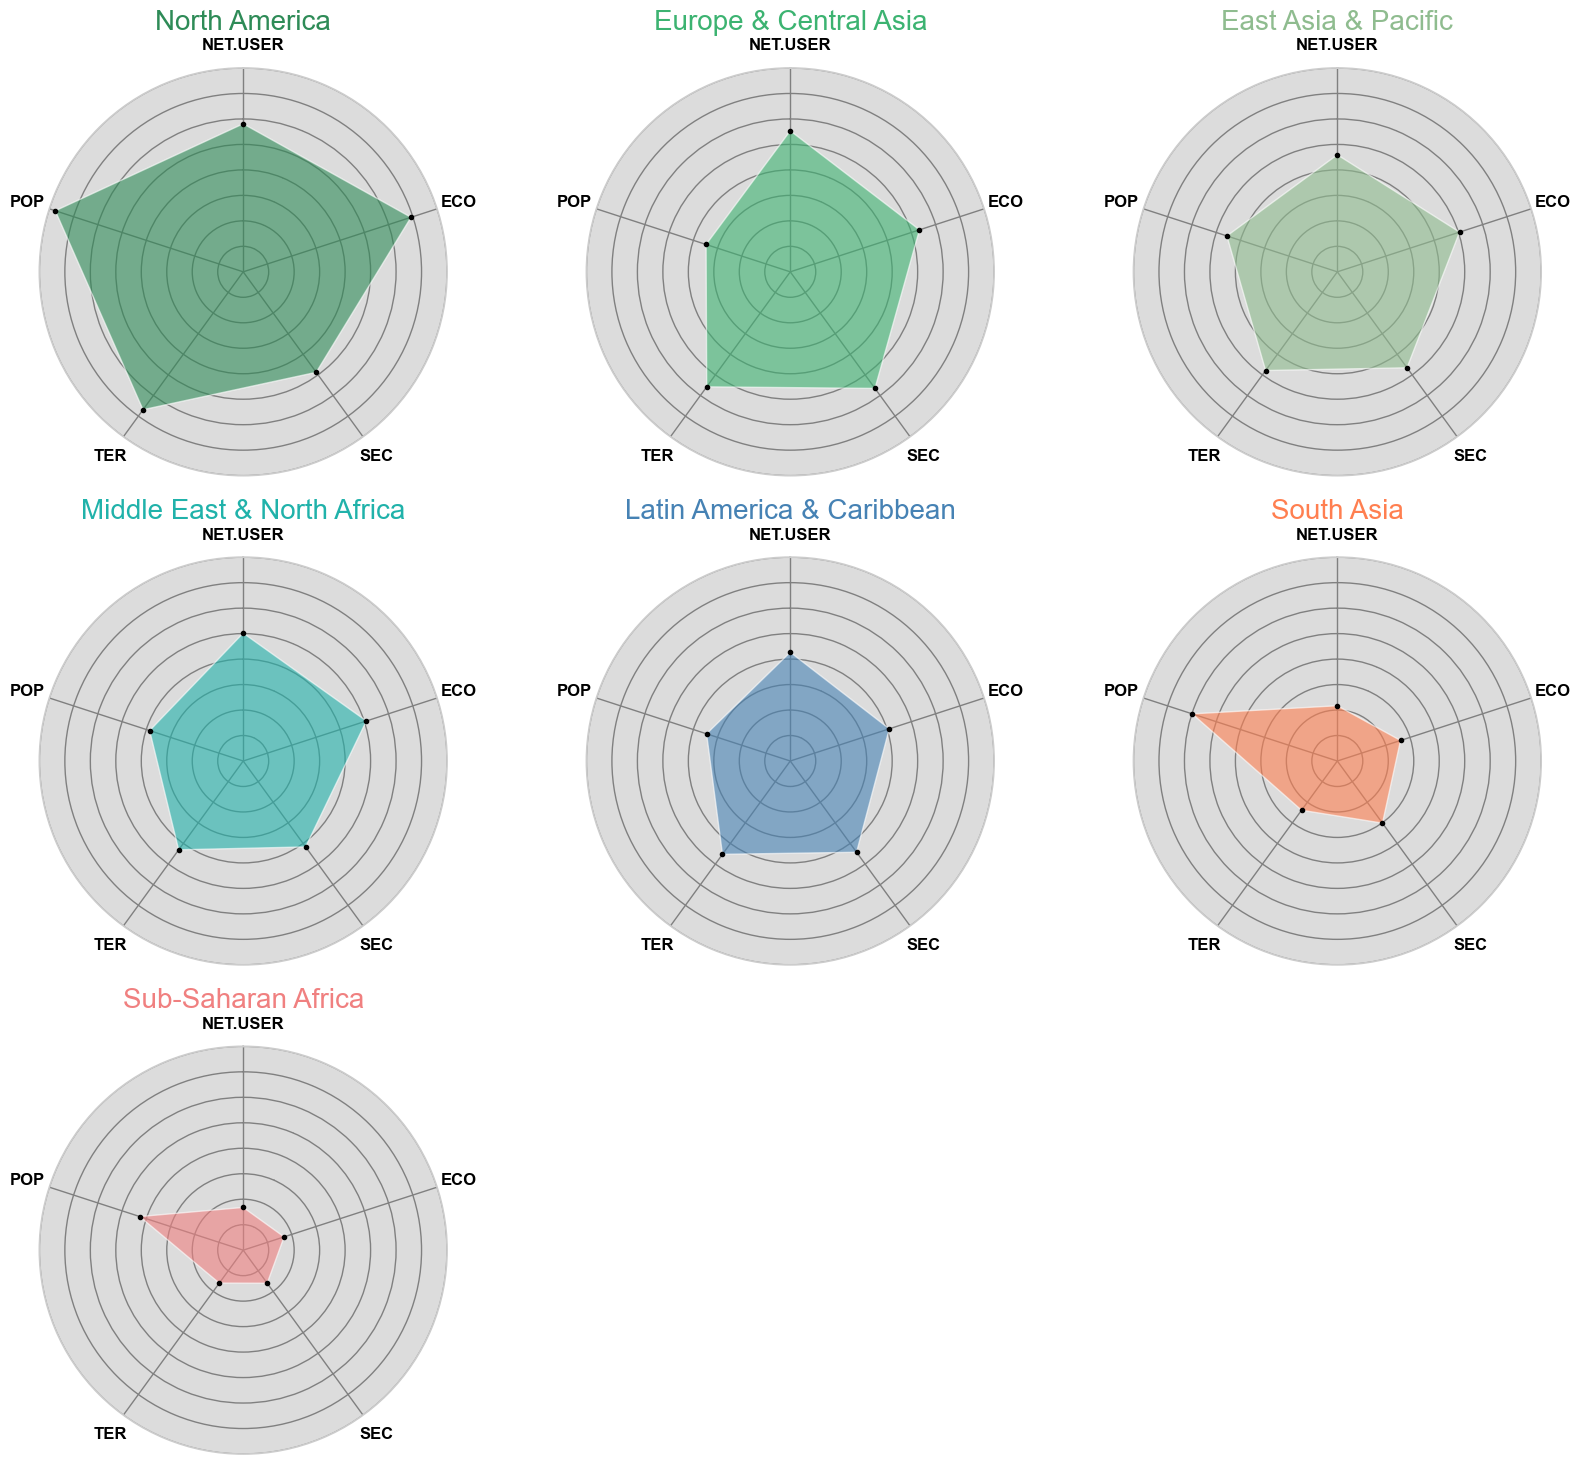

In [208]:
plt.rc('axes', facecolor = 'Gainsboro')

# Nombre de variables
categories=list(df_spider.columns)

# Nombre de catégorie = nombre de colonne = 5
N = len(categories)
 
# Pour angle on divise le plot par le nombre de variable-> 1/4 cercle -> *2 -> demi cercle * pi cercle entier
angles = [n / N*2*pi for n in range(N)]

# On fixe la taille de la figure
fig = plt.figure(1, figsize=(20,18))

# On choisit les colonnes
# colors = ['cadetblue', 'lightseagreen', 'darkseagreen', 'indianred', 'steelblue', 'RoyalBlue','lightcoral']
colors = ['seagreen','mediumseagreen','darkseagreen', 'lightseagreen', 'steelblue', 'coral','lightcoral']
# Boucle pour chacune des régions contenues dans l'index
for i, region in enumerate(df_spider.index) : 
    # On crée un sous plot
    ax = fig.add_subplot(3,3,i+1, polar=True)
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles, categories, color='black', size=8)
    # On supprime la visibilité des graduations circulaires
    plt.yticks(color="gray", size=0.1)
    
    # On definit values = contenue
    values=df_spider.iloc[i].values
    
    # On dessine angle, values, motif, taille du trait, style du trait
    ax.plot(angles, values, '.',color='black', linewidth=0, linestyle='solid')
    # On definit la visualisation de l'aire dessiné
    ax.fill(angles, values, colors[i], alpha=0.6)
    
    # On aggrandit les labels 
    ax.set_xticklabels(categories, fontsize=12)
    # Titer des graphiques et couleurs
    ax.set_title(region, size=20, color=colors[i])
    # grille
    plt.grid(True,color="grey")
    # On definit l'étendu de y entre -2 et 2 pour une bonne visualisation
    plt.ylim(-2,2)
plt.savefig("assets/graphiques/PREPROCESSING_5_Ordre de grandeurs_Regions.jpg", bbox_inches='tight')

Les pays sélectionnées sont dans les régions qui ont les aires les plus larges ==> confirme les choix

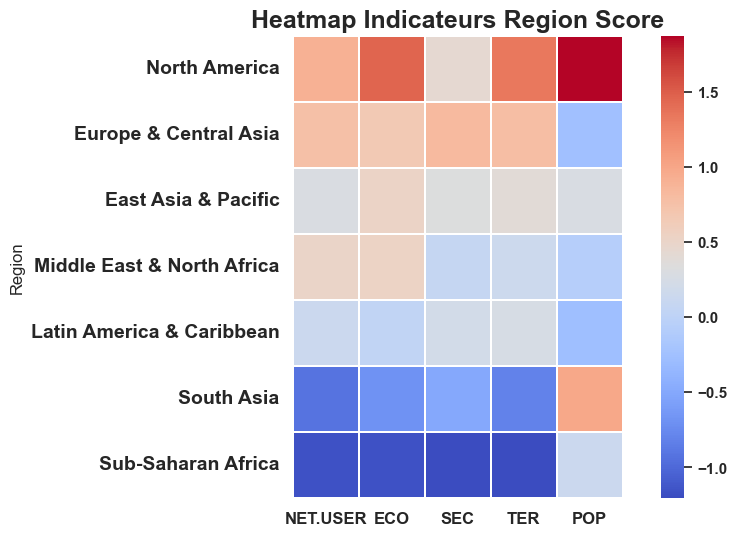

In [209]:
fig = plt.figure(1, figsize=(10,6))
res = sns.heatmap(df_spider, square=True, linewidths=0.1, cmap='coolwarm')
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
plt.title("Heatmap Indicateurs Region Score",fontsize=18,fontweight='bold')
# plt.savefig("assets/graphiques/PREPROCESSING_6_Heatmap_indicateurs_region.jpg")
plt.show()

In [210]:
df_score_income_sc.columns

Index(['IT.NET.USER.P2_x', 'NY.GNP.PCAP.PP.CD_x', 'SE.SEC.ENRR_x',
       'SE.TER.ENRR_x', 'SP.POP.1524.TO.UN_x', 'Pays', 'Score', 'Region',
       'Income Group'],
      dtype='object')

In [211]:
df_score_income_sc=df_score_income_sc.groupby('Income Group').mean()

In [212]:
# On renomme les colonnes
df_score_income_sc = df_score_income_sc.rename(columns={'IT.NET.USER.P2_x':'NET.USER',
                                                        'NY.GNP.PCAP.PP.CD_x':'ECO',
                                                        'SE.SEC.ENRR_x':'SEC',
                                                        'SE.TER.ENRR_x':'TER',
                                                        'SP.POP.1524.TO.UN_x':'POP'})


In [213]:
df_score_income_sc.head()

NET.USER       ECO       SEC       TER       POP  \
Income Group                                                             
High income: OECD     1.129015  1.117205  1.082073  1.064266 -0.095706   
High income: nonOECD  0.960337  1.146841  0.568577  0.610445 -0.950219   
Low income           -1.420378 -1.423266 -1.336054 -1.302546  0.373721   
Lower middle income  -0.498394 -0.538922 -0.387760 -0.471286  0.124844   
Upper middle income   0.227833  0.199142  0.262248  0.320579  0.080742   

                          Score  
Income Group                     
High income: OECD     10.698667  
High income: nonOECD   4.050667  
Low income           -12.287407  
Lower middle income   -4.221429  
Upper middle income    2.962727

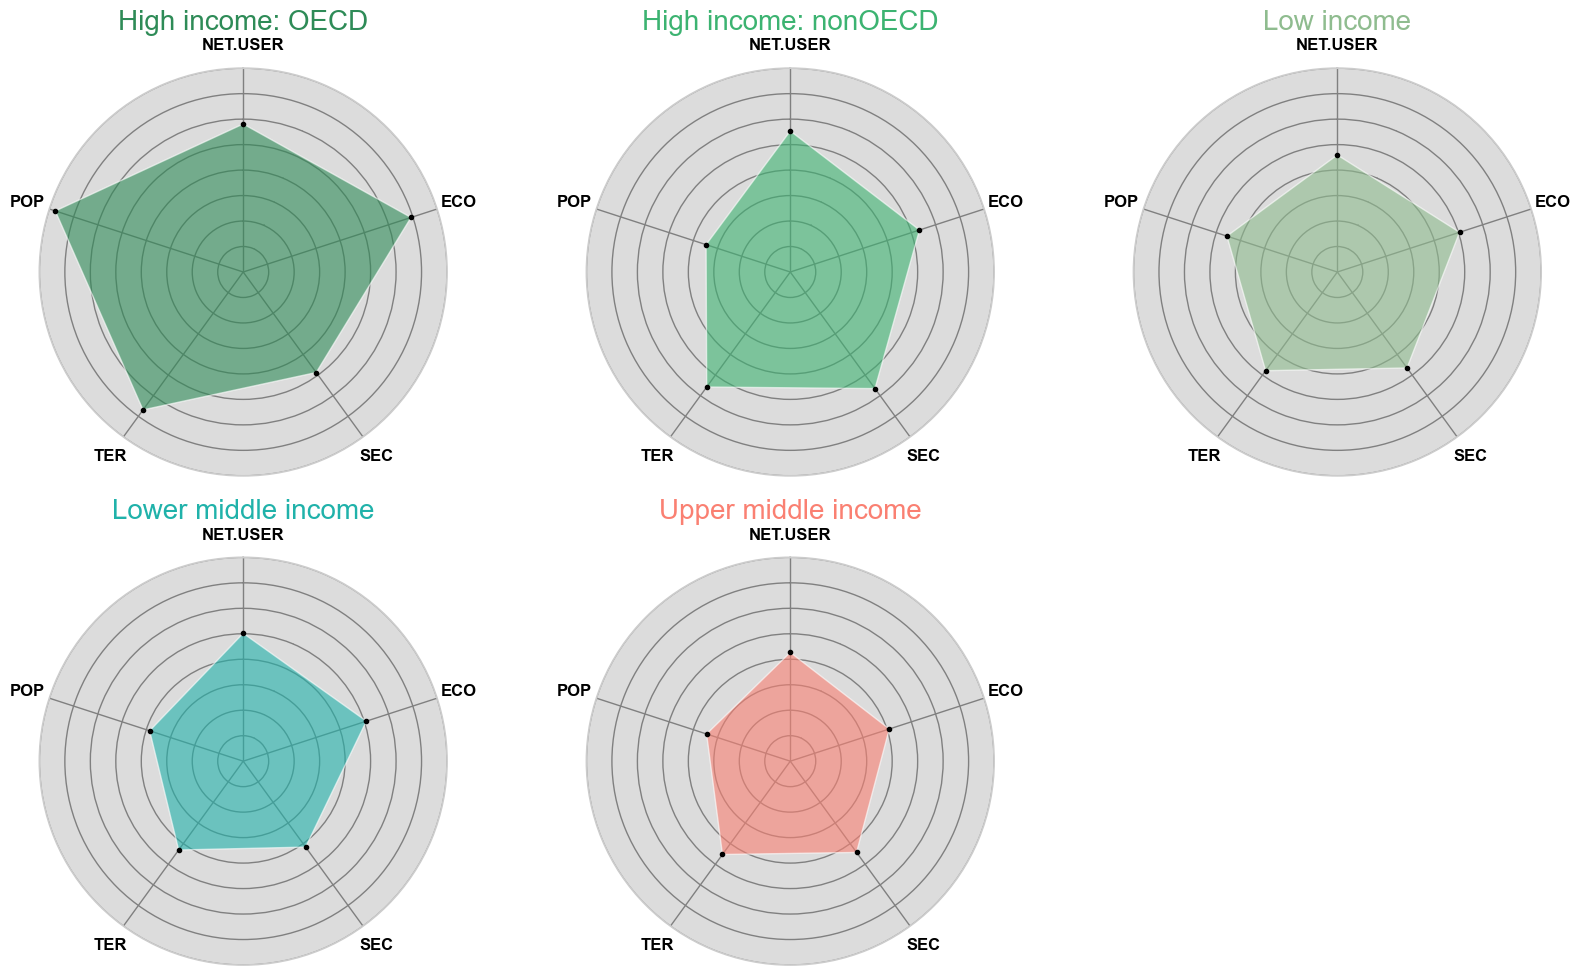

In [214]:
df_spider2 = df_score_income_sc[['NET.USER','ECO','SEC','TER','POP']]
plt.rc('axes', facecolor = 'Gainsboro')

# Nombre de variables
categories=list(df_spider2.columns)

# Nombre de catégorie = nombre de colonne = 5
N = len(categories)
 
# Pour angle on divise le plot par le nombre de variable-> 1/4 cercle -> *2 -> demi cercle * pi cercle entier
angles = [n / N*2*pi for n in range(N)]

# On fixe la taille de la figure
fig = plt.figure(1, figsize=(20,18))

# On choisit les colonnes
# colors = ['sienna', 'LightGreen', 'steelblue', 'RoyalBlue','Peru']
colors = ['seagreen','mediumseagreen','darkseagreen', 'lightseagreen', 'salmon']

# Boucle pour chacune des régions contenues dans l'index
for i, region in enumerate(df_spider2.index) : 
    # On crée un sous plot
    ax = fig.add_subplot(3,3,i+1, polar=True)
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles, categories, color='black', size=8)
    # On supprime la visibilité des graduations circulaires
    plt.yticks(color="gray", size=0.1)
    
    # On definit values = contenue
    values=df_spider.iloc[i].values
    
    # On dessine angle, values, motif, taille du trait, style du trait
    ax.plot(angles, values, '.',color='black', linewidth=0, linestyle='solid')
    # On definit la visualisation de l'aire dessiné
    ax.fill(angles, values, colors[i], alpha=0.6)
    
    # On aggrandit les labels 
    ax.set_xticklabels(categories, fontsize=12)
    # Titer des graphiques et couleurs
    ax.set_title(region, size=20, color=colors[i])
    # grille
    plt.grid(True,color="grey")
    # On definit l'étendu de y entre -2 et 2 pour une bonne visualisation
    plt.ylim(-2,2)
plt.savefig("assets/graphiques/PREPROCESSING_7_Ordre de grandeurs_Income.jpg", bbox_inches='tight')

Les pays sélectionnés font parti des region income qui ont les surfaces les plus étendues

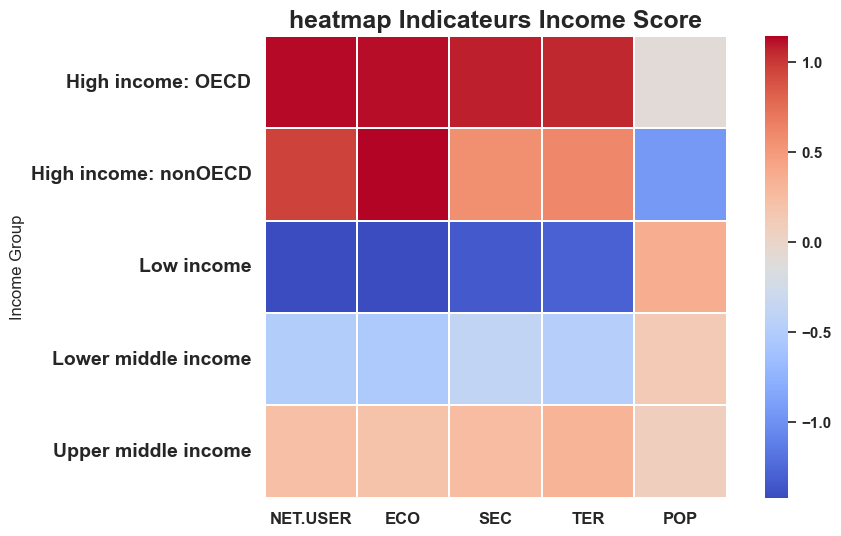

In [215]:
df_spider2 = df_score_income_sc[['NET.USER','ECO','SEC','TER','POP']]
fig = plt.figure(1, figsize=(10,6))
res = sns.heatmap(df_spider2, square=True, linewidths=0.1, cmap='coolwarm')
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
plt.title("heatmap Indicateurs Income Score",fontsize=18,fontweight='bold')
# plt.savefig("assets/graphiques/PREPROCESSING_8_Heatmap indicateur Income.jpg")
plt.show()

## MAP

In [216]:
# PANDAS
#Import des pays du monde de geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
# Préparation des données
# Map_1 : préparer les données côté geopandas
map_1 = world.sort_values(by=['iso_a3'])
map_1 = map_1.loc[:,['name','iso_a3']]
map_1 = map_1.rename(columns={'iso_a3':'iso3'})
map_1 = map_1.set_index('iso3')  
# Map 2 : préparer les données côté EdStatsCountry
map_2=country.sort_values(by = ['Country Code'])
map_2=map_2.loc[:,['Country Code','Short Name']]
map_2=map_2.rename(columns={'Country Code':'iso3'})
map_2=map_2.set_index('iso3')
# Fusion des 2 dataframes
map_f = pd.merge(map_1,map_2, on='iso3', how='left')
map_f.reset_index(inplace=True)

# Recherche des noms de pays différents entre geopandas et notre jeu de données
rows = map_f[map_f['name'] != map_f['Short Name']]
rows.drop([0,7,8,39,50,56,144,163], inplace=True)
# Modifier World
df_comp=rows[rows['Short Name'].notnull()].sort_values(by='iso3')
noms_a_changer=df_comp['Short Name'].tolist()
codes_iso=df_comp['iso3'].tolist()
# Récupération des index geopandas des noms de pays à changer
index_geo=world[world['iso_a3'].isin(codes_iso)].index
# Récupération des codes ISO 3 de geopandas
codes_isoa3=world.loc[index_geo,'iso_a3'].tolist()
# Parcours les codes iso3 pour avoir une liste de noms de pays dans l'ordre de world
noms_a_changer=[]
[noms_a_changer.append(df_comp[df_comp['iso3'] == iso]['Short Name'].tolist()[0]) for iso in codes_isoa3]
# On remplace les noms de world par ceux de notre dataframe
world.loc[world.index[index_geo.tolist()],'name']=noms_a_changer

df_score.Pays[df_score.Pays=='Korea, Rep.']="Korea"
df_score.Pays[df_score.Pays=='Russian Federation'] = 'Russia'
df_score_geo = world.merge(df_score, left_on = 'name', right_on = 'Pays')[['geometry','Pays','Score']]

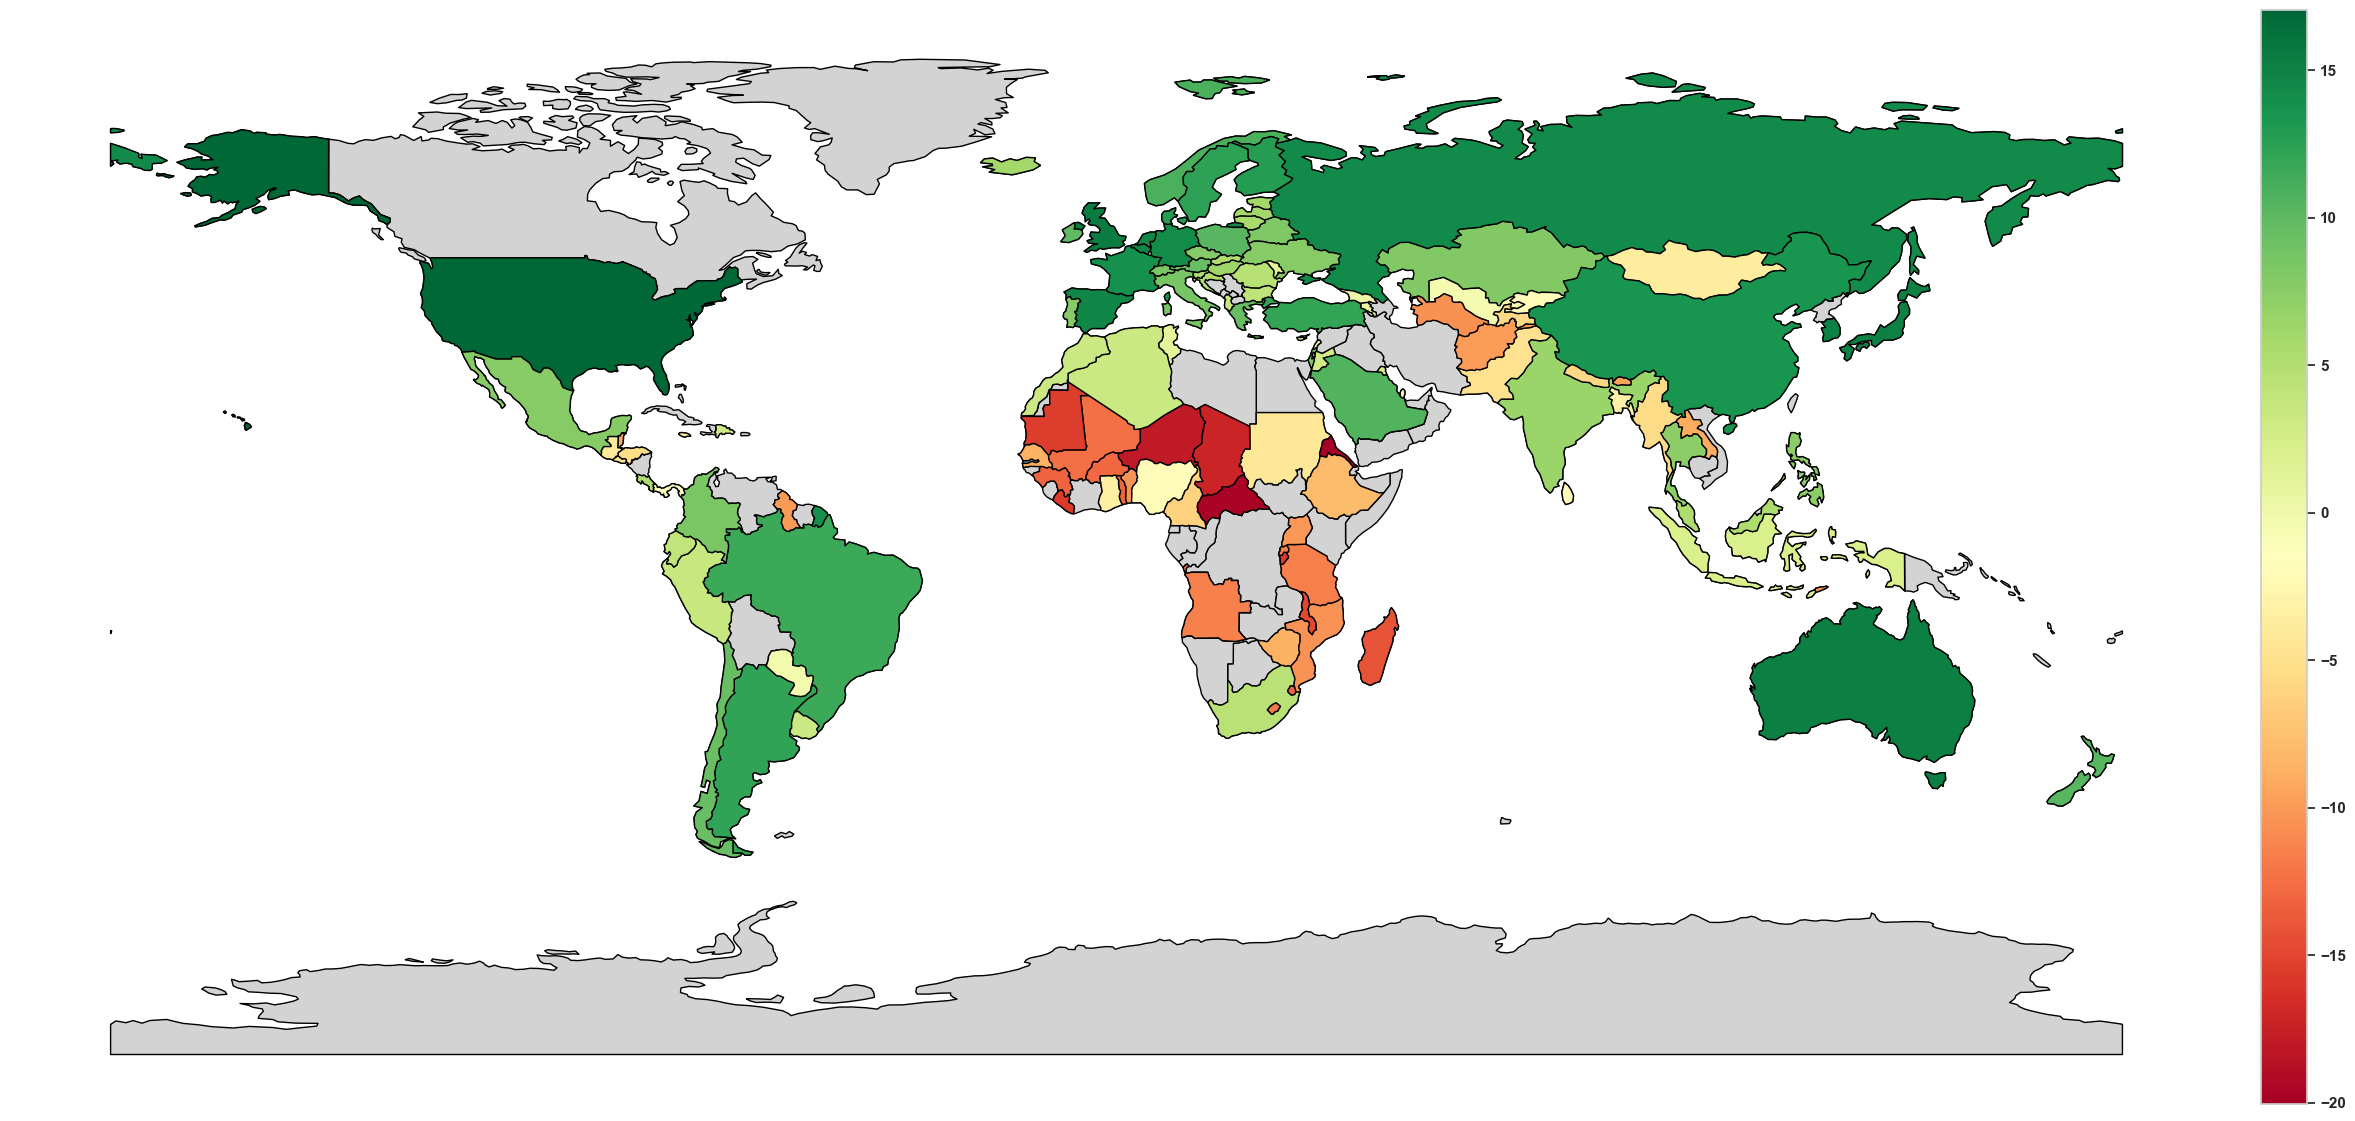

In [217]:
# import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
fig, ax = plt.subplots()
fig.set_size_inches(30,18)

# créer sous division des axes
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
# graph
world.plot(legend = True,ax=ax, cax=cax, color='lightgrey',linestyle='-',edgecolor='black')
df_score_geo.plot(column=df_score_geo['Score'], legend = True, ax=ax, cax=cax, cmap='RdYlGn',linestyle="-",edgecolor='black')
ax.set_axis_off()
# plt.savefig("assets/graphiques/_MAP_1_Pays_indicateurs.jpg")
plt.show()

## Evolution des indicateurs des pays du top 10

In [218]:
df_prediction = data.copy()

In [219]:
df_prediction = data[data['Country Name'].isin(liste_pays_retenus) & data['Indicator Code'].isin(indicateurs_retenus)]

df_prediction = df_prediction.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                                   value_vars = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
                                                 '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
                                                 '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
                                                 '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
                                                 '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                                                 '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
                                                 '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
                                                 '2095', '2100'], var_name = 'Year', value_name = 'Value')

df_prediction['Year'] = df_prediction['Year'].astype('int32')
df_prediction = df_prediction[df_prediction['Year'] > 2010]

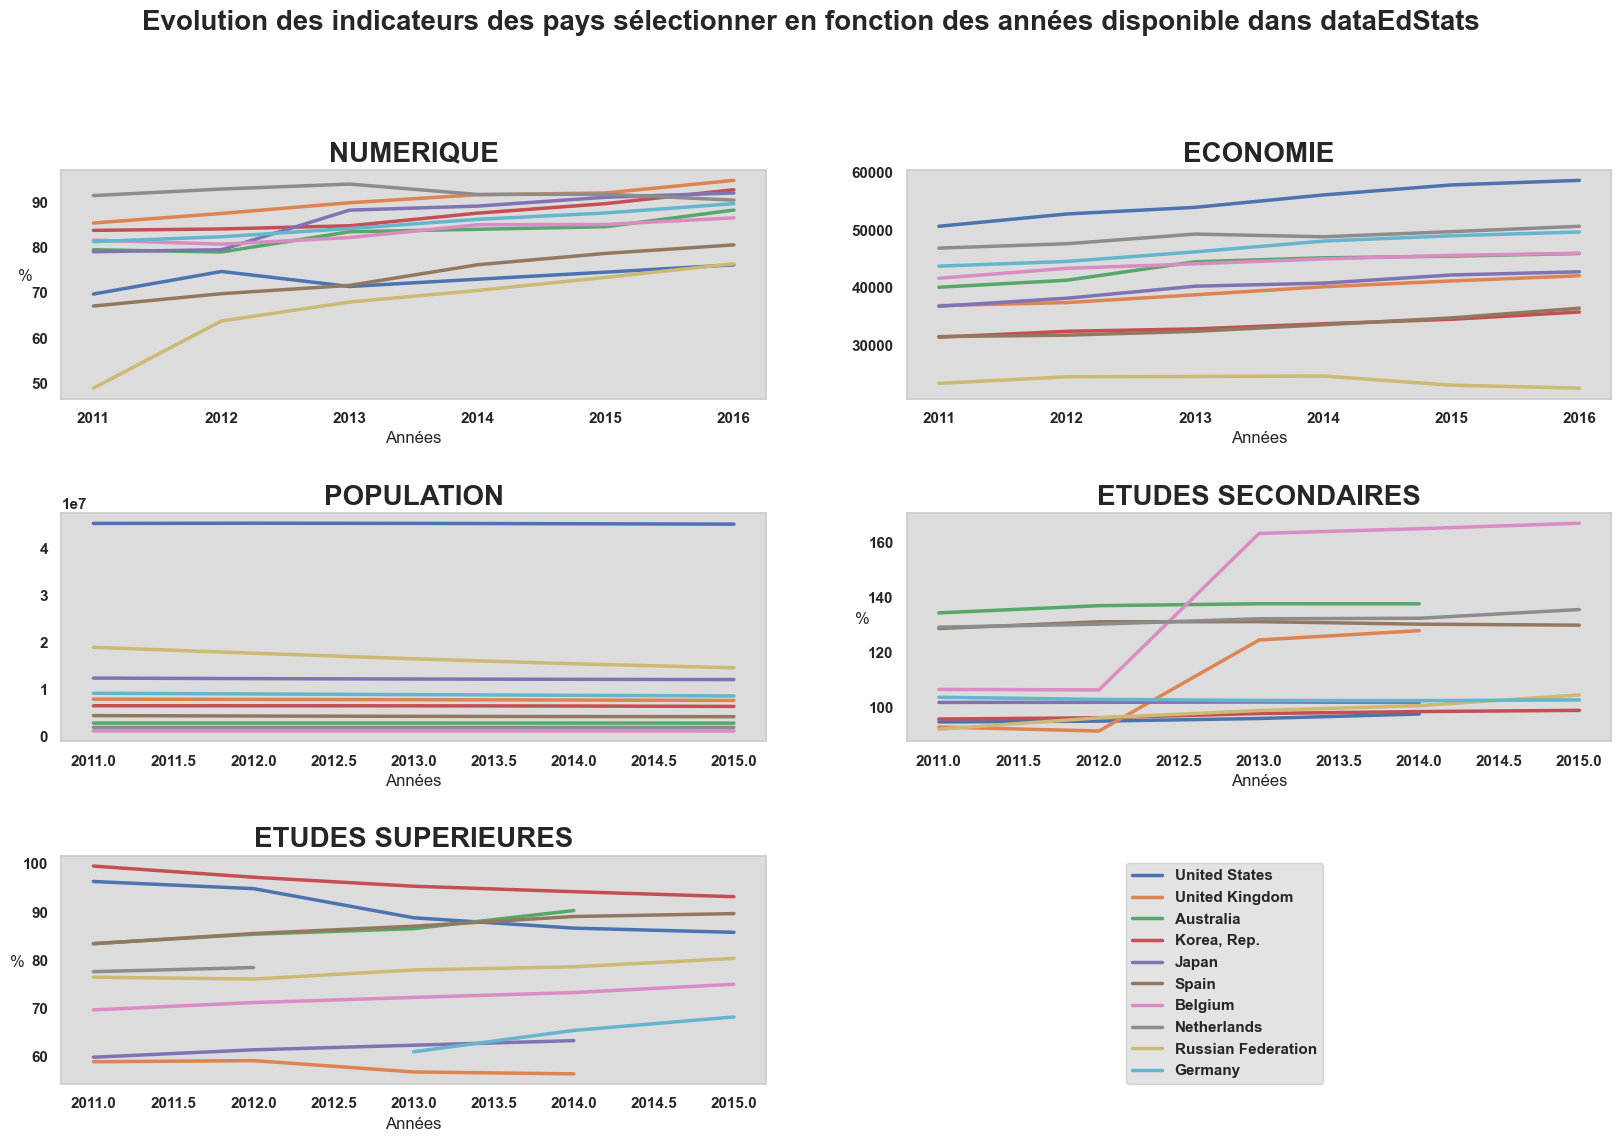

In [226]:
# Representation graphique

fig = plt.figure(figsize=(20,20))
fig.suptitle("Evolution des indicateurs des pays sélectionner en fonction des années disponible dans dataEdStats",fontweight='bold', fontsize=20)
plt.subplot(5,2,1) 
for i in liste_pays_retenus:
    sns.lineplot(
        x=df_prediction[df_prediction['Indicator Code'] == 'IT.NET.USER.P2'][df_prediction['Country Name'] == i ]['Year'],
        y=df_prediction[df_prediction['Indicator Code'] == 'IT.NET.USER.P2'][df_prediction['Country Name'] == i ]['Value'],
        label = i,
        linewidth=2.5,
        legend=False,
    )
    
#plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.title("NUMERIQUE", size=20,weight='bold')
plt.ylabel("%",rotation=0)
plt.xlabel("Années")
plt.grid(False)

plt.subplot(5,2,2)
for i in liste_pays_retenus:
    sns.lineplot(
        x=df_prediction[df_prediction['Indicator Code'] == 'NY.GNP.PCAP.PP.CD'][df_prediction['Country Name'] == i ]['Year'],
        y=df_prediction[df_prediction['Indicator Code'] == 'NY.GNP.PCAP.PP.CD'][df_prediction['Country Name'] == i ]['Value'],
        label = i,
        linewidth=2.5,
        legend=False
    )
#plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.title("ECONOMIE", size=20,weight='bold')
plt.ylabel("",rotation=0)
plt.xlabel("Années")
plt.grid(False)

plt.subplot(5,2,3) 
for i in liste_pays_retenus:
    sns.lineplot(
        x=df_prediction[df_prediction['Indicator Code'] == 'SP.POP.1524.TO.UN'][df_prediction['Country Name'] == i ]['Year'],
        y=df_prediction[df_prediction['Indicator Code'] == 'SP.POP.1524.TO.UN'][df_prediction['Country Name'] == i ]['Value'],
        label = i,
        linewidth=2.5,
        legend=False
    )
    
#plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.title("POPULATION", size=20,weight='bold')
plt.ylabel("",rotation=0)
plt.xlabel("Années")
plt.grid(False)

plt.subplot(5,2,4)
for i in liste_pays_retenus:
    sns.lineplot(
        x=df_prediction[df_prediction['Indicator Code'] == 'SE.SEC.ENRR'][df_prediction['Country Name'] == i ]['Year'],
        y=df_prediction[df_prediction['Indicator Code'] == 'SE.SEC.ENRR'][df_prediction['Country Name'] == i ]['Value'],
        label = i,
        linewidth=2.5,
        legend=False
    )
    
# plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.title("ETUDES SECONDAIRES", size=20,weight='bold')
plt.ylabel("%",rotation=0)
plt.xlabel("Années")
plt.grid(False)

plt.subplot(5,2,5) 
for i in liste_pays_retenus:
    sns.lineplot(
        x=df_prediction[df_prediction['Indicator Code'] == 'SE.TER.ENRR'][df_prediction['Country Name'] == i ]['Year'],
        y=df_prediction[df_prediction['Indicator Code'] == 'SE.TER.ENRR'][df_prediction['Country Name'] == i ]['Value'],
        label = i,
        linewidth=2.5
    )
plt.legend(bbox_to_anchor=(1.5, 1), loc = 2)
plt.title("ETUDES SUPERIEURES", size=20,weight='bold')
plt.ylabel("%",rotation=0)
plt.xlabel("Années")
plt.grid(False)	


plt.subplots_adjust(left=0.125, 
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.5)
plt.savefig("assets/graphiques/PREDICTION_1_Synthese.jpg", bbox_inches='tight')
plt.show()

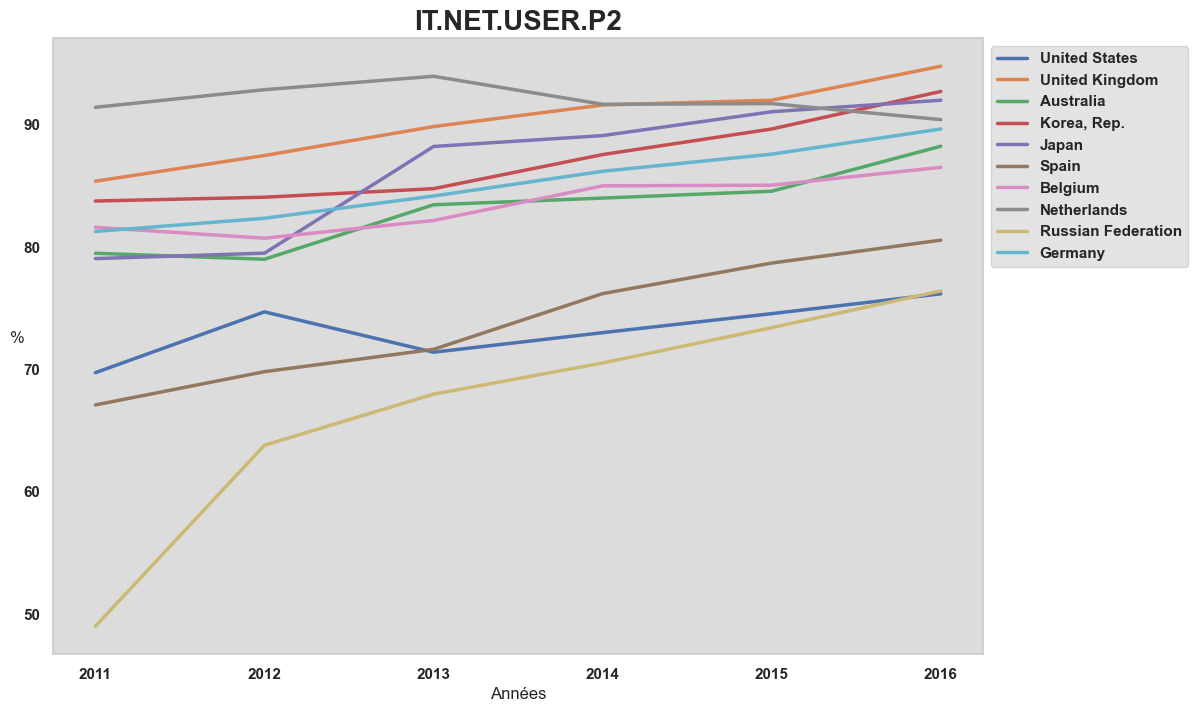

In [221]:
plt.figure(figsize=(12,8))
for i in liste_pays_retenus:
    sns.lineplot(
        x=df_prediction[df_prediction['Indicator Code'] == 'IT.NET.USER.P2'][df_prediction['Country Name'] == i ]['Year'],
        y=df_prediction[df_prediction['Indicator Code'] == 'IT.NET.USER.P2'][df_prediction['Country Name'] == i ]['Value'],
        label = i,
        linewidth=2.5,
        legend=False,
    )

plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.title("IT.NET.USER.P2", size=20,weight='bold')
plt.ylabel("%",rotation=0)
plt.xlabel("Années")
plt.grid(False)
plt.savefig("assets/graphiques/PREDICTION_2_IT.NET.USER.P2.jpg", bbox_inches='tight')
plt.show()


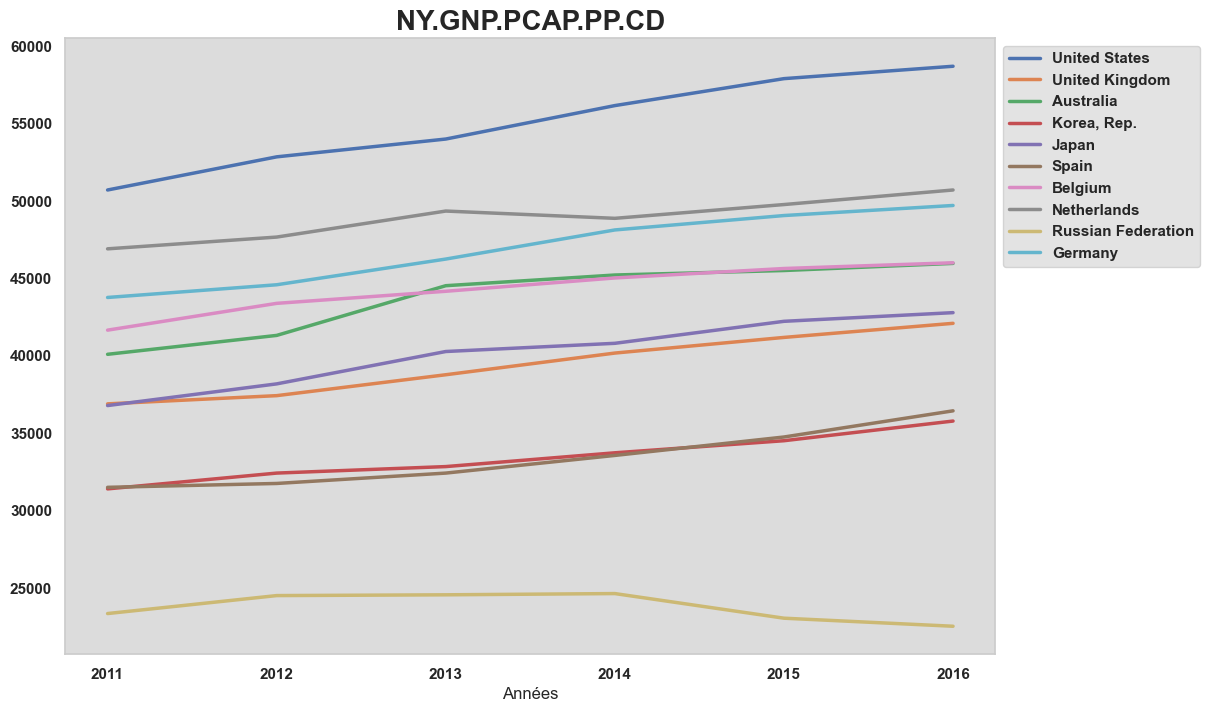

In [222]:
plt.figure(figsize=(12,8))
for i in liste_pays_retenus:
    sns.lineplot(
        x=df_prediction[df_prediction['Indicator Code'] == 'NY.GNP.PCAP.PP.CD'][df_prediction['Country Name'] == i ]['Year'],
        y=df_prediction[df_prediction['Indicator Code'] == 'NY.GNP.PCAP.PP.CD'][df_prediction['Country Name'] == i ]['Value'],
        label = i,
        linewidth=2.5,
        legend=False
    )
plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.title("NY.GNP.PCAP.PP.CD", size=20,weight='bold')
plt.ylabel("",rotation=0)
plt.xlabel("Années")
plt.grid(False)
plt.savefig("assets/graphiques/PREDICTION_3_IT.NET.USER.P2.jpg", bbox_inches='tight')
plt.show()

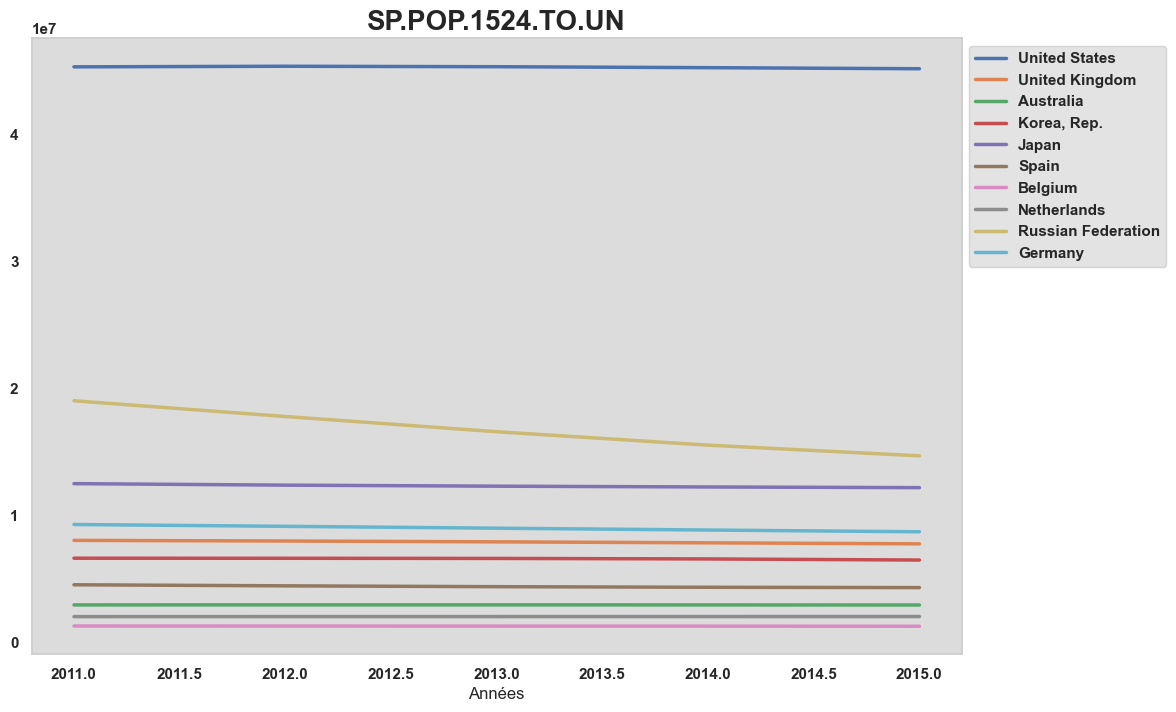

In [223]:
plt.figure(figsize=(12,8))
for i in liste_pays_retenus:
    sns.lineplot(
        x=df_prediction[df_prediction['Indicator Code'] == 'SP.POP.1524.TO.UN'][df_prediction['Country Name'] == i ]['Year'],
        y=df_prediction[df_prediction['Indicator Code'] == 'SP.POP.1524.TO.UN'][df_prediction['Country Name'] == i ]['Value'],
        label = i,
        linewidth=2.5,
        legend=False
    )
plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.title('SP.POP.1524.TO.UN', size=20,weight='bold')
plt.ylabel("",rotation=0)
plt.xlabel("Années")
plt.grid(False)
plt.savefig("assets/graphiques/PREDICTION_4_SP.POP.1524.TO.UN.jpg", bbox_inches='tight')
plt.show()

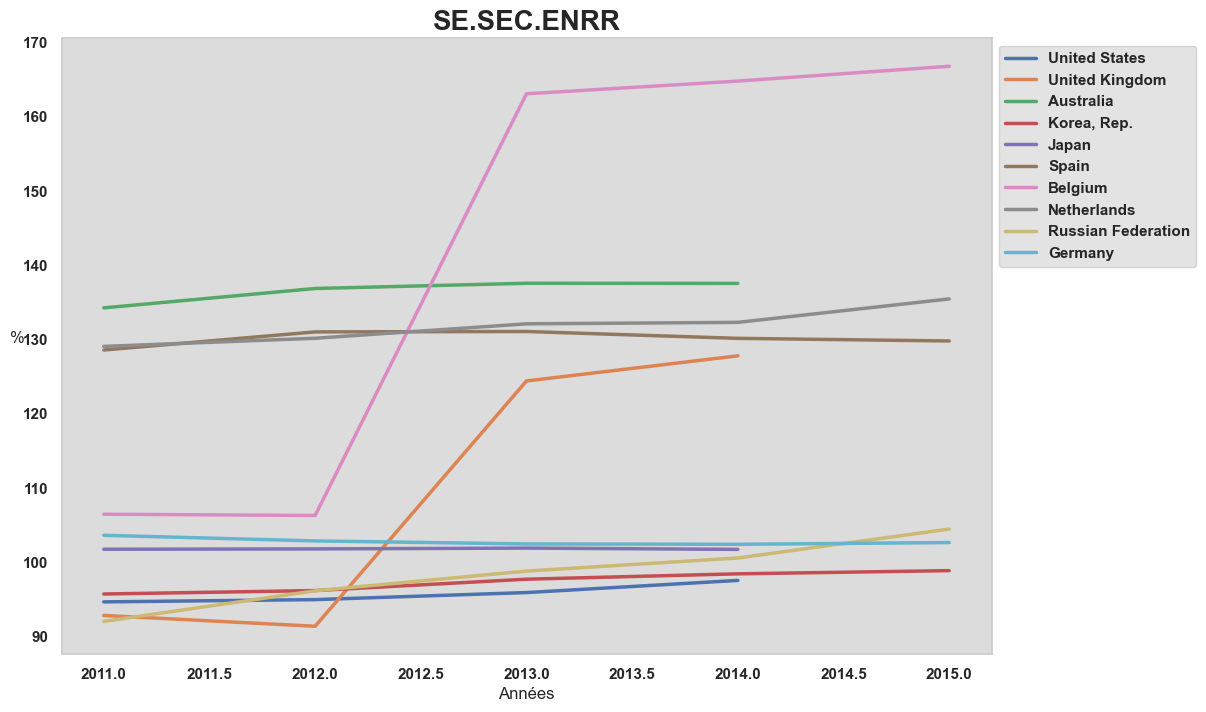

In [224]:
plt.figure(figsize=(12,8))
for i in liste_pays_retenus:
    sns.lineplot(
        x=df_prediction[df_prediction['Indicator Code'] == 'SE.SEC.ENRR'][df_prediction['Country Name'] == i ]['Year'],
        y=df_prediction[df_prediction['Indicator Code'] == 'SE.SEC.ENRR'][df_prediction['Country Name'] == i ]['Value'],
        label = i,
        linewidth=2.5,
        legend=False
    )
    
plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.title("SE.SEC.ENRR", size=20,weight='bold')
plt.ylabel("%",rotation=0)
plt.xlabel("Années")
plt.grid(False)
plt.savefig("assets/graphiques/PREDICTION_5_SE.SEC.ENRR.jpg", bbox_inches='tight')
plt.show()

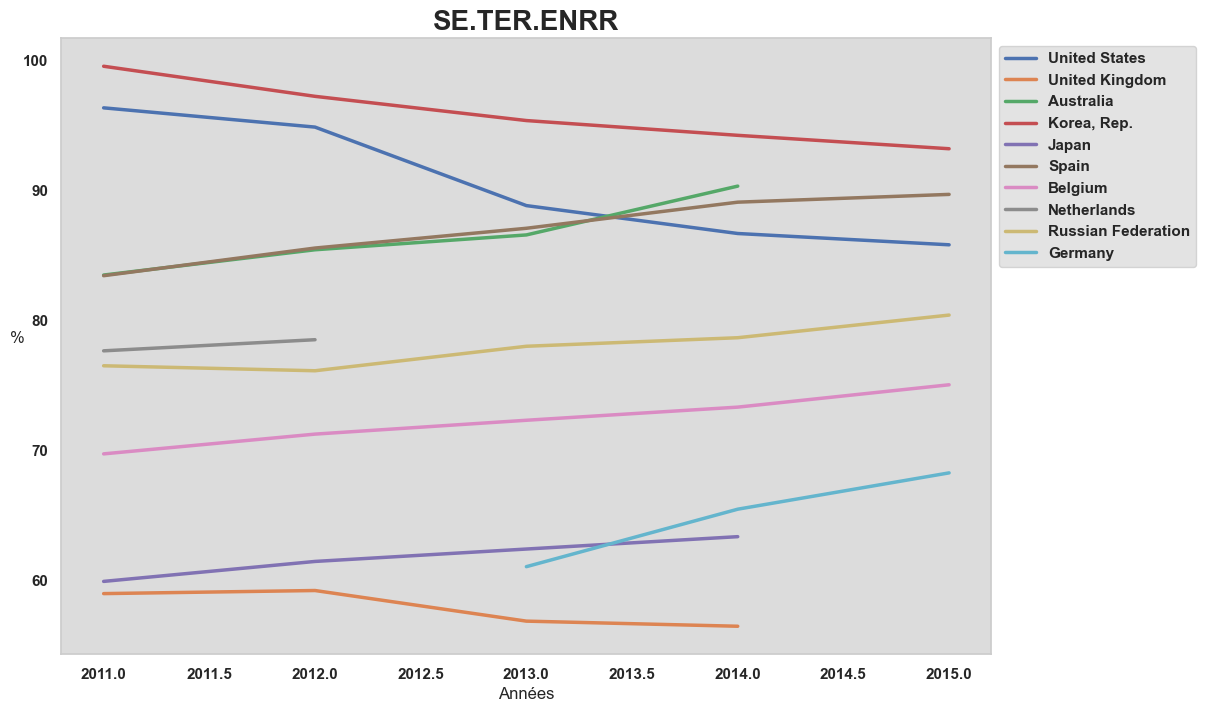

In [225]:
plt.figure(figsize=(12,8))
for i in liste_pays_retenus:
    sns.lineplot(
        x=df_prediction[df_prediction['Indicator Code'] == 'SE.TER.ENRR'][df_prediction['Country Name'] == i ]['Year'],
        y=df_prediction[df_prediction['Indicator Code'] == 'SE.TER.ENRR'][df_prediction['Country Name'] == i ]['Value'],
        label = i,
        linewidth=2.5
    )
plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.title("SE.TER.ENRR", size=20,weight='bold')
plt.ylabel("%",rotation=0)
plt.xlabel("Années")
plt.grid(False)
plt.savefig("assets/graphiques/PREDICTION_6_SE.TER.ENRR.jpg", bbox_inches='tight')
plt.show()